<a href="https://colab.research.google.com/github/visualnnz/2025-1_ComputerVision/blob/main/CV_HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 공통

In [ ]:
# PyTorch 설치 여부 확인
!pip install torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

# [실험 A] 손실 함수 비교: CrossEntropy Loss vs MSE Loss (with softmax)

In [ ]:
# PyTorch 버전의 DeepMLP에서의 MNIST 분류 코드
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# GPU 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# 하이퍼 파라미터 for MNIST
input_size = 784     # 입력 크기 (28×28 픽셀 이미지)
hidden_size1 = 1024  # 첫 번째 은닉층의 뉴런 수
hidden_size2 = 512   # 두 번째 은닉층의 뉴런 수
hidden_size3 = 512   # 세 번째 은닉층의 뉴런 수
num_classes = 10     # 출력 클래스 수 (숫자 0~9)
batch_size = 128     # 한 번에 처리하는 데이터의 개수
learning_rate = 0.003 # 학습률
num_epochs = 30      # 전체 데이터셋을 반복하는 횟수

# 실험 A-1. 손실 함수: CrossEntropy

In [ ]:
# MNIST 데이터셋 로딩 및 전처리
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

100%|██████████| 9.91M/9.91M [00:00<00:00, 12.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 341kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.18MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 12.7MB/s]


In [ ]:
# 신경망 모델 정의(MLP)
# 입력층(784) → 은닉층1(1024, ReLU) → 은닉층2(512, ReLU) → 은닉층3(512, ReLU) → 출력층(10) 구조의 MLP 모델
class DeepMLP(nn.Module):
    def __init__(self, input_size, hidden1, hidden2, hidden3, num_classes):
        super(DeepMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1)
        self.relu = nn.ReLU()  # 활성화 함수로 ReLU를 사용하여 비선형성을 추가.
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.fc3 = nn.Linear(hidden2, hidden3)
        self.fc4 = nn.Linear(hidden3, num_classes)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x) # PyTorch에서는 출력층에서 Softmax 함수를 직접 적용하지 않고,손실 함수로 CrossEntropyLoss 를 사용할 때 내부적으로 Softmax 연산을 포함해서 처리함.
        return x

# 모델 및 최적화 알고리즘 설정
# 모델을 GPU로 이동(.to(device))시켜 빠르게 학습할 수 있도록 함.
modelA_1 = DeepMLP(input_size, hidden_size1, hidden_size2, hidden_size3, num_classes).to(device)

# 손실함수 및 옵티마이저 설정
loss_function = nn.CrossEntropyLoss()  # 내부적으로 log(softmax()) 계산을 포함하고 있음.
optimizer = optim.Adam(modelA_1.parameters(), lr=learning_rate)

In [ ]:
# 시각화를 위해 필요한 accuracy, loss, gradient, activation 값들을 저장하기 위한 변수 정의
accuracy_history = []
loss_history = []
gradients = {
    'fc1': [],
    'fc2': [],
    'fc3': [],
    'fc4': []
}

activation_history = {}
activation_snapshot = {}

# hook 함수 정의
def get_activation(name):
    def hook(model, input, output):
        activation_history[name] = output.detach().cpu().view(-1).numpy()
    return hook

# hook 등록
modelA_1.fc1.register_forward_hook(get_activation('fc1'))
modelA_1.fc2.register_forward_hook(get_activation('fc2'))
modelA_1.fc3.register_forward_hook(get_activation('fc3'))
modelA_1.fc4.register_forward_hook(get_activation('fc4'))

In [ ]:
# 모델 학습
for epoch in range(num_epochs):
    modelA_1.train()
    total_loss = 0
    for images, labels in train_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # 순전파
        outputs = modelA_1(images)
        loss = loss_function(outputs, labels)

        # 역전파 및 최적화 : 역전파(backpropagation)를 통해 모델의 가중치를 업데이트
        optimizer.zero_grad()  # 이전 기울기 초기화
        loss.backward()        # 역전파를 통한 기울기 계산
        optimizer.step()       # 가중치 업데이트

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader) # 평균 손실을 계산하여 학습 상황을 확인함.

    # Epoch마다 각 Layer별 Gradient 추적
    with torch.no_grad():
        gradients['fc1'].append(modelA_1.fc1.weight.grad.norm().item())
        gradients['fc2'].append(modelA_1.fc2.weight.grad.norm().item())
        gradients['fc3'].append(modelA_1.fc3.weight.grad.norm().item())
        gradients['fc4'].append(modelA_1.fc4.weight.grad.norm().item())

    # 학습이 완료된 모델의 성능(정확도)을 평가
    # 검증 데이터셋에서 평가 : 매 epoch이 끝난 후 테스트 데이터를 통해 정확도를 측정
    modelA_1.eval()
    correct = 0 # correct: 정확히 맞춘 데이터 개수
    total = 0 # total: 전체 데이터 개수

    if epoch in [0, num_epochs // 2, num_epochs - 1]:
        epoch_label = f"epoch_{epoch+1}"
        activation_snapshot[epoch_label] = activation_history.copy()

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.reshape(-1, 28*28).to(device) # MNIST 데이터의 이미지 크기(28×28)를 1차원 형태로 펼쳐 모델 입력 형태에 맞춤.
            labels = labels.to(device)
            outputs = modelA_1(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total

    accuracy_history.append(accuracy)
    loss_history.append(avg_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Validation Accuracy: {accuracy:.2f}%')

# 최종 평가 : 최종 epoch이 끝난 후의 테스트 데이터 정확도를 출력함.
print(f'최종 테스트 정확률: {accuracy:.2f}%')

Epoch [1/30], Loss: 0.2335, Validation Accuracy: 95.68%
Epoch [2/30], Loss: 0.1023, Validation Accuracy: 96.91%
Epoch [3/30], Loss: 0.0769, Validation Accuracy: 95.97%
Epoch [4/30], Loss: 0.0646, Validation Accuracy: 97.55%
Epoch [5/30], Loss: 0.0516, Validation Accuracy: 97.58%
Epoch [6/30], Loss: 0.0432, Validation Accuracy: 97.88%
Epoch [7/30], Loss: 0.0369, Validation Accuracy: 97.34%
Epoch [8/30], Loss: 0.0345, Validation Accuracy: 97.86%
Epoch [9/30], Loss: 0.0306, Validation Accuracy: 98.02%
Epoch [10/30], Loss: 0.0316, Validation Accuracy: 98.01%
Epoch [11/30], Loss: 0.0269, Validation Accuracy: 98.07%
Epoch [12/30], Loss: 0.0207, Validation Accuracy: 98.16%
Epoch [13/30], Loss: 0.0295, Validation Accuracy: 97.58%
Epoch [14/30], Loss: 0.0249, Validation Accuracy: 98.07%
Epoch [15/30], Loss: 0.0197, Validation Accuracy: 97.85%
Epoch [16/30], Loss: 0.0202, Validation Accuracy: 97.77%
Epoch [17/30], Loss: 0.0213, Validation Accuracy: 98.14%
Epoch [18/30], Loss: 0.0171, Validation 

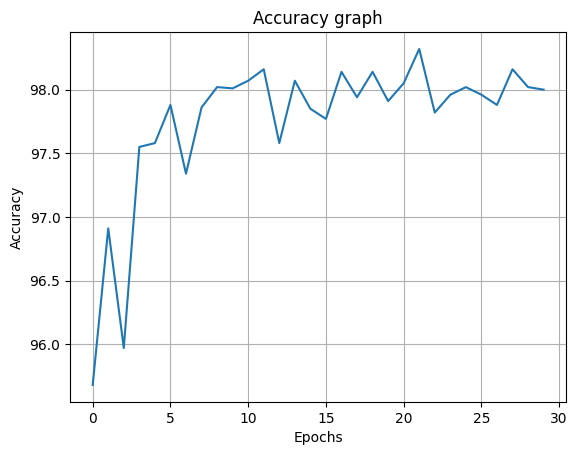

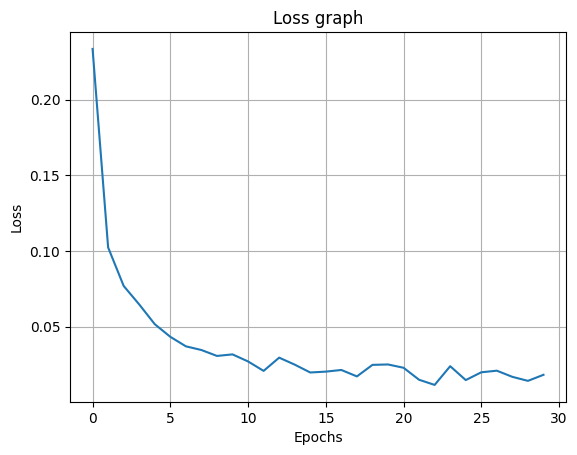

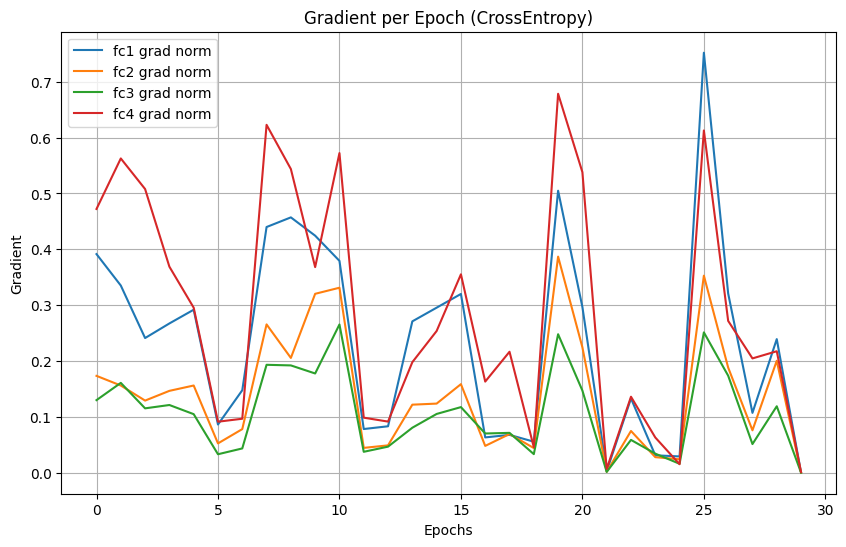

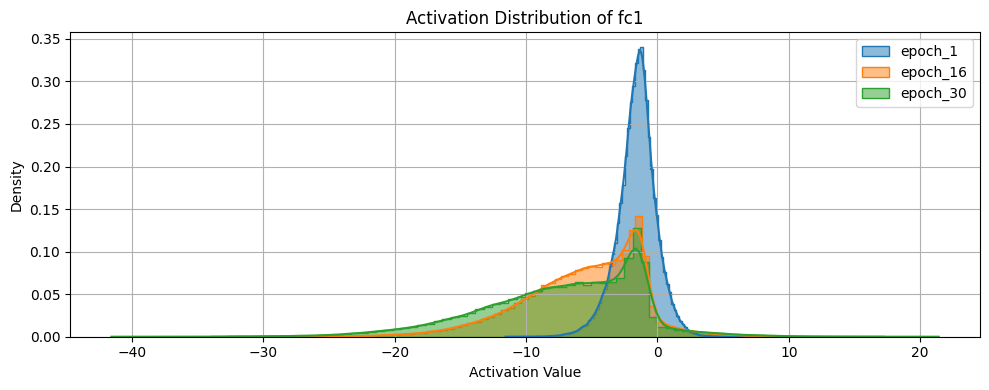

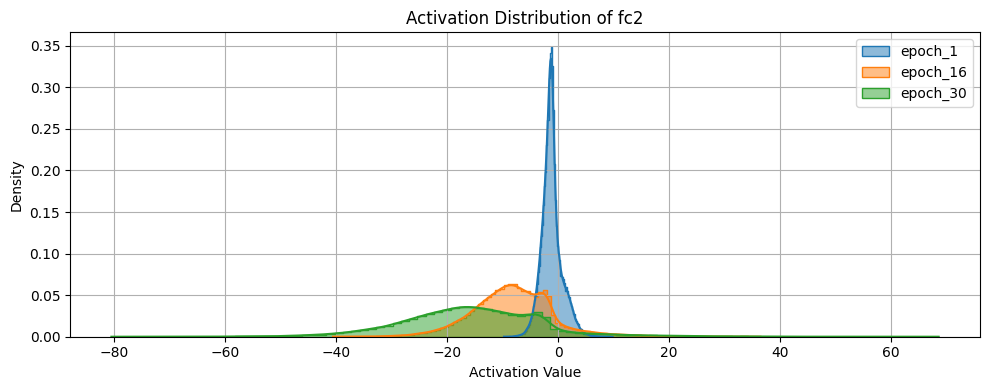

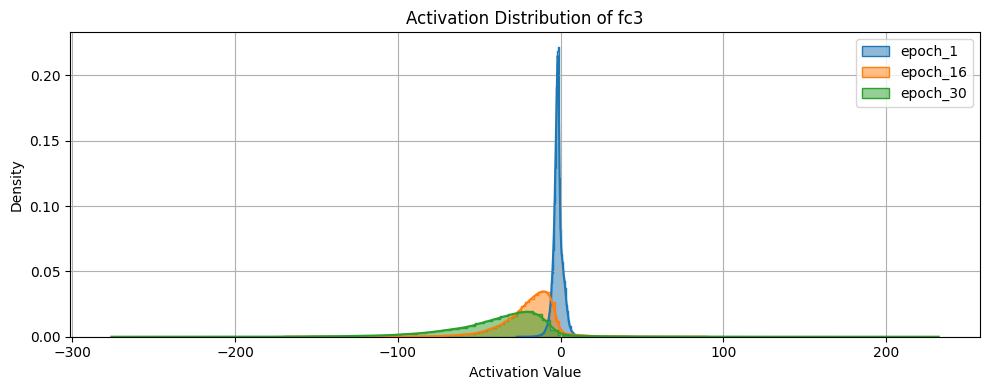

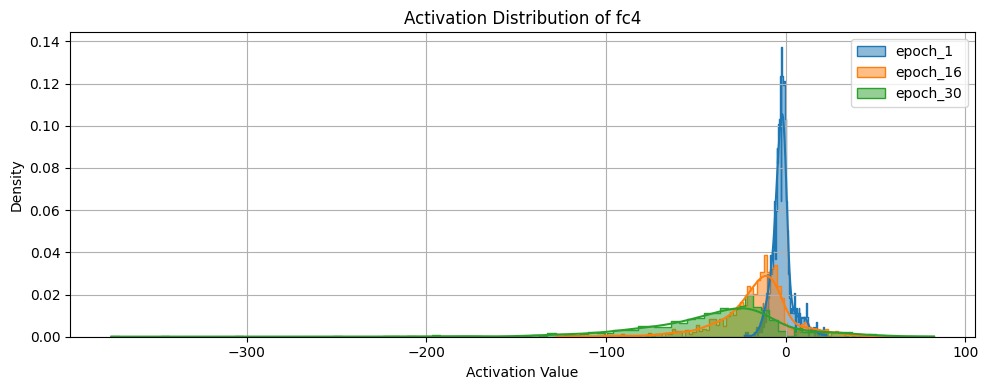

In [ ]:
# 실험 A-1 결과 시각화 (정확도, 손실)
# 학습 및 검증 데이터셋에서의 정확도와 손실 값이 Epoch마다 어떻게 변화하는지 시각화하여 보여줌
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(accuracy_history)
plt.title('Accuracy graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

plt.plot(loss_history)
plt.title('Loss graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(gradients['fc1'], label='fc1 grad norm')
plt.plot(gradients['fc2'], label='fc2 grad norm')
plt.plot(gradients['fc3'], label='fc3 grad norm')
plt.plot(gradients['fc4'], label='fc4 grad norm')
plt.title("Gradient per Epoch (CrossEntropy)")
plt.xlabel("Epochs")
plt.ylabel("Gradient")
plt.legend()
plt.grid()
plt.show()

def plot_activation_distributions(snapshot_dict, layers=['fc1', 'fc2', 'fc3', 'fc4']):
    for layer in layers:
        plt.figure(figsize=(10, 4))
        for epoch_label, layer_acts in snapshot_dict.items():
            sns.histplot(layer_acts[layer], bins=100, kde=True, stat='density', label=epoch_label, element="step")
        plt.title(f'Activation Distribution of {layer}')
        plt.xlabel('Activation Value')
        plt.ylabel('Density')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

plot_activation_distributions(activation_snapshot)

# 실험 A-2. 손실 함수: MSE Loss (with softmax)

In [ ]:
class A2(nn.Module):
    def __init__(self, input_size, hidden1, hidden2, hidden3, num_classes):
        super(A2, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1)
        self.relu = nn.ReLU()  # 활성화 함수로 ReLU를 사용하여 비선형성을 추가.
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.fc3 = nn.Linear(hidden2, hidden3)
        self.fc4 = nn.Linear(hidden3, num_classes)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        x = torch.softmax(x, dim=1) # softmax를 출력층에 명시적으로 적용
        return x

# 모델 및 최적화 알고리즘 설정
modelA_2 = A2(input_size, hidden_size1, hidden_size2, hidden_size3, num_classes).to(device)

# 위의 실험 A-1 조건에서 손실 함수만 MSE로 변경
loss_function = nn.MSELoss()
optimizer = optim.Adam(modelA_2.parameters(), lr=learning_rate)

In [ ]:
# 시각화를 위해 필요한 accuracy, loss, gradient, activation 값들을 저장하기 위한 변수 정의
accuracy_history = []
loss_history = []
gradients = {
    'fc1': [],
    'fc2': [],
    'fc3': [],
    'fc4': []
}

activation_history = {}
activation_snapshot = {}

# hook 함수 정의
def get_activation(name):
    def hook(model, input, output):
        activation_history[name] = output.detach().cpu().view(-1).numpy()
    return hook

# hook 등록
modelA_2.fc1.register_forward_hook(get_activation('fc1'))
modelA_2.fc2.register_forward_hook(get_activation('fc2'))
modelA_2.fc3.register_forward_hook(get_activation('fc3'))
modelA_2.fc4.register_forward_hook(get_activation('fc4'))

In [ ]:
# 모델 학습
for epoch in range(num_epochs):  # 매 epoch마다 훈련 데이터를 모델에 입력하고 손실을 계산
    modelA_2.train()
    total_loss = 0
    for images, labels in train_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        labels = torch.nn.functional.one_hot(labels, num_classes=10).float()

        # 순전파
        outputs = modelA_2(images)
        loss = loss_function(outputs, labels)

        # 역전파 및 최적화 : 역전파(backpropagation)를 통해 모델의 가중치를 업데이트
        optimizer.zero_grad()  # 이전 기울기 초기화
        loss.backward()        # 역전파를 통한 기울기 계산
        optimizer.step()       # 가중치 업데이트

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader) # 평균 손실을 계산하여 학습 상황을 확인함.

    # Epoch마다 각 Layer별 Gradient 추적
    with torch.no_grad():
        gradients['fc1'].append(modelA_2.fc1.weight.grad.norm().item())
        gradients['fc2'].append(modelA_2.fc2.weight.grad.norm().item())
        gradients['fc3'].append(modelA_2.fc3.weight.grad.norm().item())
        gradients['fc4'].append(modelA_2.fc4.weight.grad.norm().item())

    # 학습이 완료된 모델의 성능(정확도)을 평가
    # 검증 데이터셋에서 평가: 매 epoch이 끝난 후 테스트 데이터를 통해 정확도를 측정
    modelA_2.eval()
    correct = 0 # correct: 정확히 맞춘 데이터 개수
    total = 0 # total: 전체 데이터 개수

    if epoch in [0, num_epochs // 2, num_epochs - 1]:
        epoch_label = f"epoch_{epoch+1}"
        activation_snapshot[epoch_label] = activation_history.copy()

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.reshape(-1, 28*28).to(device) # MNIST 데이터의 이미지 크기(28×28)를 1차원 형태로 펼쳐 모델 입력 형태에 맞춤.
            labels = labels.to(device)
            outputs = modelA_2(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total

    accuracy_history.append(accuracy)
    loss_history.append(avg_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Validation Accuracy: {accuracy:.2f}%')

# 최종 평가 : 최종 epoch이 끝난 후의 테스트 데이터 정확도를 출력함.
print(f'최종 테스트 정확률: {accuracy:.2f}%')

Epoch [1/30], Loss: 0.0131, Validation Accuracy: 95.44%
Epoch [2/30], Loss: 0.0065, Validation Accuracy: 96.59%
Epoch [3/30], Loss: 0.0052, Validation Accuracy: 96.82%
Epoch [4/30], Loss: 0.0047, Validation Accuracy: 97.05%
Epoch [5/30], Loss: 0.0045, Validation Accuracy: 97.05%
Epoch [6/30], Loss: 0.0046, Validation Accuracy: 96.27%
Epoch [7/30], Loss: 0.0050, Validation Accuracy: 96.64%
Epoch [8/30], Loss: 0.0052, Validation Accuracy: 97.23%
Epoch [9/30], Loss: 0.0049, Validation Accuracy: 96.24%
Epoch [10/30], Loss: 0.0054, Validation Accuracy: 94.85%
Epoch [11/30], Loss: 0.0061, Validation Accuracy: 96.78%
Epoch [12/30], Loss: 0.0058, Validation Accuracy: 96.46%
Epoch [13/30], Loss: 0.0069, Validation Accuracy: 96.05%
Epoch [14/30], Loss: 0.0117, Validation Accuracy: 93.29%
Epoch [15/30], Loss: 0.0139, Validation Accuracy: 95.24%
Epoch [16/30], Loss: 0.0172, Validation Accuracy: 92.47%
Epoch [17/30], Loss: 0.0135, Validation Accuracy: 92.63%
Epoch [18/30], Loss: 0.0176, Validation 

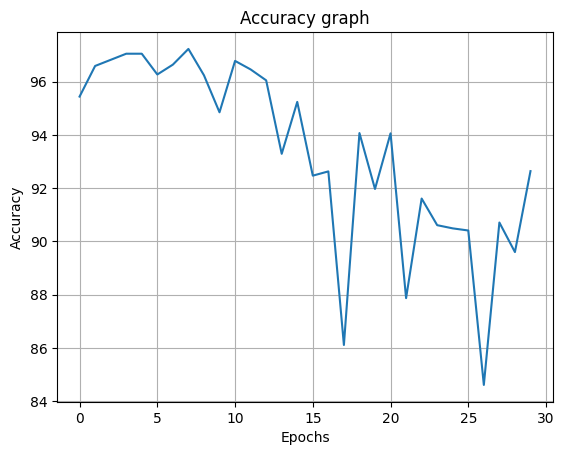

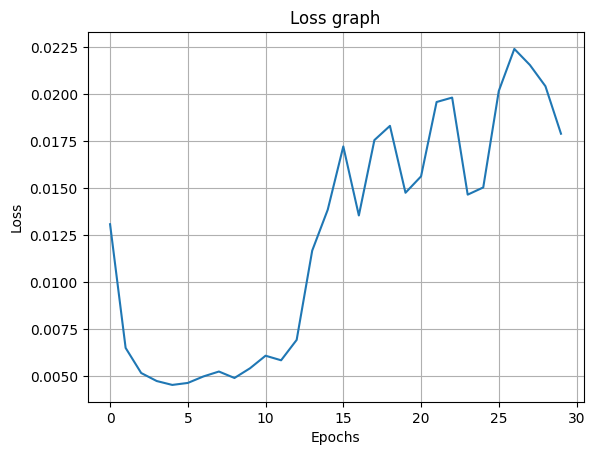

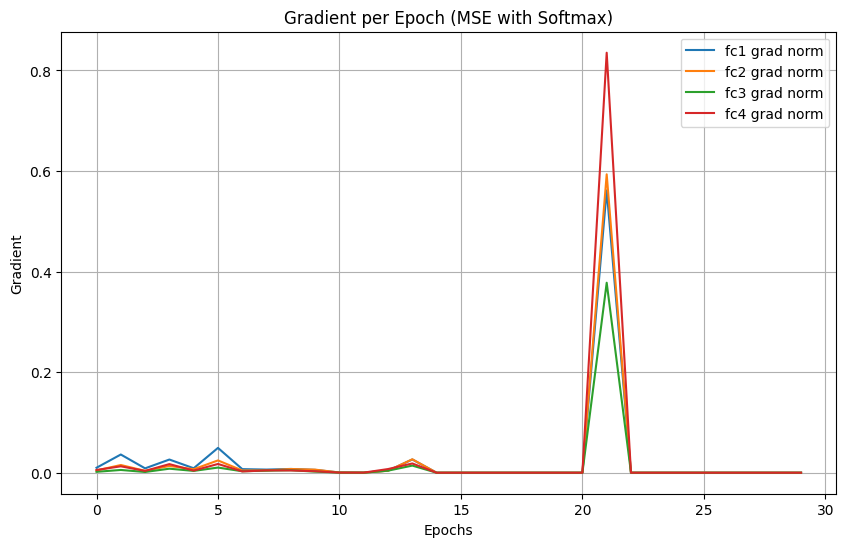

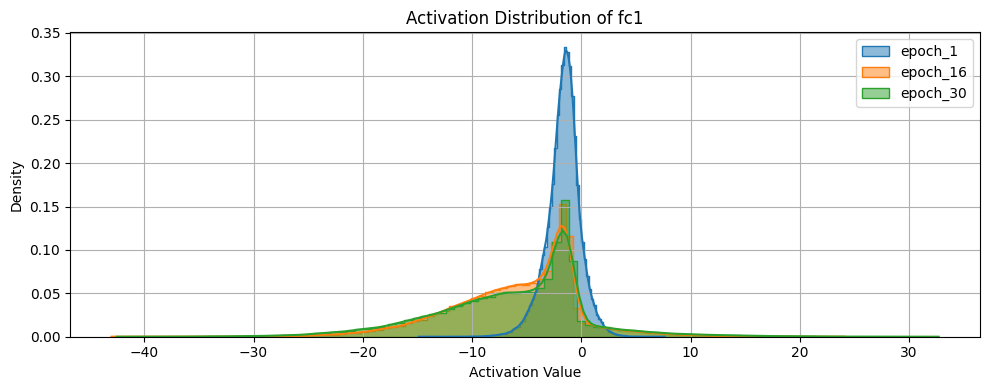

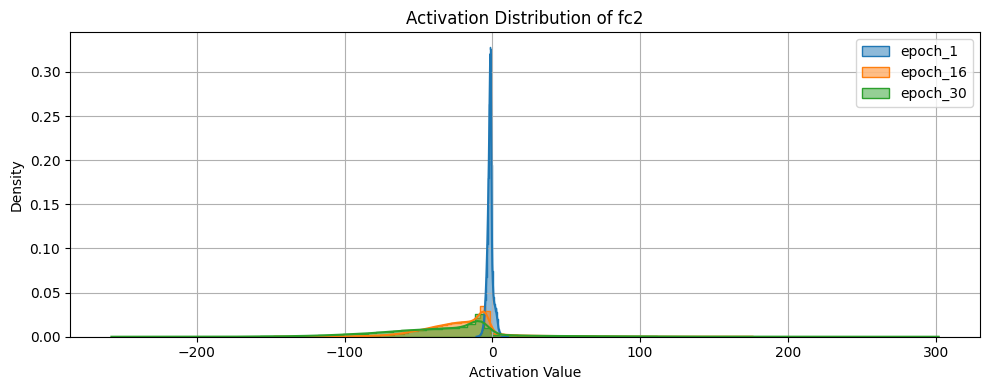

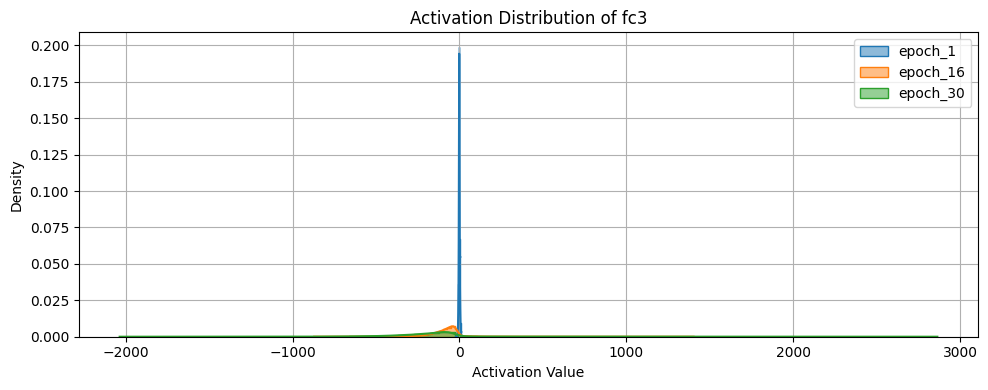

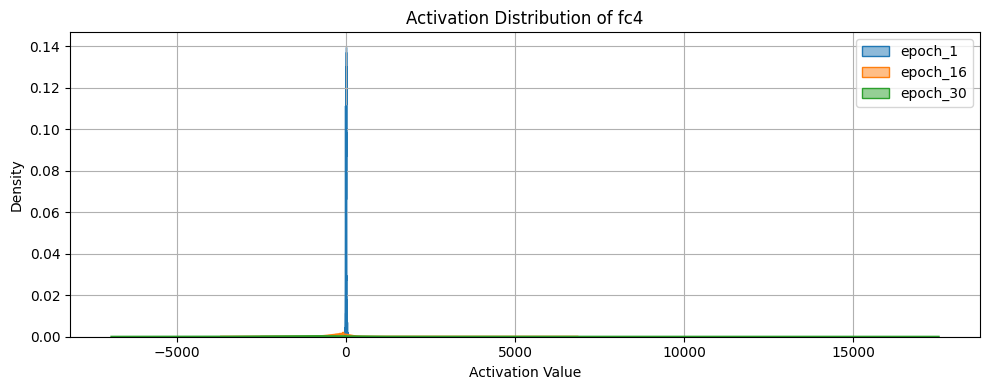

In [ ]:
# 실험 A-2 결과 시각화 (정확도, 손실)
# 학습 및 검증 데이터셋에서의 정확도와 손실 값이 Epoch마다 어떻게 변화하는지 시각화하여 보여줌
import matplotlib.pyplot as plt

plt.plot(accuracy_history)
plt.title('Accuracy graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

plt.plot(loss_history)
plt.title('Loss graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(gradients['fc1'], label='fc1 grad norm')
plt.plot(gradients['fc2'], label='fc2 grad norm')
plt.plot(gradients['fc3'], label='fc3 grad norm')
plt.plot(gradients['fc4'], label='fc4 grad norm')
plt.title("Gradient per Epoch (MSE with Softmax)")
plt.xlabel("Epochs")
plt.ylabel("Gradient")
plt.legend()
plt.grid()
plt.show()

def plot_activation_distributions(snapshot_dict, layers=['fc1', 'fc2', 'fc3', 'fc4']):
    for layer in layers:
        plt.figure(figsize=(10, 4))
        for epoch_label, layer_acts in snapshot_dict.items():
            sns.histplot(layer_acts[layer], bins=100, kde=True, stat='density', label=epoch_label, element="step")
        plt.title(f'Activation Distribution of {layer}')
        plt.xlabel('Activation Value')
        plt.ylabel('Density')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

plot_activation_distributions(activation_snapshot)

# [실험 B] 활성화 함수 비교:  ReLU vs LeakyReLU vs Sigmoid

In [2]:
# 하이퍼 파라미터 for make_moons
input_size = 2     # 입력 크기
hidden_size1 = 16  # 첫 번째 은닉층의 뉴런 수
hidden_size2 = 8   # 두 번째 은닉층의 뉴런 수
num_classes = 2     # 출력 클래스 수
batch_size = 32     # 한 번에 처리하는 데이터의 개수
learning_rate = 0.01 # 학습률
num_epochs = 300    # 전체 데이터셋을 반복하는 횟수

In [13]:
# make_moons 데이터셋 로딩 및 전처리
from sklearn.datasets import make_moons
from torch.utils.data import TensorDataset, DataLoader, random_split

train_X, train_Y = make_moons(n_samples=10000, noise=0.2, random_state=42)
train_X = torch.tensor(train_X, dtype=torch.float32)
train_Y = torch.tensor(train_Y, dtype=torch.long)

dataset = TensorDataset(train_X, train_Y)

# 학습/검증 데이터셋 분할
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# DataLoader 생성
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(val_dataset, batch_size=128)

# 실험 B-1. 활성화 함수: ReLU

In [41]:
# 실험 B-1 MLP 모델 정의
class B1(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(B1, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, num_classes)

        self.act1 = None
        self.act2 = None

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        self.act1 = x.detach()
        x = self.fc2(x)
        x = self.relu2(x)
        self.act2 = x.detach()
        x = self.fc3(x)
        return x

# 초기화 함수 정의
def init_weights_small_std(m):
    if isinstance(m, nn.Linear):
        nn.init.normal_(m.weight, mean=0.0, std=0.01)  # 가중치를 작은 정규분포로 초기화
        if m.bias is not None:
            nn.init.constant_(m.bias, 0.0)             # 바이어스는 0으로 초기화

In [42]:
# 모델 및 최적화 알고리즘 설정
# 모델을 GPU로 이동(.to(device))시켜 빠르게 학습할 수 있도록 함.
modelB_1 = B1(input_size, hidden_size1, hidden_size2, num_classes).to(device)
modelB_1.apply(init_weights_small_std)  # 초기화 적용

# 손실함수 및 옵티마이저 설정
loss_function = nn.CrossEntropyLoss()  # 내부적으로 log(softmax()) 계산을 포함하고 있음.
optimizer = optim.Adam(modelB_1.parameters(), lr=learning_rate)

In [43]:
# 시각화를 위해 필요한 accuracy, loss, gradient, activation 값들을 저장하기 위한 변수 정의
accuracy_history = []
loss_history = []
gradients = {
    'fc1': [],
    'fc2': [],
    'fc3': [],
}

activation_history = {}
activation_snapshot = {}

activation_ratio_history = {
    'layer1': [],
    'layer2': []
}

# Dead neuron 비율 추적용 변수
dead_neuron_ratio_history = {
    'layer1': [],
    'layer2': []
}

# hook 함수 정의
def get_activation(name):
    def hook(model, input, output):
        activation_history[name] = output.detach().cpu().view(-1).numpy()
    return hook

# hook 등록
modelB_1.fc1.register_forward_hook(get_activation('fc1'))
modelB_1.fc2.register_forward_hook(get_activation('fc2'))
modelB_1.fc3.register_forward_hook(get_activation('fc3'))

In [45]:
# 모델 학습
for epoch in range(num_epochs):
    modelB_1.train()
    total_loss = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        # 순전파
        outputs = modelB_1(images)
        loss = loss_function(outputs, labels)

        # 역전파 및 최적화 : 역전파(backpropagation)를 통해 모델의 가중치를 업데이트
        optimizer.zero_grad()  # 이전 기울기 초기화
        loss.backward()        # 역전파를 통한 기울기 계산
        optimizer.step()       # 가중치 업데이트

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader) # 평균 손실을 계산하여 학습 상황을 확인함.

    # Epoch마다 각 Layer별 Gradient 추적
    with torch.no_grad():
        gradients['fc1'].append(modelB_1.fc1.weight.grad.norm().item())
        gradients['fc2'].append(modelB_1.fc2.weight.grad.norm().item())
        gradients['fc3'].append(modelB_1.fc3.weight.grad.norm().item())

        zero_ratio1 = (modelB_1.act1 == 0).float().mean().item()
        zero_ratio2 = (modelB_1.act2 == 0).float().mean().item()

        dead_neuron_ratio_history['layer1'].append(zero_ratio1)
        dead_neuron_ratio_history['layer2'].append(zero_ratio2)

        activation_ratio_history['layer1'].append(1 - zero_ratio1)
        activation_ratio_history['layer2'].append(1 - zero_ratio2)

    # 학습이 완료된 모델의 성능(정확도)을 평가
    # 검증 데이터셋에서 평가 : 매 epoch이 끝난 후 테스트 데이터를 통해 정확도를 측정
    modelB_1.eval()
    correct = 0 # correct: 정확히 맞춘 데이터 개수
    total = 0 # total: 전체 데이터 개수

    if epoch in [0, num_epochs // 2, num_epochs - 1]:
        epoch_label = f"epoch_{epoch+1}"
        activation_snapshot[epoch_label] = activation_history.copy()

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = modelB_1(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total

    accuracy_history.append(accuracy)
    loss_history.append(avg_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Validation Accuracy: {accuracy:.2f}%')

# 최종 평가 : 최종 epoch이 끝난 후의 테스트 데이터 정확도를 출력함.
print(f'최종 테스트 정확률: {accuracy:.2f}%')

Epoch [1/300], Loss: 0.2888, Validation Accuracy: 87.10%
Epoch [2/300], Loss: 0.2872, Validation Accuracy: 86.80%
Epoch [3/300], Loss: 0.2863, Validation Accuracy: 86.95%
Epoch [4/300], Loss: 0.2863, Validation Accuracy: 86.75%
Epoch [5/300], Loss: 0.2857, Validation Accuracy: 87.00%
Epoch [6/300], Loss: 0.2848, Validation Accuracy: 86.95%
Epoch [7/300], Loss: 0.2847, Validation Accuracy: 86.70%
Epoch [8/300], Loss: 0.2856, Validation Accuracy: 86.95%
Epoch [9/300], Loss: 0.2863, Validation Accuracy: 86.70%
Epoch [10/300], Loss: 0.2863, Validation Accuracy: 87.00%
Epoch [11/300], Loss: 0.2856, Validation Accuracy: 86.90%
Epoch [12/300], Loss: 0.2861, Validation Accuracy: 86.95%
Epoch [13/300], Loss: 0.2859, Validation Accuracy: 86.45%
Epoch [14/300], Loss: 0.2872, Validation Accuracy: 87.00%
Epoch [15/300], Loss: 0.2836, Validation Accuracy: 86.70%
Epoch [16/300], Loss: 0.2842, Validation Accuracy: 86.75%
Epoch [17/300], Loss: 0.2863, Validation Accuracy: 86.85%
Epoch [18/300], Loss: 0

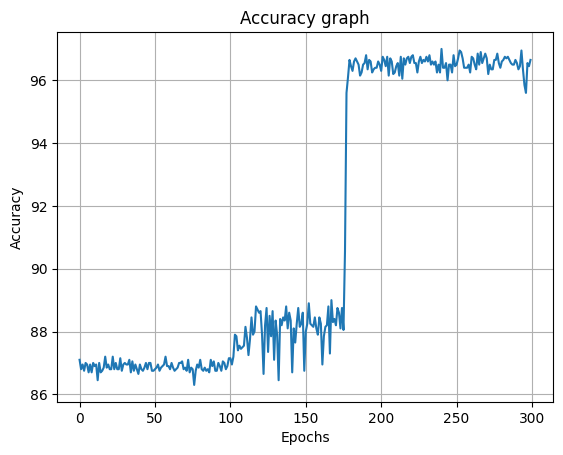

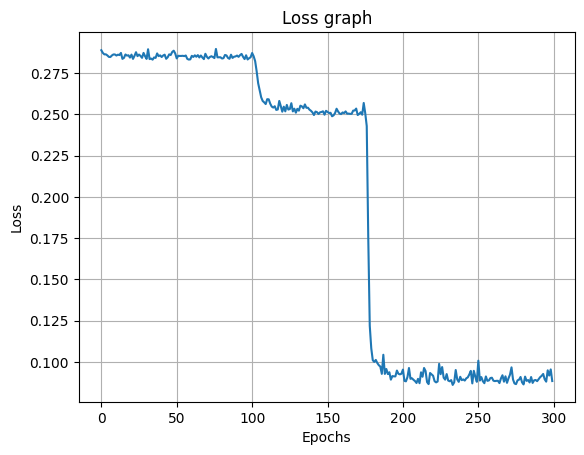

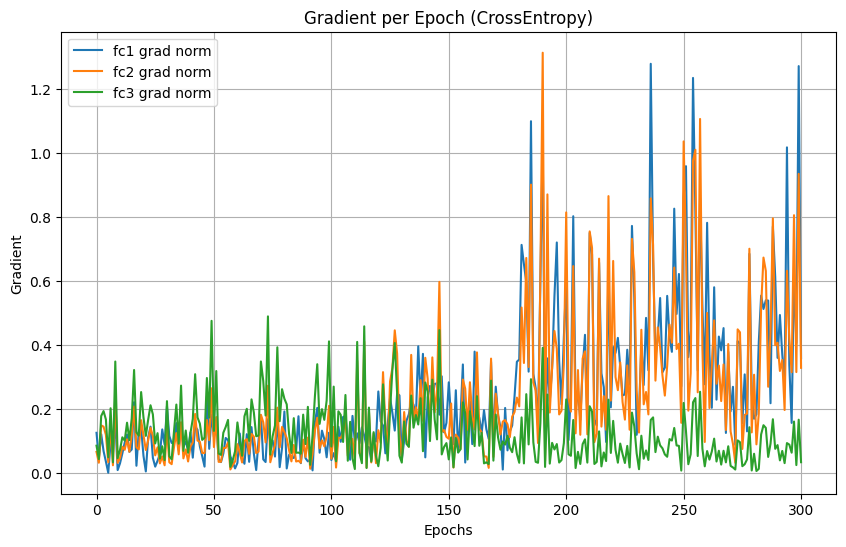

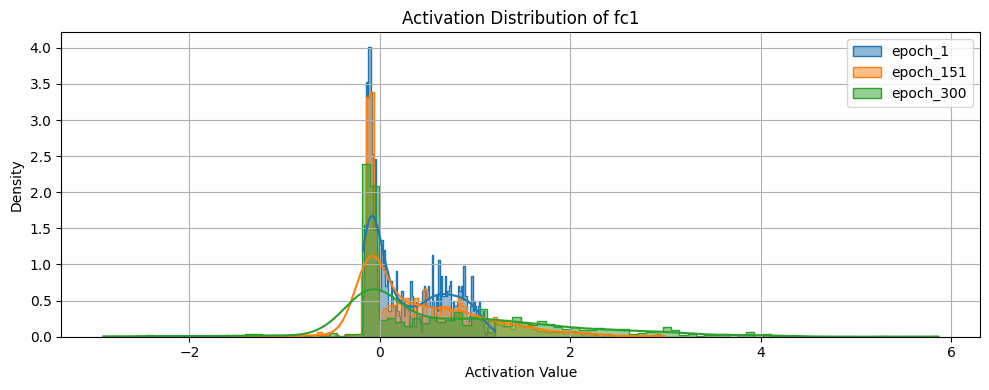

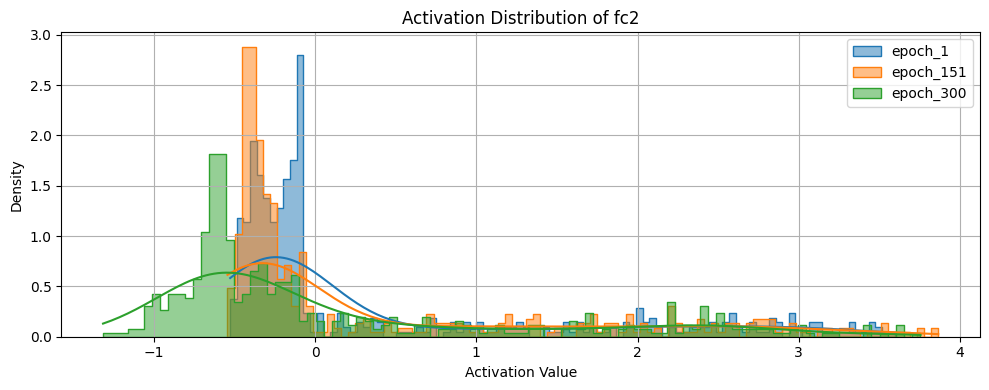

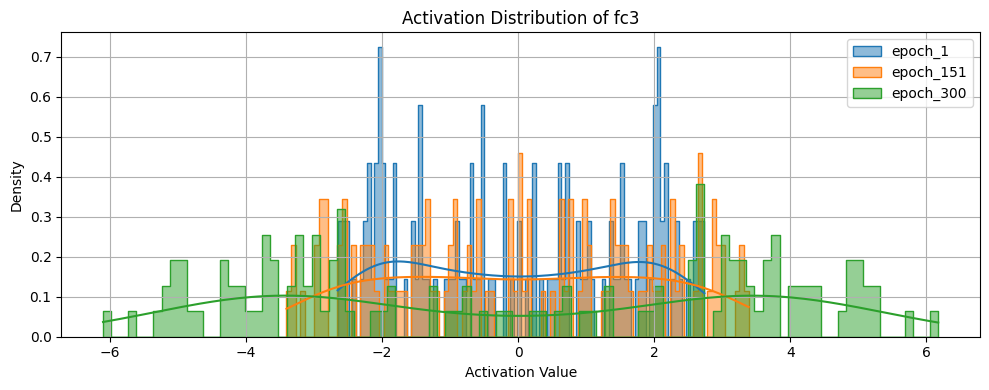

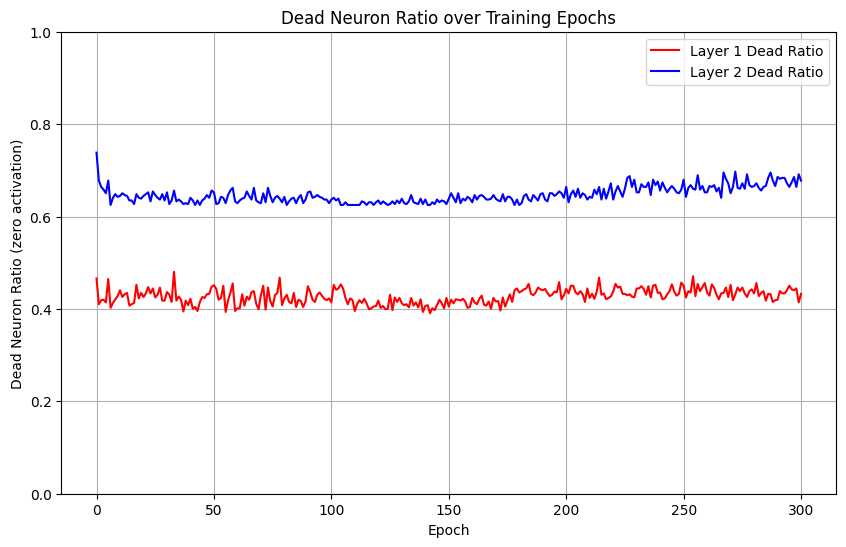

<ipython-input-47-bbafa1f516ef>:75: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-47-bbafa1f516ef>:75: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-47-bbafa1f516ef>:75: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-47-bbafa1f516ef>:75: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-47-bbafa1f516ef>:75: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-47-bbafa1f516ef>:75: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) D

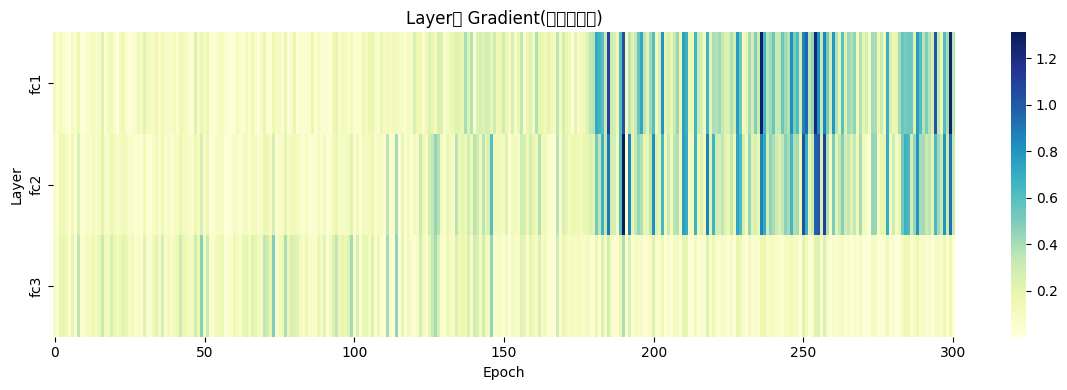

<ipython-input-47-bbafa1f516ef>:75: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-47-bbafa1f516ef>:75: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-47-bbafa1f516ef>:75: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  fig.canvas.prin

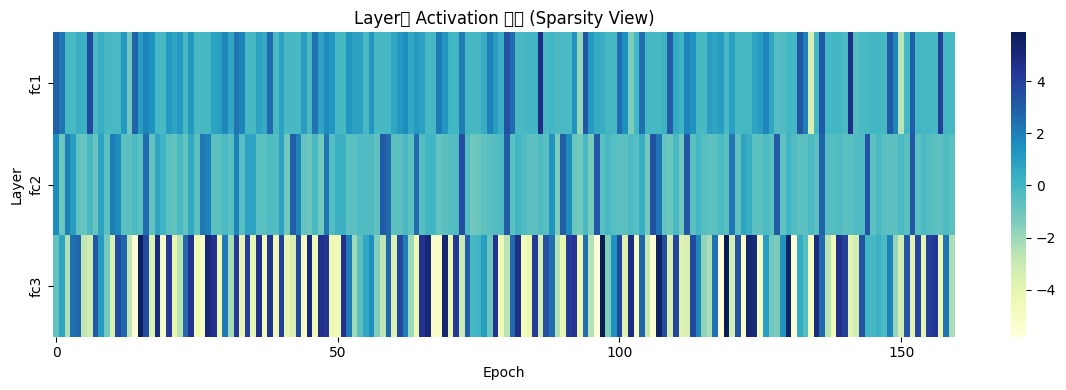

In [47]:
# 실험 B-1 결과 시각화 (정확도, 손실)
# 학습 및 검증 데이터셋에서의 정확도와 손실 값이 Epoch마다 어떻게 변화하는지 시각화하여 보여줌
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Accuracy 시각화
plt.plot(accuracy_history)
plt.title('Accuracy graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

# Loss 시각화
plt.plot(loss_history)
plt.title('Loss graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()

# gradient 시각화
plt.figure(figsize=(10,6))
plt.plot(gradients['fc1'], label='fc1 grad norm')
plt.plot(gradients['fc2'], label='fc2 grad norm')
plt.plot(gradients['fc3'], label='fc3 grad norm')
plt.title("Gradient per Epoch (CrossEntropy)")
plt.xlabel("Epochs")
plt.ylabel("Gradient")
plt.legend()
plt.grid()
plt.show()

# activation function 값 시각화
def plot_activation_distributions(snapshot_dict, layers=['fc1', 'fc2', 'fc3']):
    for layer in layers:
        plt.figure(figsize=(10, 4))
        for epoch_label, layer_acts in snapshot_dict.items():
            sns.histplot(layer_acts[layer], bins=100, kde=True, stat='density', label=epoch_label, element="step")
        plt.title(f'Activation Distribution of {layer}')
        plt.xlabel('Activation Value')
        plt.ylabel('Density')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

plot_activation_distributions(activation_snapshot)

# Dead neuron 비율 시각화
plt.figure(figsize=(10, 6))
plt.plot(dead_neuron_ratio_history['layer1'], label='Layer 1 Dead Ratio', color='red')
plt.plot(dead_neuron_ratio_history['layer2'], label='Layer 2 Dead Ratio', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Dead Neuron Ratio (zero activation)')
plt.title('Dead Neuron Ratio over Training Epochs')
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

def plot_heatmap(data_dict, title, cmap='YlGnBu'):
    # 최소 길이 확인
    min_len = min(len(v) for v in data_dict.values())

    # 동일한 길이로 자르기
    data_matrix = np.array([v[:min_len] for v in data_dict.values()])

    plt.figure(figsize=(12, 4))
    sns.heatmap(data_matrix, cmap=cmap, xticklabels=50, yticklabels=list(data_dict.keys()))
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("Layer")
    plt.tight_layout()
    plt.show()


plot_heatmap(gradients, "Layer별 Gradient(학습기여도)")
plot_heatmap(activation_history, "Layer별 Activation 비율 (Sparsity View)")

# 실험 B-2. 활성화 함수: LeakyReLU

In [19]:
# 실험 B-2 MLP 모델 정의
class B2(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(B2, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.leakyRelu1 = nn.LeakyReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.leakyRelu2 = nn.LeakyReLU()
        self.fc3 = nn.Linear(hidden_size2, num_classes)

        self.act1 = None  # LeakyReLU1 이후 출력 저장
        self.act2 = None  # LeakyReLU2 이후 출력 저장

    def forward(self, x):
        x = self.fc1(x)
        x = self.leakyRelu1(x)
        self.act1 = x.detach()
        x = self.fc2(x)
        x = self.leakyRelu2(x)
        self.act2 = x.detach()
        x = self.fc3(x)
        return x

# 초기화 함수 정의
def init_weights_small_std(m):
    if isinstance(m, nn.Linear):
        nn.init.normal_(m.weight, mean=0.0, std=0.01)  # 가중치를 작은 정규분포로 초기화
        if m.bias is not None:
            nn.init.constant_(m.bias, 0.0)             # 바이어스는 0으로 초기화

In [20]:
# 모델 및 최적화 알고리즘 설정
# 모델을 GPU로 이동(.to(device))시켜 빠르게 학습할 수 있도록 함.
modelB_2 = B2(input_size, hidden_size1, hidden_size2, num_classes).to(device)
modelB_2.apply(init_weights_small_std)  # 초기화 적용

# 손실함수 및 옵티마이저 설정
loss_function = nn.CrossEntropyLoss()  # 내부적으로 log(softmax()) 계산을 포함하고 있음.
optimizer = optim.Adam(modelB_2.parameters(), lr=learning_rate)

In [21]:
# 시각화를 위해 필요한 accuracy, loss, gradient, activation 값들을 저장하기 위한 변수 정의
accuracy_history = []
loss_history = []
gradients = {
    'fc1': [],
    'fc2': [],
    'fc3': [],
}

activation_history = {}
activation_snapshot = {}

# Dead neuron 비율 추적용 변수
dead_neuron_ratio_history = {
    'layer1': [],
    'layer2': []
}

# hook 함수 정의
def get_activation(name):
    def hook(model, input, output):
        activation_history[name] = output.detach().cpu().view(-1).numpy()
    return hook

# hook 등록
modelB_2.fc1.register_forward_hook(get_activation('fc1'))
modelB_2.fc2.register_forward_hook(get_activation('fc2'))
modelB_2.fc3.register_forward_hook(get_activation('fc3'))

In [22]:
# 모델 학습
for epoch in range(num_epochs):
    modelB_2.train()
    total_loss = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        # 순전파
        outputs = modelB_2(images)
        loss = loss_function(outputs, labels)

        # 역전파 및 최적화 : 역전파(backpropagation)를 통해 모델의 가중치를 업데이트
        optimizer.zero_grad()  # 이전 기울기 초기화
        loss.backward()        # 역전파를 통한 기울기 계산
        optimizer.step()       # 가중치 업데이트

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader) # 평균 손실을 계산하여 학습 상황을 확인함.

    # Epoch마다 각 Layer별 Gradient 추적
    with torch.no_grad():
        gradients['fc1'].append(modelB_2.fc1.weight.grad.norm().item())
        gradients['fc2'].append(modelB_2.fc2.weight.grad.norm().item())
        gradients['fc3'].append(modelB_2.fc3.weight.grad.norm().item())

        zero_ratio1 = (modelB_2.act1 == 0).float().mean().item()
        zero_ratio2 = (modelB_2.act2 == 0).float().mean().item()

        dead_neuron_ratio_history['layer1'].append(zero_ratio1)
        dead_neuron_ratio_history['layer2'].append(zero_ratio2)

    # 학습이 완료된 모델의 성능(정확도)을 평가
    # 검증 데이터셋에서 평가 : 매 epoch이 끝난 후 테스트 데이터를 통해 정확도를 측정
    modelB_2.eval()
    correct = 0 # correct: 정확히 맞춘 데이터 개수
    total = 0 # total: 전체 데이터 개수

    if epoch in [0, num_epochs // 2, num_epochs - 1]:
        epoch_label = f"epoch_{epoch+1}"
        activation_snapshot[epoch_label] = activation_history.copy()

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = modelB_2(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total

    accuracy_history.append(accuracy)
    loss_history.append(avg_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Validation Accuracy: {accuracy:.2f}%')

# 최종 평가 : 최종 epoch이 끝난 후의 테스트 데이터 정확도를 출력함.
print(f'최종 테스트 정확률: {accuracy:.2f}%')

Epoch [1/300], Loss: 0.4717, Validation Accuracy: 88.05%
Epoch [2/300], Loss: 0.2588, Validation Accuracy: 88.70%
Epoch [3/300], Loss: 0.2493, Validation Accuracy: 88.25%
Epoch [4/300], Loss: 0.2505, Validation Accuracy: 88.90%
Epoch [5/300], Loss: 0.2459, Validation Accuracy: 88.15%
Epoch [6/300], Loss: 0.2474, Validation Accuracy: 88.90%
Epoch [7/300], Loss: 0.2438, Validation Accuracy: 88.75%
Epoch [8/300], Loss: 0.2459, Validation Accuracy: 88.75%
Epoch [9/300], Loss: 0.2467, Validation Accuracy: 88.90%
Epoch [10/300], Loss: 0.2458, Validation Accuracy: 88.95%
Epoch [11/300], Loss: 0.2456, Validation Accuracy: 88.65%
Epoch [12/300], Loss: 0.2437, Validation Accuracy: 88.25%
Epoch [13/300], Loss: 0.2437, Validation Accuracy: 88.85%
Epoch [14/300], Loss: 0.2448, Validation Accuracy: 89.15%
Epoch [15/300], Loss: 0.2443, Validation Accuracy: 88.95%
Epoch [16/300], Loss: 0.2440, Validation Accuracy: 89.10%
Epoch [17/300], Loss: 0.2432, Validation Accuracy: 88.95%
Epoch [18/300], Loss: 0

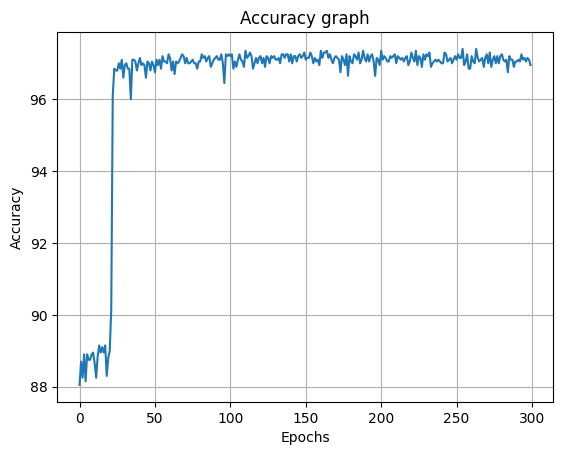

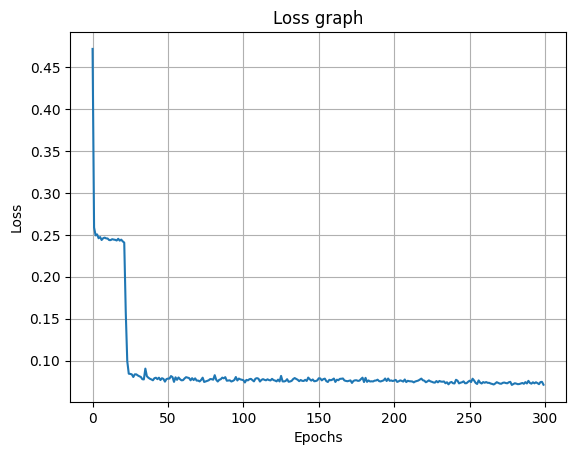

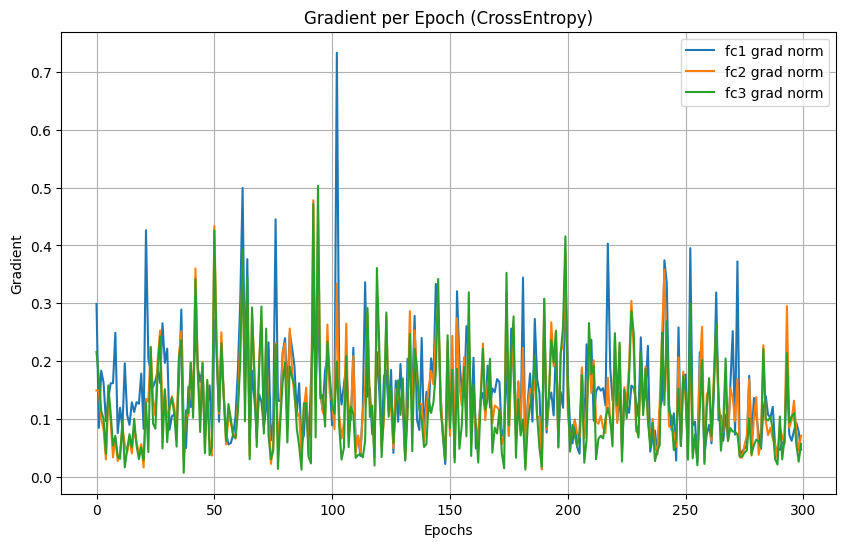

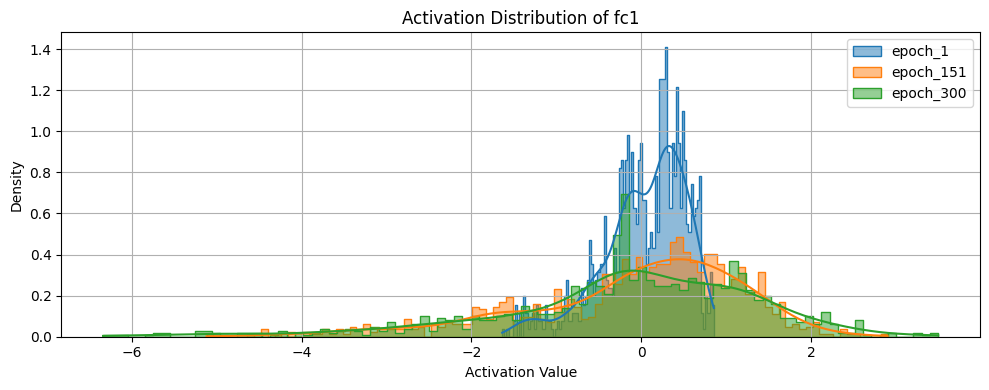

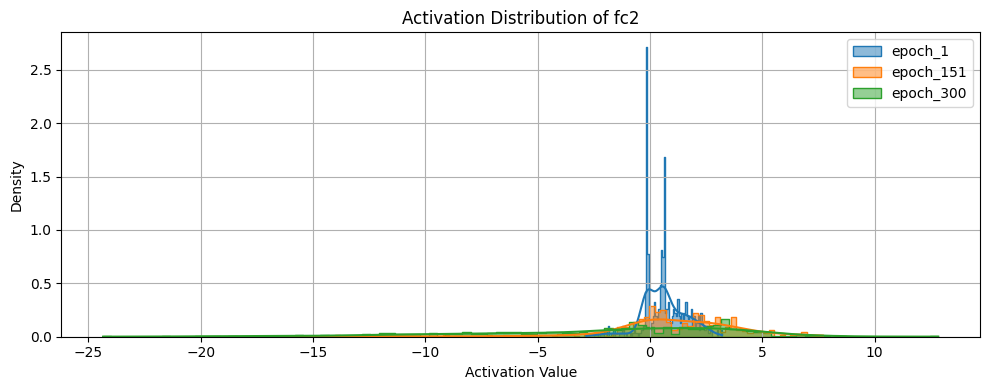

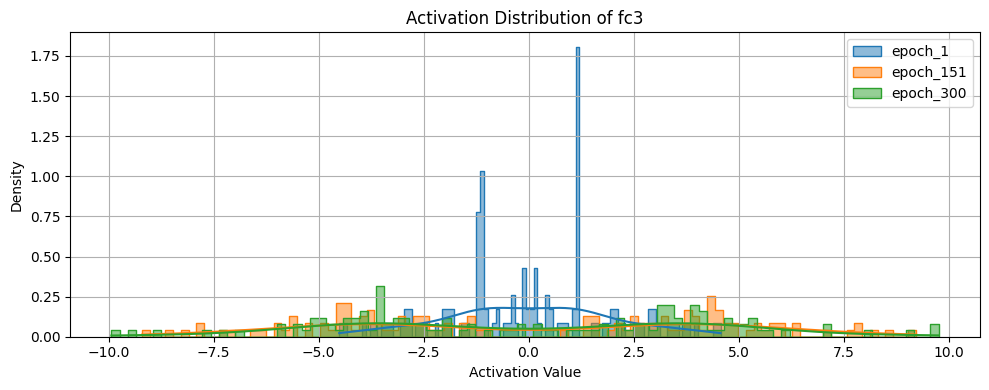

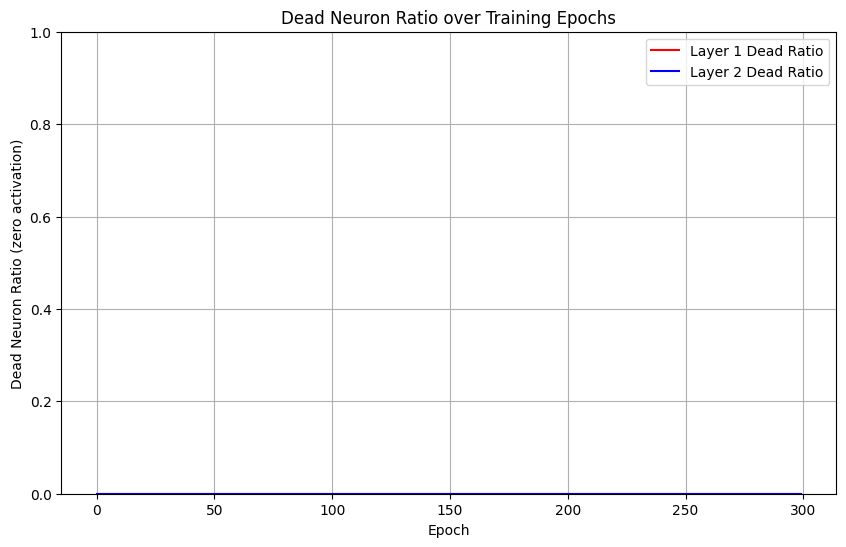

In [23]:
# 실험 B-2 결과 시각화 (정확도, 손실)
# 학습 및 검증 데이터셋에서의 정확도와 손실 값이 Epoch마다 어떻게 변화하는지 시각화하여 보여줌
import matplotlib.pyplot as plt
import seaborn as sns

# Accuracy 시각화
plt.plot(accuracy_history)
plt.title('Accuracy graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

# Loss 시각화
plt.plot(loss_history)
plt.title('Loss graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()

# gradient 시각화
plt.figure(figsize=(10,6))
plt.plot(gradients['fc1'], label='fc1 grad norm')
plt.plot(gradients['fc2'], label='fc2 grad norm')
plt.plot(gradients['fc3'], label='fc3 grad norm')
plt.title("Gradient per Epoch (CrossEntropy)")
plt.xlabel("Epochs")
plt.ylabel("Gradient")
plt.legend()
plt.grid()
plt.show()

# activation function 값 시각화
def plot_activation_distributions(snapshot_dict, layers=['fc1', 'fc2', 'fc3']):
    for layer in layers:
        plt.figure(figsize=(10, 4))
        for epoch_label, layer_acts in snapshot_dict.items():
            sns.histplot(layer_acts[layer], bins=100, kde=True, stat='density', label=epoch_label, element="step")
        plt.title(f'Activation Distribution of {layer}')
        plt.xlabel('Activation Value')
        plt.ylabel('Density')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

plot_activation_distributions(activation_snapshot)

# Dead neuron 비율 시각화
plt.figure(figsize=(10, 6))
plt.plot(dead_neuron_ratio_history['layer1'], label='Layer 1 Dead Ratio', color='red')
plt.plot(dead_neuron_ratio_history['layer2'], label='Layer 2 Dead Ratio', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Dead Neuron Ratio (zero activation)')
plt.title('Dead Neuron Ratio over Training Epochs')
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

# 실험 B-3. 활성화 함수: Sigmoid

In [24]:
# 실험 B-3 MLP 모델 정의
class B3(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(B3, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.sigmoid1 = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.sigmoid2 = nn.Sigmoid()
        self.fc3 = nn.Linear(hidden_size2, num_classes)

        self.act1 = None  # sigmoid1 이후 출력 저장
        self.act2 = None  # sigmoid2 이후 출력 저장

    def forward(self, x):
        x = self.fc1(x)
        x = self.sigmoid1(x)
        self.act1 = x.detach()
        x = self.fc2(x)
        x = self.sigmoid2(x)
        self.act2 = x.detach()
        x = self.fc3(x)
        return x

# 초기화 함수 정의
def init_weights_small_std(m):
    if isinstance(m, nn.Linear):
        nn.init.normal_(m.weight, mean=0.0, std=0.01)  # 가중치를 작은 정규분포로 초기화
        if m.bias is not None:
            nn.init.constant_(m.bias, 0.0)             # 바이어스는 0으로 초기화

In [25]:
# 모델 및 최적화 알고리즘 설정
# 모델을 GPU로 이동(.to(device))시켜 빠르게 학습할 수 있도록 함.
modelB_3 = B3(input_size, hidden_size1, hidden_size2, num_classes).to(device)
modelB_3.apply(init_weights_small_std)  # 초기화 적용

# 손실함수 및 옵티마이저 설정
loss_function = nn.CrossEntropyLoss()  # 내부적으로 log(softmax()) 계산을 포함하고 있음.
optimizer = optim.Adam(modelB_3.parameters(), lr=learning_rate)

In [27]:
# 시각화를 위해 필요한 accuracy, loss, gradient, activation 값들을 저장하기 위한 변수 정의
accuracy_history = []
loss_history = []
gradients = {
    'fc1': [],
    'fc2': [],
    'fc3': [],
}

activation_history = {}
activation_snapshot = {}

# Dead neuron 비율 추적용 변수
dead_neuron_ratio_history = {
    'layer1': [],
    'layer2': []
}

# hook 함수 정의
def get_activation(name):
    def hook(model, input, output):
        activation_history[name] = output.detach().cpu().view(-1).numpy()
    return hook

# hook 등록
modelB_3.fc1.register_forward_hook(get_activation('fc1'))
modelB_3.fc2.register_forward_hook(get_activation('fc2'))
modelB_3.fc3.register_forward_hook(get_activation('fc3'))

In [28]:
# 모델 학습
for epoch in range(num_epochs):
    modelB_3.train()
    total_loss = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        # 순전파
        outputs = modelB_3(images)
        loss = loss_function(outputs, labels)

        # 역전파 및 최적화 : 역전파(backpropagation)를 통해 모델의 가중치를 업데이트
        optimizer.zero_grad()  # 이전 기울기 초기화
        loss.backward()        # 역전파를 통한 기울기 계산
        optimizer.step()       # 가중치 업데이트

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader) # 평균 손실을 계산하여 학습 상황을 확인함.

    # Epoch마다 각 Layer별 Gradient 추적
    with torch.no_grad():
        gradients['fc1'].append(modelB_3.fc1.weight.grad.norm().item())
        gradients['fc2'].append(modelB_3.fc2.weight.grad.norm().item())
        gradients['fc3'].append(modelB_3.fc3.weight.grad.norm().item())

        zero_ratio1 = (modelB_3.act1 == 0).float().mean().item()
        zero_ratio2 = (modelB_3.act2 == 0).float().mean().item()

        dead_neuron_ratio_history['layer1'].append(zero_ratio1)
        dead_neuron_ratio_history['layer2'].append(zero_ratio2)

    # 학습이 완료된 모델의 성능(정확도)을 평가
    # 검증 데이터셋에서 평가 : 매 epoch이 끝난 후 테스트 데이터를 통해 정확도를 측정
    modelB_3.eval()
    correct = 0 # correct: 정확히 맞춘 데이터 개수
    total = 0 # total: 전체 데이터 개수

    if epoch in [0, num_epochs // 2, num_epochs - 1]:
        epoch_label = f"epoch_{epoch+1}"
        activation_snapshot[epoch_label] = activation_history.copy()

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = modelB_3(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total

    accuracy_history.append(accuracy)
    loss_history.append(avg_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Validation Accuracy: {accuracy:.2f}%')

# 최종 평가 : 최종 epoch이 끝난 후의 테스트 데이터 정확도를 출력함.
print(f'최종 테스트 정확률: {accuracy:.2f}%')

Epoch [1/300], Loss: 0.6603, Validation Accuracy: 81.45%
Epoch [2/300], Loss: 0.3737, Validation Accuracy: 86.65%
Epoch [3/300], Loss: 0.2989, Validation Accuracy: 86.60%
Epoch [4/300], Loss: 0.2946, Validation Accuracy: 87.00%
Epoch [5/300], Loss: 0.2939, Validation Accuracy: 86.80%
Epoch [6/300], Loss: 0.2936, Validation Accuracy: 86.80%
Epoch [7/300], Loss: 0.2901, Validation Accuracy: 86.90%
Epoch [8/300], Loss: 0.2905, Validation Accuracy: 86.95%
Epoch [9/300], Loss: 0.2913, Validation Accuracy: 86.80%
Epoch [10/300], Loss: 0.2914, Validation Accuracy: 87.10%
Epoch [11/300], Loss: 0.2884, Validation Accuracy: 87.15%
Epoch [12/300], Loss: 0.2898, Validation Accuracy: 86.95%
Epoch [13/300], Loss: 0.2890, Validation Accuracy: 86.85%
Epoch [14/300], Loss: 0.2874, Validation Accuracy: 86.10%
Epoch [15/300], Loss: 0.2902, Validation Accuracy: 86.95%
Epoch [16/300], Loss: 0.2894, Validation Accuracy: 86.85%
Epoch [17/300], Loss: 0.2880, Validation Accuracy: 86.75%
Epoch [18/300], Loss: 0

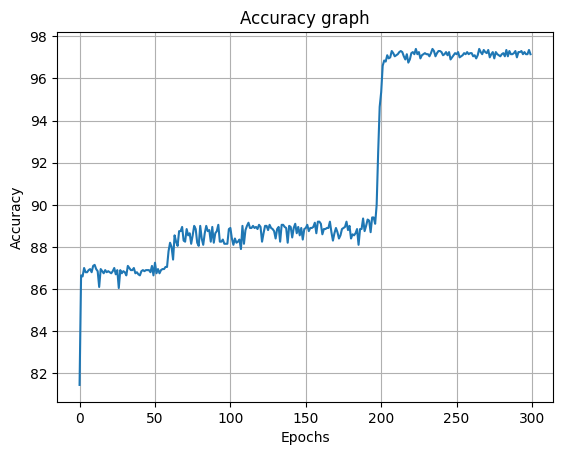

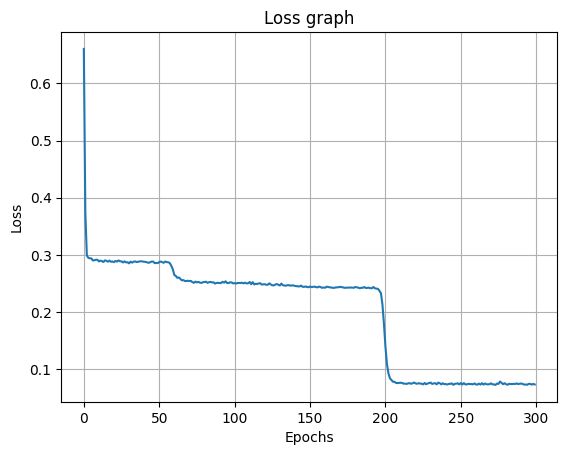

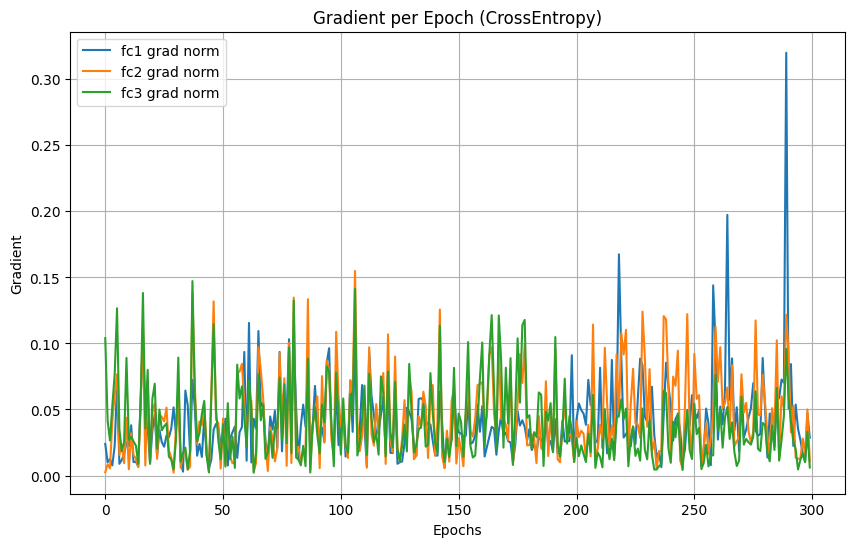

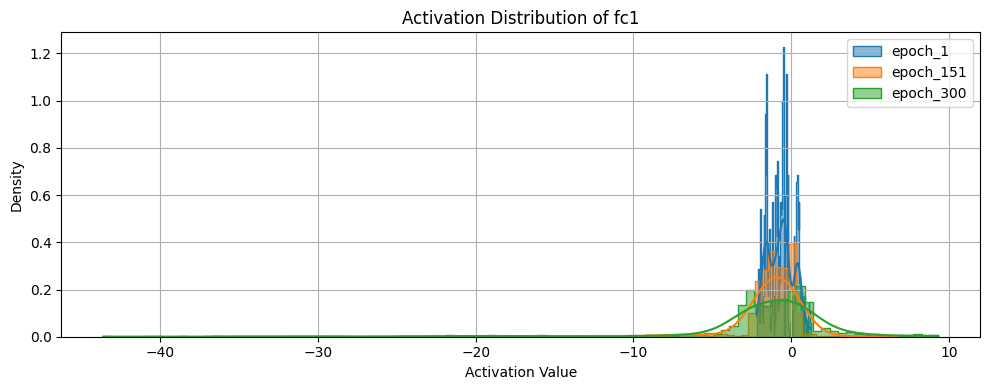

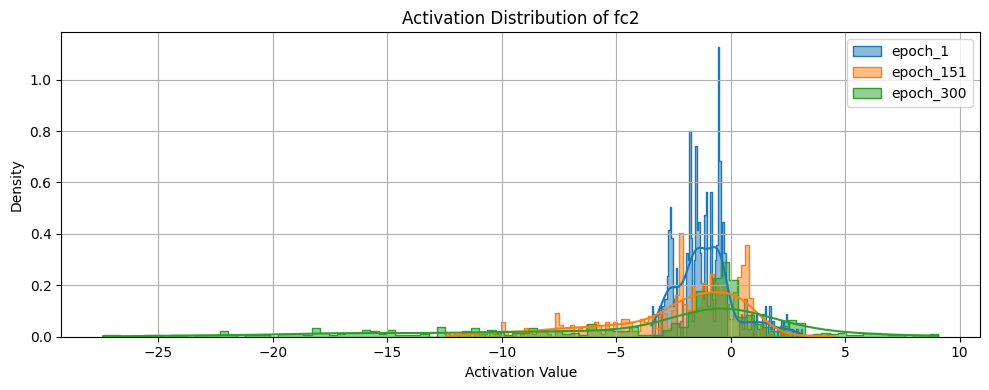

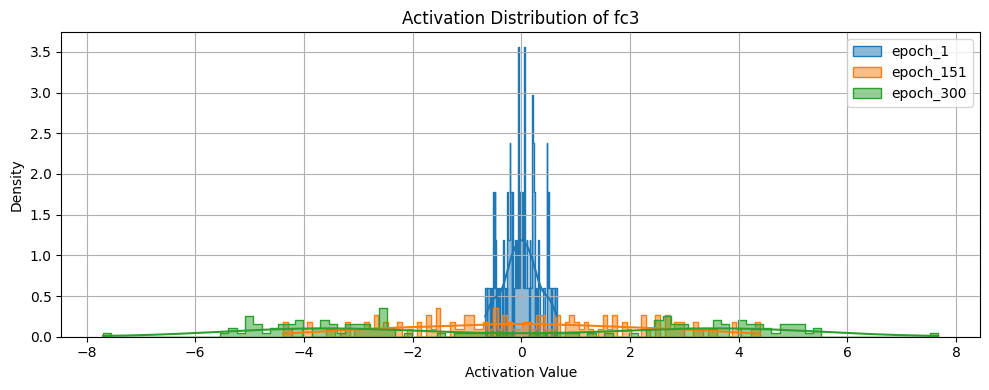

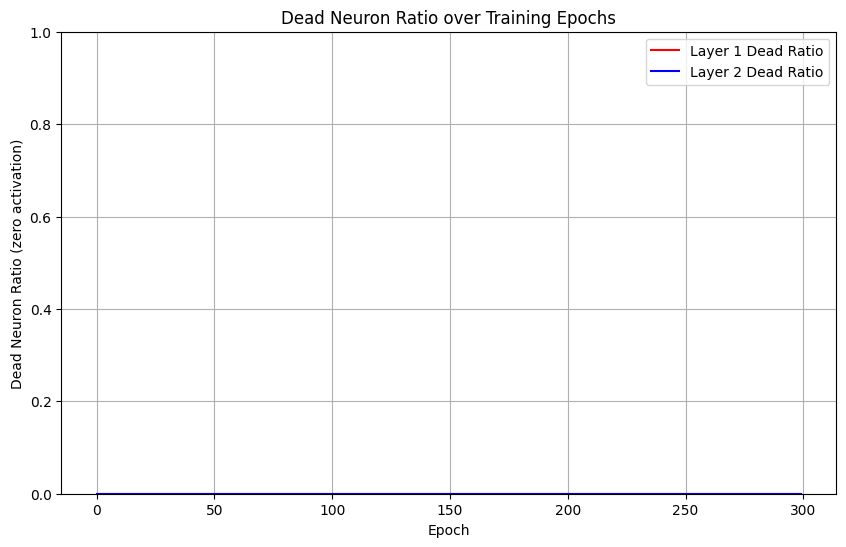

In [29]:
# 실험 B-3 결과 시각화 (정확도, 손실)
# 학습 및 검증 데이터셋에서의 정확도와 손실 값이 Epoch마다 어떻게 변화하는지 시각화하여 보여줌
import matplotlib.pyplot as plt
import seaborn as sns

# Accuracy 시각화
plt.plot(accuracy_history)
plt.title('Accuracy graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

# Loss 시각화
plt.plot(loss_history)
plt.title('Loss graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()

# gradient 시각화
plt.figure(figsize=(10,6))
plt.plot(gradients['fc1'], label='fc1 grad norm')
plt.plot(gradients['fc2'], label='fc2 grad norm')
plt.plot(gradients['fc3'], label='fc3 grad norm')
plt.title("Gradient per Epoch (CrossEntropy)")
plt.xlabel("Epochs")
plt.ylabel("Gradient")
plt.legend()
plt.grid()
plt.show()

# activation function 값 시각화
def plot_activation_distributions(snapshot_dict, layers=['fc1', 'fc2', 'fc3']):
    for layer in layers:
        plt.figure(figsize=(10, 4))
        for epoch_label, layer_acts in snapshot_dict.items():
            sns.histplot(layer_acts[layer], bins=100, kde=True, stat='density', label=epoch_label, element="step")
        plt.title(f'Activation Distribution of {layer}')
        plt.xlabel('Activation Value')
        plt.ylabel('Density')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

plot_activation_distributions(activation_snapshot)

# Dead neuron 비율 시각화
plt.figure(figsize=(10, 6))
plt.plot(dead_neuron_ratio_history['layer1'], label='Layer 1 Dead Ratio', color='red')
plt.plot(dead_neuron_ratio_history['layer2'], label='Layer 2 Dead Ratio', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Dead Neuron Ratio (zero activation)')
plt.title('Dead Neuron Ratio over Training Epochs')
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

# [실험 C] 최적화 알고리즘 비교: SGD, SGD+Momentum, Adam

In [50]:
# PyTorch 버전의 DeepMLP에서의 MNIST 분류 코드
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# GPU 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [58]:
# 하이퍼 파라미터 for MNIST
input_size = 784     # 입력 크기 (28×28 픽셀 이미지)
hidden_size1 = 1024  # 첫 번째 은닉층의 뉴런 수
hidden_size2 = 512   # 두 번째 은닉층의 뉴런 수
hidden_size3 = 512   # 세 번째 은닉층의 뉴런 수
num_classes = 10     # 출력 클래스 수 (숫자 0~9)
batch_size = 128     # 한 번에 처리하는 데이터의 개수
learning_rate = 0.1  # 학습률
num_epochs = 30      # 전체 데이터셋을 반복하는 횟수

In [ ]:
# MNIST 데이터셋 로딩 및 전처리
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# 실험 C-1. 최적화 알고리즘: SGD

## 실험 C-1-1. 학습률: 0.1, 스케줄러 O

In [60]:
# 실험 C-1-1 MLP 모델 정의
class C11(nn.Module):
    def __init__(self, input_size, hidden1, hidden2, hidden3, num_classes):
        super(C11, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1)
        self.leakyRelu1 = nn.LeakyReLU()
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.leakyRelu2 = nn.LeakyReLU()
        self.fc3 = nn.Linear(hidden2, hidden3)
        self.leakyRelu3 = nn.LeakyReLU()
        self.fc4 = nn.Linear(hidden3, num_classes)

        self.act1 = None
        self.act2 = None

    def forward(self, x):
        x = self.fc1(x)
        x = self.leakyRelu1(x)
        self.act1 = x.detach()
        x = self.fc2(x)
        x = self.leakyRelu2(x)
        self.act2 = x.detach()
        x = self.fc3(x)
        x = self.leakyRelu3(x)
        x = self.fc4(x)
        return x

# 모델 및 최적화 알고리즘 설정
# 모델을 GPU로 이동(.to(device))시켜 빠르게 학습할 수 있도록 함.
modelC_11 = C11(input_size, hidden_size1, hidden_size2, hidden_size3, num_classes).to(device)

# 손실함수 및 옵티마이저 설정
loss_function = nn.CrossEntropyLoss()  # 내부적으로 log(softmax()) 계산을 포함하고 있음.
optimizer = optim.SGD(modelC_11.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

In [61]:
# 시각화를 위해 필요한 accuracy, loss, gradient, activation 값들을 저장하기 위한 변수 정의
accuracy_history = []
loss_history = []
gradients = {
    'fc1': [],
    'fc2': [],
    'fc3': [],
    'fc4': []
}

activation_history = {}
activation_snapshot = {}
lr_history = []

# hook 함수 정의
def get_activation(name):
    def hook(model, input, output):
        activation_history[name] = output.detach().cpu().view(-1).numpy()
    return hook

# hook 등록
modelC_11.fc1.register_forward_hook(get_activation('fc1'))
modelC_11.fc2.register_forward_hook(get_activation('fc2'))
modelC_11.fc3.register_forward_hook(get_activation('fc3'))
modelC_11.fc4.register_forward_hook(get_activation('fc4'))

In [62]:
# 모델 학습
lr_history.append(optimizer.param_groups[0]['lr'])

for epoch in range(num_epochs):
    modelC_11.train()
    total_loss = 0
    for images, labels in train_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # 순전파
        outputs = modelC_11(images)
        loss = loss_function(outputs, labels)

        # 역전파 및 최적화 : 역전파(backpropagation)를 통해 모델의 가중치를 업데이트
        optimizer.zero_grad()  # 이전 기울기 초기화
        loss.backward()        # 역전파를 통한 기울기 계산
        optimizer.step()       # 가중치 업데이트

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader) # 평균 손실을 계산하여 학습 상황을 확인함.

    # Epoch마다 각 Layer별 Gradient 추적
    with torch.no_grad():
        gradients['fc1'].append(modelC_11.fc1.weight.grad.norm().item())
        gradients['fc2'].append(modelC_11.fc2.weight.grad.norm().item())
        gradients['fc3'].append(modelC_11.fc3.weight.grad.norm().item())
        gradients['fc4'].append(modelC_11.fc4.weight.grad.norm().item())

    # 학습이 완료된 모델의 성능(정확도)을 평가
    # 검증 데이터셋에서 평가 : 매 epoch이 끝난 후 테스트 데이터를 통해 정확도를 측정
    modelC_11.eval()
    correct = 0 # correct: 정확히 맞춘 데이터 개수
    total = 0 # total: 전체 데이터 개수

    if epoch in [0, num_epochs // 2, num_epochs - 1]:
        epoch_label = f"epoch_{epoch+1}"
        activation_snapshot[epoch_label] = activation_history.copy()

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.reshape(-1, 28*28).to(device) # MNIST 데이터의 이미지 크기(28×28)를 1차원 형태로 펼쳐 모델 입력 형태에 맞춤.
            labels = labels.to(device)
            outputs = modelC_11(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total

    accuracy_history.append(accuracy)
    loss_history.append(avg_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Validation Accuracy: {accuracy:.2f}%')
    scheduler.step()
    lr_history.append(scheduler.get_last_lr()[0])  # ExponentialLR은 리스트로 반환하므로 [0]으로 접근

# 최종 평가 : 최종 epoch이 끝난 후의 테스트 데이터 정확도를 출력함.
print(f'최종 테스트 정확률: {accuracy:.2f}%')

Epoch [1/30], Loss: 0.8229, Validation Accuracy: 91.74%
Epoch [2/30], Loss: 0.2349, Validation Accuracy: 94.49%
Epoch [3/30], Loss: 0.1574, Validation Accuracy: 95.80%
Epoch [4/30], Loss: 0.1208, Validation Accuracy: 96.57%
Epoch [5/30], Loss: 0.0972, Validation Accuracy: 96.84%
Epoch [6/30], Loss: 0.0805, Validation Accuracy: 96.72%
Epoch [7/30], Loss: 0.0683, Validation Accuracy: 97.35%
Epoch [8/30], Loss: 0.0596, Validation Accuracy: 97.17%
Epoch [9/30], Loss: 0.0518, Validation Accuracy: 97.71%
Epoch [10/30], Loss: 0.0459, Validation Accuracy: 97.75%
Epoch [11/30], Loss: 0.0409, Validation Accuracy: 97.65%
Epoch [12/30], Loss: 0.0369, Validation Accuracy: 97.87%
Epoch [13/30], Loss: 0.0334, Validation Accuracy: 97.83%
Epoch [14/30], Loss: 0.0306, Validation Accuracy: 97.98%
Epoch [15/30], Loss: 0.0283, Validation Accuracy: 97.98%
Epoch [16/30], Loss: 0.0262, Validation Accuracy: 98.06%
Epoch [17/30], Loss: 0.0247, Validation Accuracy: 97.99%
Epoch [18/30], Loss: 0.0232, Validation 

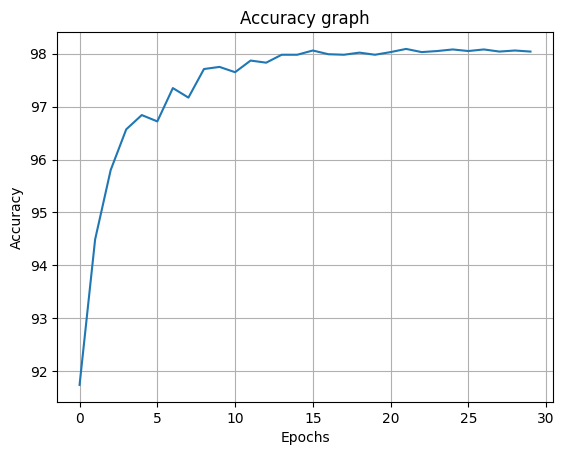

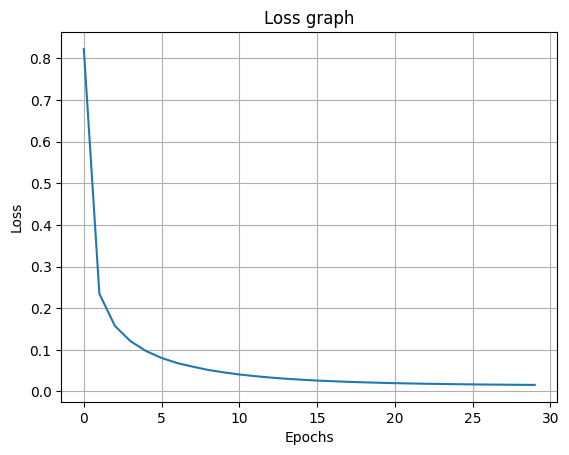

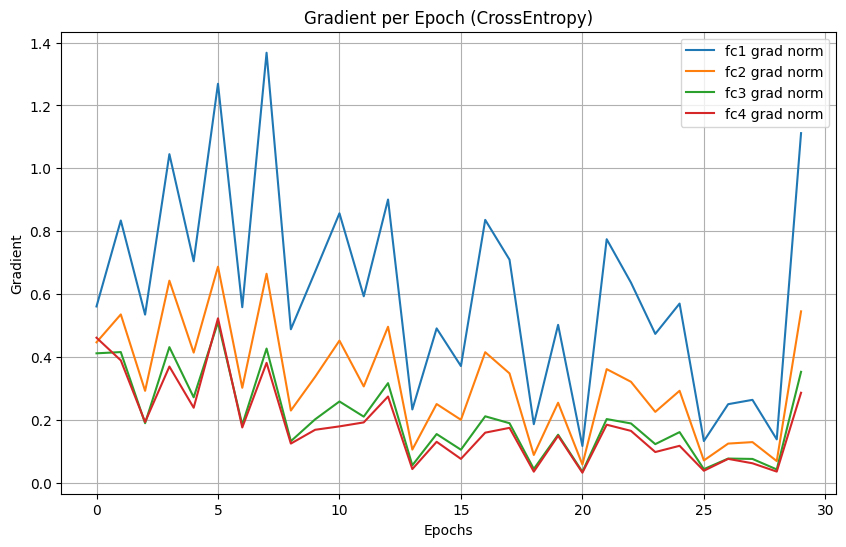

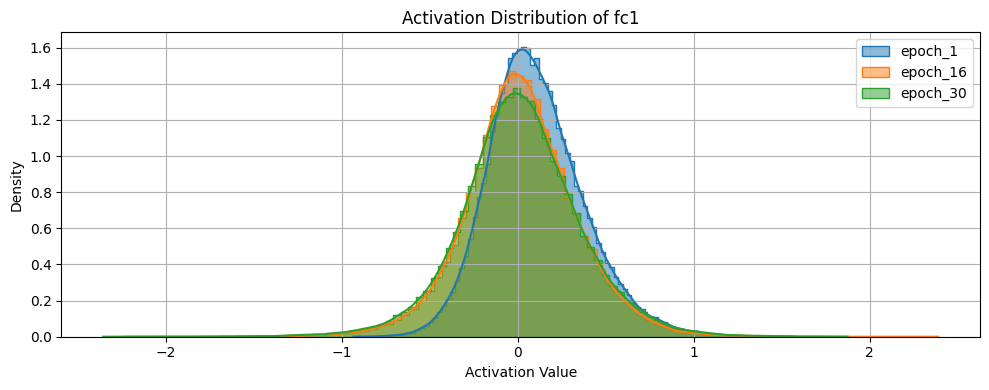

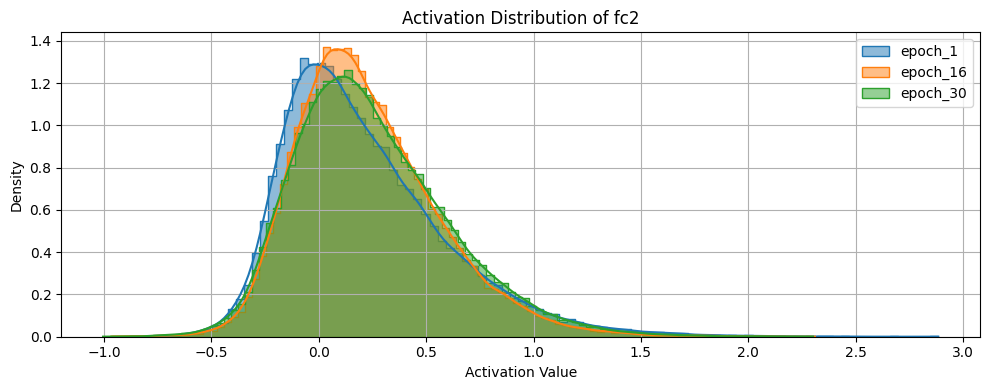

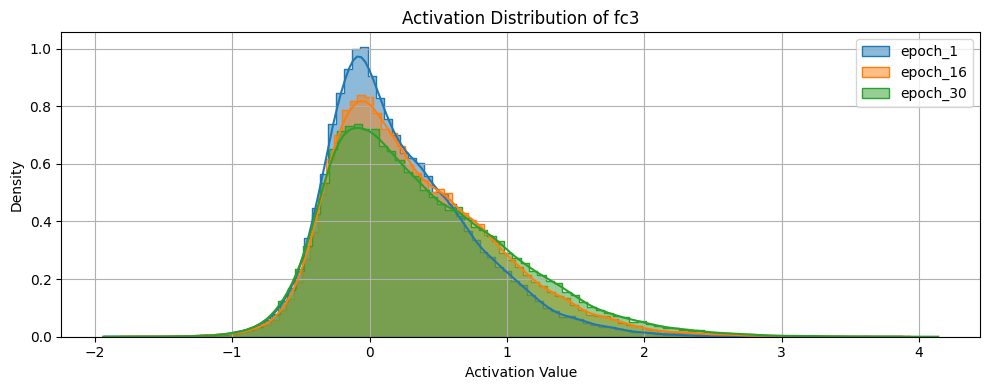

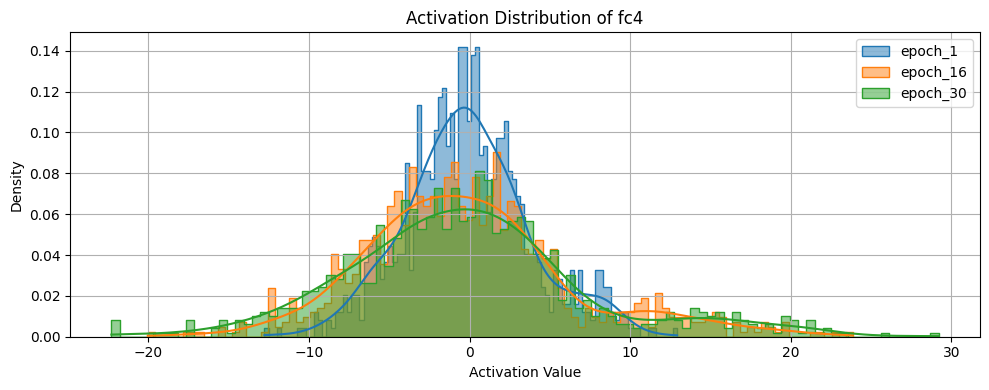

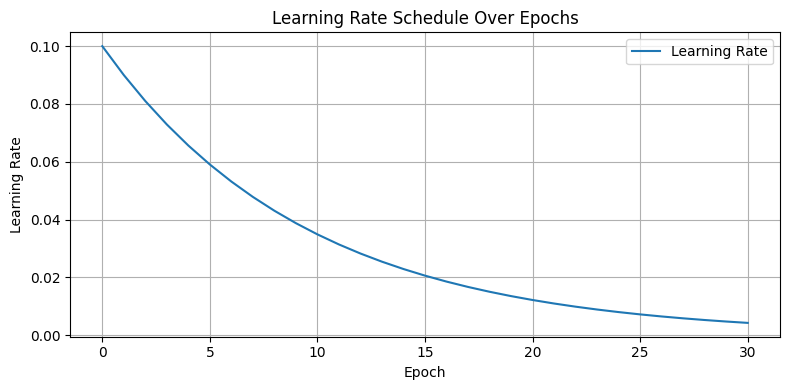

In [63]:
# 실험 C-1-1 결과 시각화 (정확도, 손실)
# 학습 및 검증 데이터셋에서의 정확도와 손실 값이 Epoch마다 어떻게 변화하는지 시각화하여 보여줌
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(accuracy_history)
plt.title('Accuracy graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

plt.plot(loss_history)
plt.title('Loss graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(gradients['fc1'], label='fc1 grad norm')
plt.plot(gradients['fc2'], label='fc2 grad norm')
plt.plot(gradients['fc3'], label='fc3 grad norm')
plt.plot(gradients['fc4'], label='fc4 grad norm')
plt.title("Gradient per Epoch (CrossEntropy)")
plt.xlabel("Epochs")
plt.ylabel("Gradient")
plt.legend()
plt.grid()
plt.show()

def plot_activation_distributions(snapshot_dict, layers=['fc1', 'fc2', 'fc3', 'fc4']):
    for layer in layers:
        plt.figure(figsize=(10, 4))
        for epoch_label, layer_acts in snapshot_dict.items():
            sns.histplot(layer_acts[layer], bins=100, kde=True, stat='density', label=epoch_label, element="step")
        plt.title(f'Activation Distribution of {layer}')
        plt.xlabel('Activation Value')
        plt.ylabel('Density')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

plot_activation_distributions(activation_snapshot)

plt.figure(figsize=(8, 4))
plt.plot(lr_history, label="Learning Rate")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Learning Rate Schedule Over Epochs")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## 실험 C-1-2. 학습률: 0.01, 스케줄러 O

In [68]:
learning_rate = 0.01  # 학습률

In [69]:
# 실험 C-1-2 MLP 모델 정의
class C12(nn.Module):
    def __init__(self, input_size, hidden1, hidden2, hidden3, num_classes):
        super(C12, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1)
        self.leakyRelu1 = nn.LeakyReLU()
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.leakyRelu2 = nn.LeakyReLU()
        self.fc3 = nn.Linear(hidden2, hidden3)
        self.leakyRelu3 = nn.LeakyReLU()
        self.fc4 = nn.Linear(hidden3, num_classes)

        self.act1 = None
        self.act2 = None

    def forward(self, x):
        x = self.fc1(x)
        x = self.leakyRelu1(x)
        self.act1 = x.detach()
        x = self.fc2(x)
        x = self.leakyRelu2(x)
        self.act2 = x.detach()
        x = self.fc3(x)
        x = self.leakyRelu3(x)
        x = self.fc4(x)
        return x

# 모델 및 최적화 알고리즘 설정
# 모델을 GPU로 이동(.to(device))시켜 빠르게 학습할 수 있도록 함.
modelC_12 = C12(input_size, hidden_size1, hidden_size2, hidden_size3, num_classes).to(device)

# 손실함수 및 옵티마이저 설정
loss_function = nn.CrossEntropyLoss()  # 내부적으로 log(softmax()) 계산을 포함하고 있음.
optimizer = optim.SGD(modelC_12.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

In [70]:
# 시각화를 위해 필요한 accuracy, loss, gradient, activation 값들을 저장하기 위한 변수 정의
accuracy_history = []
loss_history = []
gradients = {
    'fc1': [],
    'fc2': [],
    'fc3': [],
    'fc4': []
}

activation_history = {}
activation_snapshot = {}
lr_history = []

# hook 함수 정의
def get_activation(name):
    def hook(model, input, output):
        activation_history[name] = output.detach().cpu().view(-1).numpy()
    return hook

# hook 등록
modelC_12.fc1.register_forward_hook(get_activation('fc1'))
modelC_12.fc2.register_forward_hook(get_activation('fc2'))
modelC_12.fc3.register_forward_hook(get_activation('fc3'))
modelC_12.fc4.register_forward_hook(get_activation('fc4'))

In [71]:
# 모델 학습
lr_history.append(optimizer.param_groups[0]['lr'])

for epoch in range(num_epochs):
    modelC_12.train()
    total_loss = 0
    for images, labels in train_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # 순전파
        outputs = modelC_12(images)
        loss = loss_function(outputs, labels)

        # 역전파 및 최적화 : 역전파(backpropagation)를 통해 모델의 가중치를 업데이트
        optimizer.zero_grad()  # 이전 기울기 초기화
        loss.backward()        # 역전파를 통한 기울기 계산
        optimizer.step()       # 가중치 업데이트

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader) # 평균 손실을 계산하여 학습 상황을 확인함.

    # Epoch마다 각 Layer별 Gradient 추적
    with torch.no_grad():
        gradients['fc1'].append(modelC_12.fc1.weight.grad.norm().item())
        gradients['fc2'].append(modelC_12.fc2.weight.grad.norm().item())
        gradients['fc3'].append(modelC_12.fc3.weight.grad.norm().item())
        gradients['fc4'].append(modelC_12.fc4.weight.grad.norm().item())

    # 학습이 완료된 모델의 성능(정확도)을 평가
    # 검증 데이터셋에서 평가 : 매 epoch이 끝난 후 테스트 데이터를 통해 정확도를 측정
    modelC_12.eval()
    correct = 0 # correct: 정확히 맞춘 데이터 개수
    total = 0 # total: 전체 데이터 개수

    if epoch in [0, num_epochs // 2, num_epochs - 1]:
        epoch_label = f"epoch_{epoch+1}"
        activation_snapshot[epoch_label] = activation_history.copy()

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.reshape(-1, 28*28).to(device) # MNIST 데이터의 이미지 크기(28×28)를 1차원 형태로 펼쳐 모델 입력 형태에 맞춤.
            labels = labels.to(device)
            outputs = modelC_12(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total

    accuracy_history.append(accuracy)
    loss_history.append(avg_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Validation Accuracy: {accuracy:.2f}%')
    scheduler.step()
    lr_history.append(scheduler.get_last_lr()[0])  # ExponentialLR은 리스트로 반환하므로 [0]으로 접근

# 최종 평가 : 최종 epoch이 끝난 후의 테스트 데이터 정확도를 출력함.
print(f'최종 테스트 정확률: {accuracy:.2f}%')

Epoch [1/30], Loss: 2.2613, Validation Accuracy: 57.92%
Epoch [2/30], Loss: 1.8277, Validation Accuracy: 71.66%
Epoch [3/30], Loss: 0.8906, Validation Accuracy: 81.92%
Epoch [4/30], Loss: 0.5852, Validation Accuracy: 86.07%
Epoch [5/30], Loss: 0.4753, Validation Accuracy: 87.81%
Epoch [6/30], Loss: 0.4201, Validation Accuracy: 88.78%
Epoch [7/30], Loss: 0.3881, Validation Accuracy: 89.46%
Epoch [8/30], Loss: 0.3670, Validation Accuracy: 89.91%
Epoch [9/30], Loss: 0.3521, Validation Accuracy: 90.37%
Epoch [10/30], Loss: 0.3405, Validation Accuracy: 90.56%
Epoch [11/30], Loss: 0.3315, Validation Accuracy: 90.84%
Epoch [12/30], Loss: 0.3239, Validation Accuracy: 91.00%
Epoch [13/30], Loss: 0.3174, Validation Accuracy: 91.01%
Epoch [14/30], Loss: 0.3122, Validation Accuracy: 91.20%
Epoch [15/30], Loss: 0.3074, Validation Accuracy: 91.21%
Epoch [16/30], Loss: 0.3035, Validation Accuracy: 91.32%
Epoch [17/30], Loss: 0.3000, Validation Accuracy: 91.42%
Epoch [18/30], Loss: 0.2968, Validation 

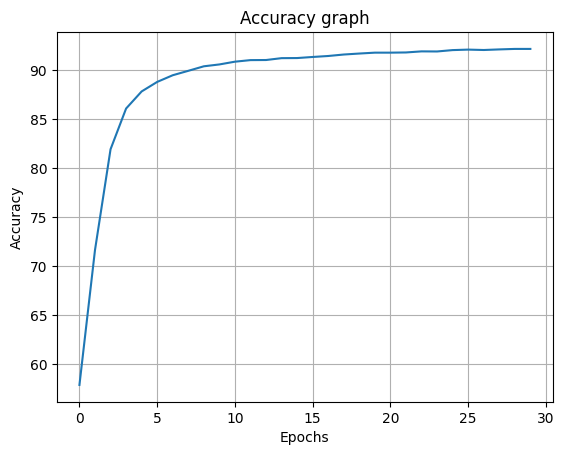

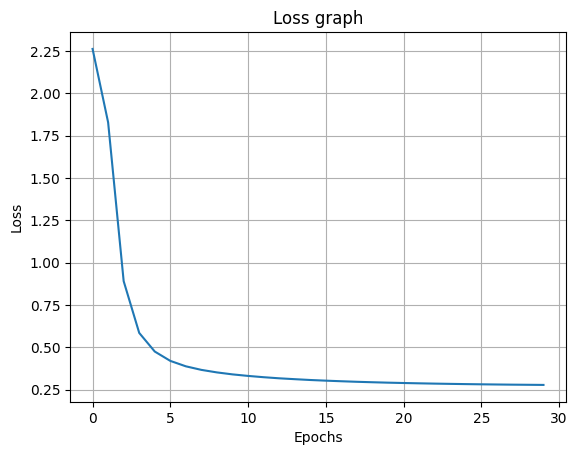

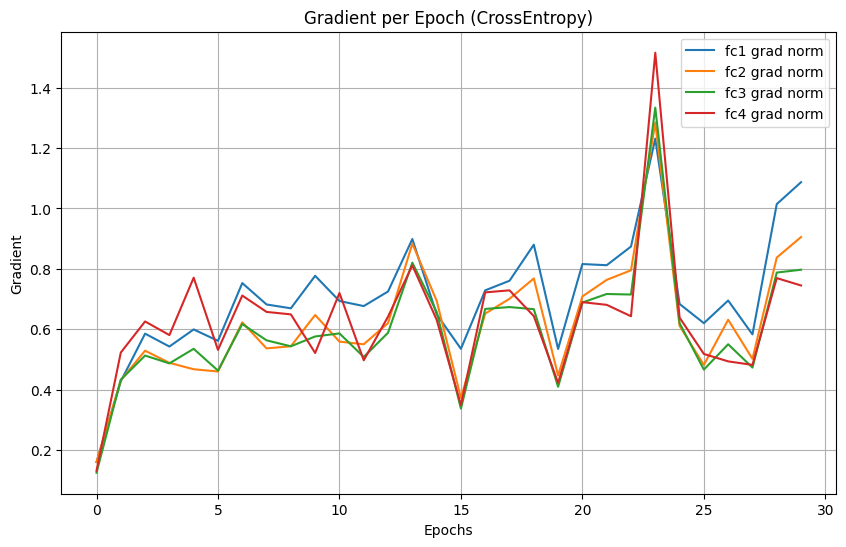

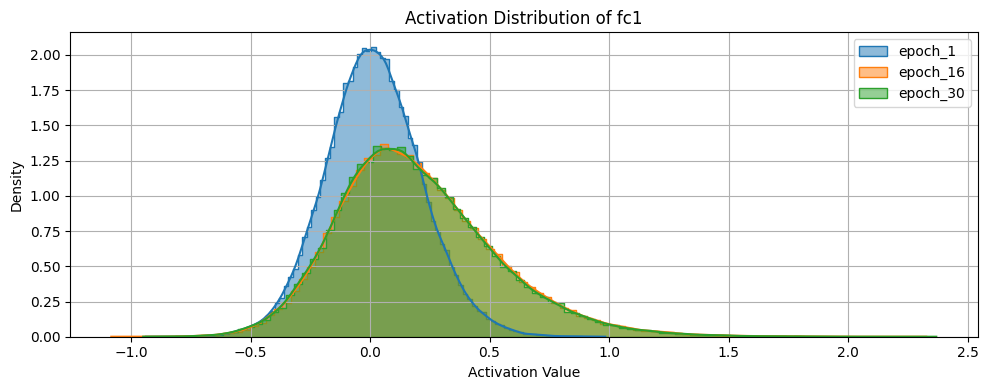

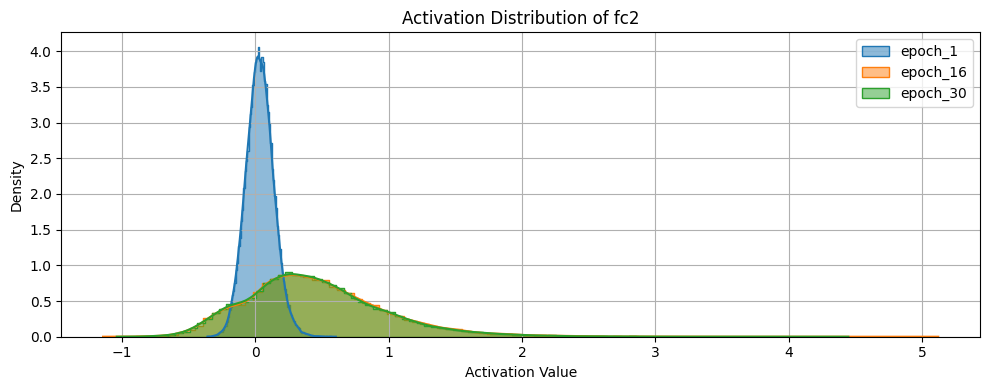

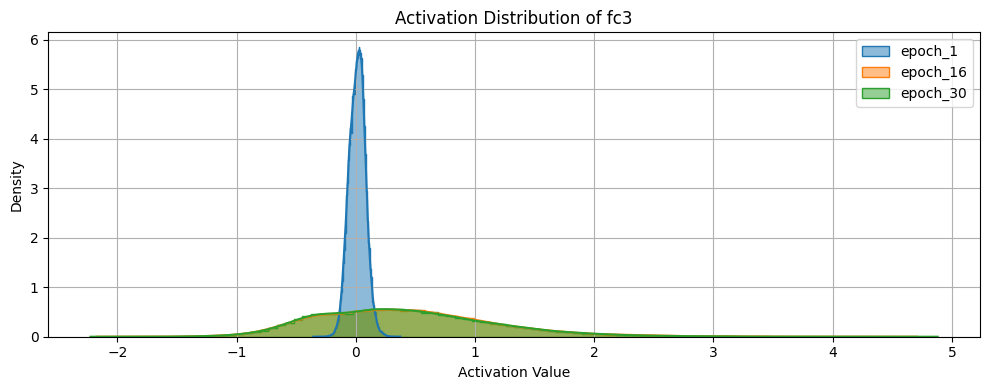

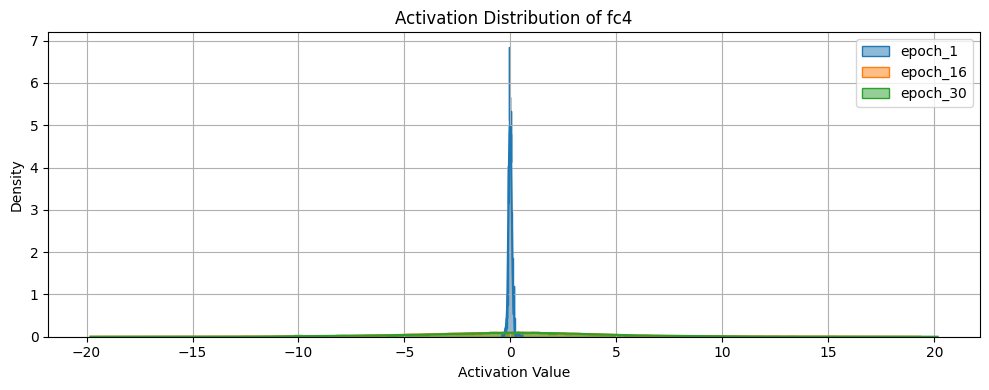

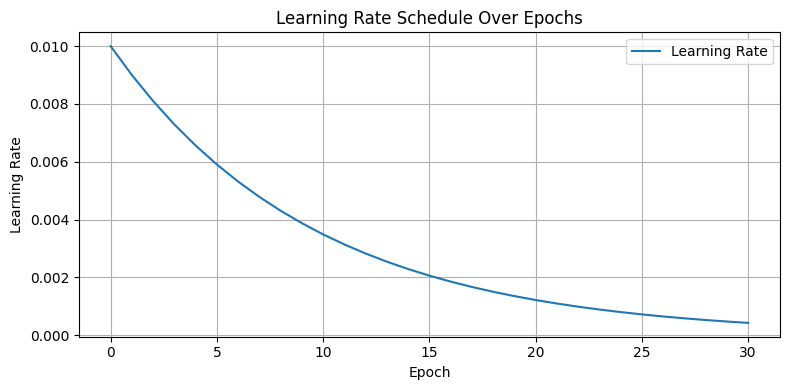

In [72]:
# 실험 C-1-2 결과 시각화 (정확도, 손실)
# 학습 및 검증 데이터셋에서의 정확도와 손실 값이 Epoch마다 어떻게 변화하는지 시각화하여 보여줌
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(accuracy_history)
plt.title('Accuracy graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

plt.plot(loss_history)
plt.title('Loss graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(gradients['fc1'], label='fc1 grad norm')
plt.plot(gradients['fc2'], label='fc2 grad norm')
plt.plot(gradients['fc3'], label='fc3 grad norm')
plt.plot(gradients['fc4'], label='fc4 grad norm')
plt.title("Gradient per Epoch (CrossEntropy)")
plt.xlabel("Epochs")
plt.ylabel("Gradient")
plt.legend()
plt.grid()
plt.show()

def plot_activation_distributions(snapshot_dict, layers=['fc1', 'fc2', 'fc3', 'fc4']):
    for layer in layers:
        plt.figure(figsize=(10, 4))
        for epoch_label, layer_acts in snapshot_dict.items():
            sns.histplot(layer_acts[layer], bins=100, kde=True, stat='density', label=epoch_label, element="step")
        plt.title(f'Activation Distribution of {layer}')
        plt.xlabel('Activation Value')
        plt.ylabel('Density')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

plot_activation_distributions(activation_snapshot)

plt.figure(figsize=(8, 4))
plt.plot(lr_history, label="Learning Rate")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Learning Rate Schedule Over Epochs")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## 실험 C-1-3. 학습률: 0.001, 스케줄러 O

In [73]:
learning_rate = 0.001  # 학습률

In [74]:
# 실험 C-1-3 MLP 모델 정의
class C13(nn.Module):
    def __init__(self, input_size, hidden1, hidden2, hidden3, num_classes):
        super(C13, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1)
        self.leakyRelu1 = nn.LeakyReLU()
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.leakyRelu2 = nn.LeakyReLU()
        self.fc3 = nn.Linear(hidden2, hidden3)
        self.leakyRelu3 = nn.LeakyReLU()
        self.fc4 = nn.Linear(hidden3, num_classes)

        self.act1 = None
        self.act2 = None

    def forward(self, x):
        x = self.fc1(x)
        x = self.leakyRelu1(x)
        self.act1 = x.detach()
        x = self.fc2(x)
        x = self.leakyRelu2(x)
        self.act2 = x.detach()
        x = self.fc3(x)
        x = self.leakyRelu3(x)
        x = self.fc4(x)
        return x

# 모델 및 최적화 알고리즘 설정
# 모델을 GPU로 이동(.to(device))시켜 빠르게 학습할 수 있도록 함.
modelC_13 = C13(input_size, hidden_size1, hidden_size2, hidden_size3, num_classes).to(device)

# 손실함수 및 옵티마이저 설정
loss_function = nn.CrossEntropyLoss()  # 내부적으로 log(softmax()) 계산을 포함하고 있음.
optimizer = optim.SGD(modelC_13.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

In [75]:
# 시각화를 위해 필요한 accuracy, loss, gradient, activation 값들을 저장하기 위한 변수 정의
accuracy_history = []
loss_history = []
gradients = {
    'fc1': [],
    'fc2': [],
    'fc3': [],
    'fc4': []
}

activation_history = {}
activation_snapshot = {}
lr_history = []

# hook 함수 정의
def get_activation(name):
    def hook(model, input, output):
        activation_history[name] = output.detach().cpu().view(-1).numpy()
    return hook

# hook 등록
modelC_13.fc1.register_forward_hook(get_activation('fc1'))
modelC_13.fc2.register_forward_hook(get_activation('fc2'))
modelC_13.fc3.register_forward_hook(get_activation('fc3'))
modelC_13.fc4.register_forward_hook(get_activation('fc4'))

In [76]:
# 모델 학습
lr_history.append(optimizer.param_groups[0]['lr'])

for epoch in range(num_epochs):
    modelC_13.train()
    total_loss = 0
    for images, labels in train_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # 순전파
        outputs = modelC_13(images)
        loss = loss_function(outputs, labels)

        # 역전파 및 최적화 : 역전파(backpropagation)를 통해 모델의 가중치를 업데이트
        optimizer.zero_grad()  # 이전 기울기 초기화
        loss.backward()        # 역전파를 통한 기울기 계산
        optimizer.step()       # 가중치 업데이트

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader) # 평균 손실을 계산하여 학습 상황을 확인함.

    # Epoch마다 각 Layer별 Gradient 추적
    with torch.no_grad():
        gradients['fc1'].append(modelC_13.fc1.weight.grad.norm().item())
        gradients['fc2'].append(modelC_13.fc2.weight.grad.norm().item())
        gradients['fc3'].append(modelC_13.fc3.weight.grad.norm().item())
        gradients['fc4'].append(modelC_13.fc4.weight.grad.norm().item())

    # 학습이 완료된 모델의 성능(정확도)을 평가
    # 검증 데이터셋에서 평가 : 매 epoch이 끝난 후 테스트 데이터를 통해 정확도를 측정
    modelC_13.eval()
    correct = 0 # correct: 정확히 맞춘 데이터 개수
    total = 0 # total: 전체 데이터 개수

    if epoch in [0, num_epochs // 2, num_epochs - 1]:
        epoch_label = f"epoch_{epoch+1}"
        activation_snapshot[epoch_label] = activation_history.copy()

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.reshape(-1, 28*28).to(device) # MNIST 데이터의 이미지 크기(28×28)를 1차원 형태로 펼쳐 모델 입력 형태에 맞춤.
            labels = labels.to(device)
            outputs = modelC_13(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total

    accuracy_history.append(accuracy)
    loss_history.append(avg_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Validation Accuracy: {accuracy:.2f}%')
    scheduler.step()
    lr_history.append(scheduler.get_last_lr()[0])  # ExponentialLR은 리스트로 반환하므로 [0]으로 접근

# 최종 평가 : 최종 epoch이 끝난 후의 테스트 데이터 정확도를 출력함.
print(f'최종 테스트 정확률: {accuracy:.2f}%')

Epoch [1/30], Loss: 2.2997, Validation Accuracy: 13.98%
Epoch [2/30], Loss: 2.2947, Validation Accuracy: 14.97%
Epoch [3/30], Loss: 2.2900, Validation Accuracy: 21.32%
Epoch [4/30], Loss: 2.2854, Validation Accuracy: 29.22%
Epoch [5/30], Loss: 2.2810, Validation Accuracy: 33.52%
Epoch [6/30], Loss: 2.2766, Validation Accuracy: 36.43%
Epoch [7/30], Loss: 2.2723, Validation Accuracy: 38.94%
Epoch [8/30], Loss: 2.2680, Validation Accuracy: 41.43%
Epoch [9/30], Loss: 2.2638, Validation Accuracy: 43.78%
Epoch [10/30], Loss: 2.2597, Validation Accuracy: 45.45%
Epoch [11/30], Loss: 2.2556, Validation Accuracy: 46.73%
Epoch [12/30], Loss: 2.2517, Validation Accuracy: 47.46%
Epoch [13/30], Loss: 2.2480, Validation Accuracy: 48.27%
Epoch [14/30], Loss: 2.2444, Validation Accuracy: 48.94%
Epoch [15/30], Loss: 2.2410, Validation Accuracy: 49.37%
Epoch [16/30], Loss: 2.2377, Validation Accuracy: 49.75%
Epoch [17/30], Loss: 2.2346, Validation Accuracy: 50.11%
Epoch [18/30], Loss: 2.2317, Validation 

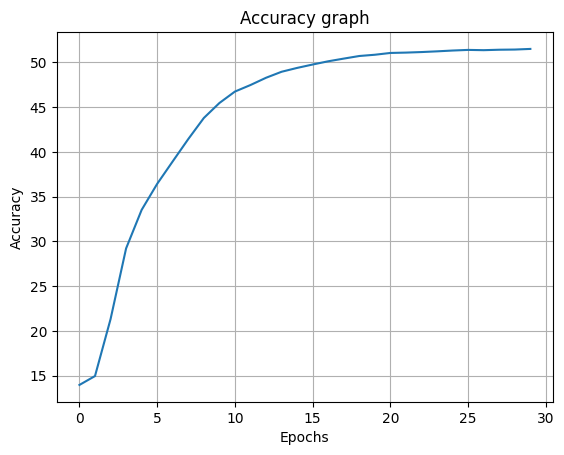

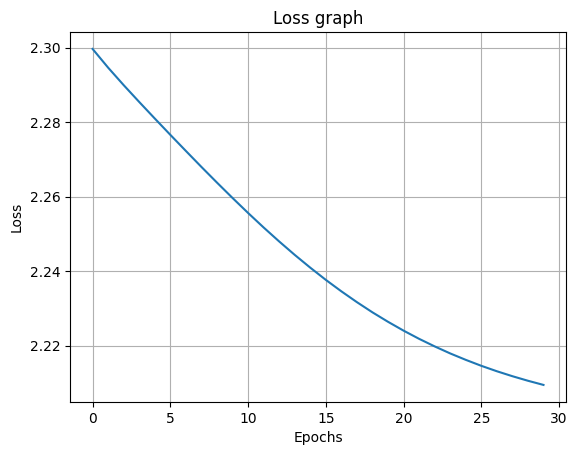

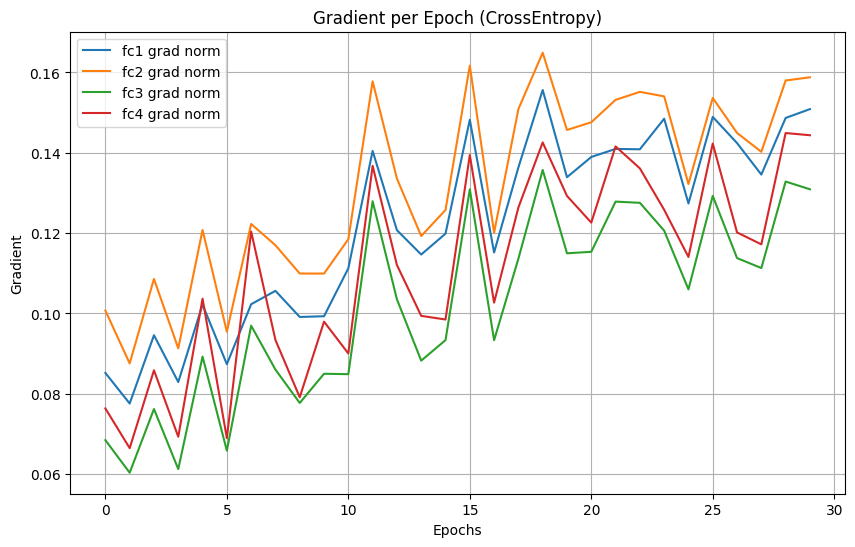

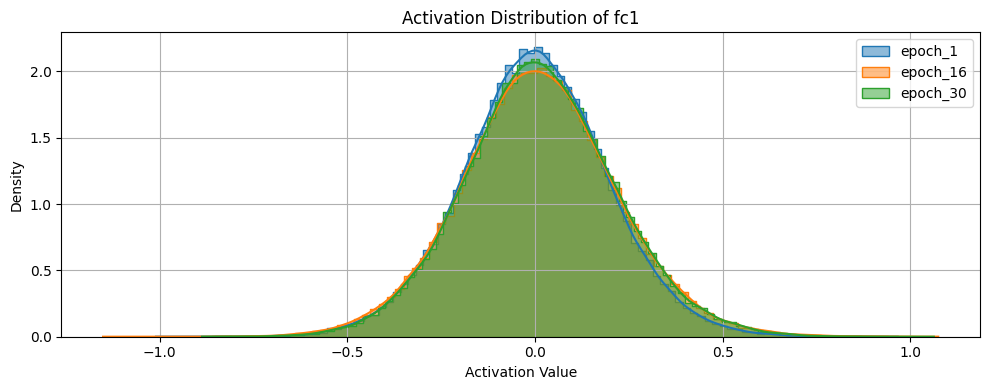

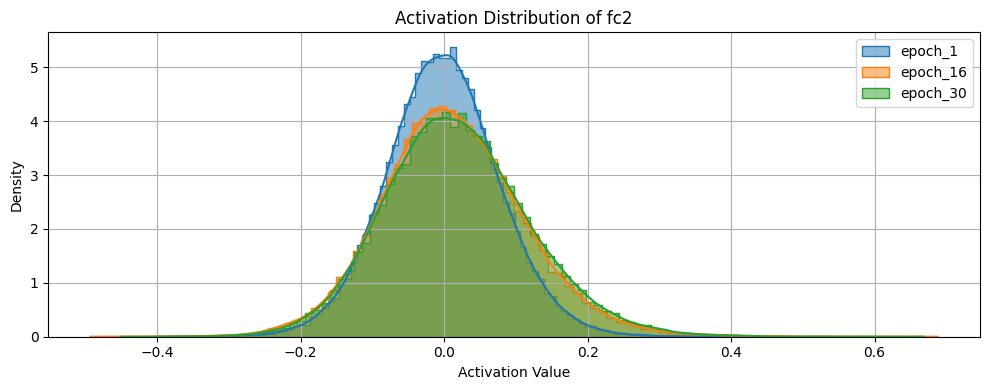

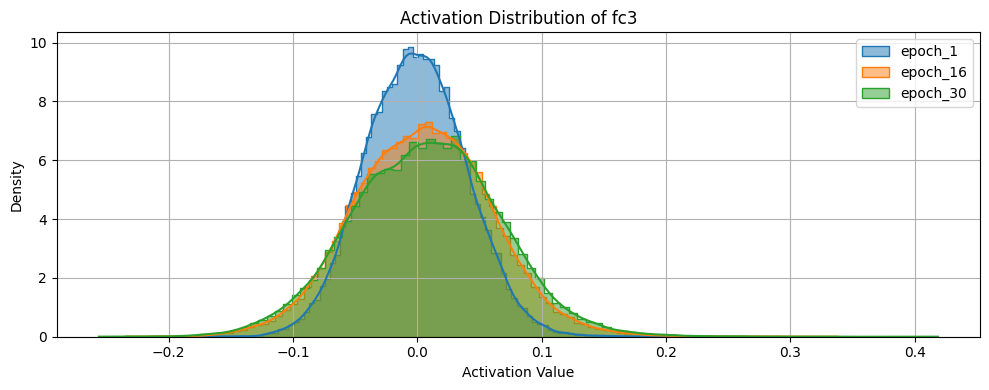

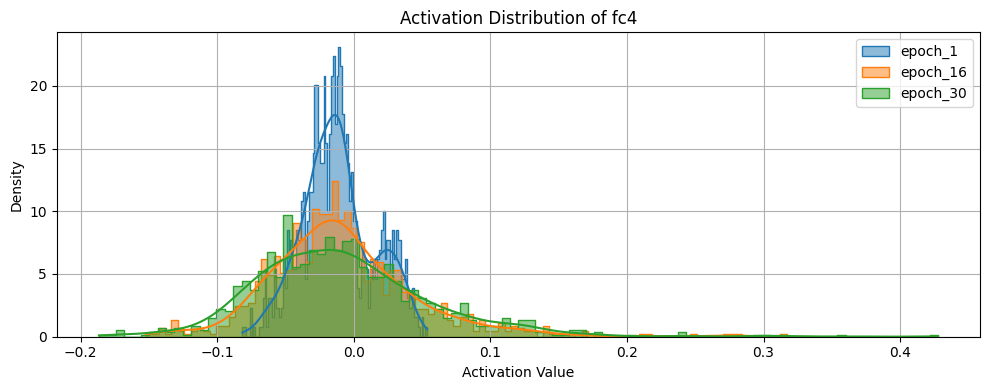

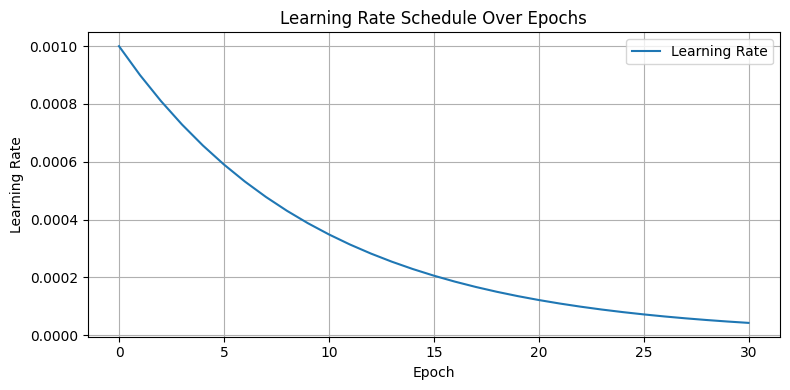

In [77]:
# 실험 C-1-3 결과 시각화 (정확도, 손실)
# 학습 및 검증 데이터셋에서의 정확도와 손실 값이 Epoch마다 어떻게 변화하는지 시각화하여 보여줌
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(accuracy_history)
plt.title('Accuracy graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

plt.plot(loss_history)
plt.title('Loss graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(gradients['fc1'], label='fc1 grad norm')
plt.plot(gradients['fc2'], label='fc2 grad norm')
plt.plot(gradients['fc3'], label='fc3 grad norm')
plt.plot(gradients['fc4'], label='fc4 grad norm')
plt.title("Gradient per Epoch (CrossEntropy)")
plt.xlabel("Epochs")
plt.ylabel("Gradient")
plt.legend()
plt.grid()
plt.show()

def plot_activation_distributions(snapshot_dict, layers=['fc1', 'fc2', 'fc3', 'fc4']):
    for layer in layers:
        plt.figure(figsize=(10, 4))
        for epoch_label, layer_acts in snapshot_dict.items():
            sns.histplot(layer_acts[layer], bins=100, kde=True, stat='density', label=epoch_label, element="step")
        plt.title(f'Activation Distribution of {layer}')
        plt.xlabel('Activation Value')
        plt.ylabel('Density')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

plot_activation_distributions(activation_snapshot)

plt.figure(figsize=(8, 4))
plt.plot(lr_history, label="Learning Rate")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Learning Rate Schedule Over Epochs")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 실험 C-2. 최적화 알고리즘: SGD+Momentum

## 실험 C-2-1. 학습률: 0.1, 스케줄러 O

In [78]:
learning_rate = 0.1  # 학습률

In [79]:
# 실험 C-2-1 MLP 모델 정의
class C21(nn.Module):
    def __init__(self, input_size, hidden1, hidden2, hidden3, num_classes):
        super(C21, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1)
        self.leakyRelu1 = nn.LeakyReLU()
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.leakyRelu2 = nn.LeakyReLU()
        self.fc3 = nn.Linear(hidden2, hidden3)
        self.leakyRelu3 = nn.LeakyReLU()
        self.fc4 = nn.Linear(hidden3, num_classes)

        self.act1 = None
        self.act2 = None

    def forward(self, x):
        x = self.fc1(x)
        x = self.leakyRelu1(x)
        self.act1 = x.detach()
        x = self.fc2(x)
        x = self.leakyRelu2(x)
        self.act2 = x.detach()
        x = self.fc3(x)
        x = self.leakyRelu3(x)
        x = self.fc4(x)
        return x

# 모델 및 최적화 알고리즘 설정
# 모델을 GPU로 이동(.to(device))시켜 빠르게 학습할 수 있도록 함.
modelC_21 = C21(input_size, hidden_size1, hidden_size2, hidden_size3, num_classes).to(device)

# 손실함수 및 옵티마이저 설정
loss_function = nn.CrossEntropyLoss()  # 내부적으로 log(softmax()) 계산을 포함하고 있음.
optimizer = optim.SGD(modelC_21.parameters(), lr=learning_rate, momentum=0.9)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

In [80]:
# 시각화를 위해 필요한 accuracy, loss, gradient, activation 값들을 저장하기 위한 변수 정의
accuracy_history = []
loss_history = []
gradients = {
    'fc1': [],
    'fc2': [],
    'fc3': [],
    'fc4': []
}

activation_history = {}
activation_snapshot = {}
lr_history = []

# hook 함수 정의
def get_activation(name):
    def hook(model, input, output):
        activation_history[name] = output.detach().cpu().view(-1).numpy()
    return hook

# hook 등록
modelC_21.fc1.register_forward_hook(get_activation('fc1'))
modelC_21.fc2.register_forward_hook(get_activation('fc2'))
modelC_21.fc3.register_forward_hook(get_activation('fc3'))
modelC_21.fc4.register_forward_hook(get_activation('fc4'))

In [81]:
# 모델 학습
lr_history.append(optimizer.param_groups[0]['lr'])

for epoch in range(num_epochs):
    modelC_21.train()
    total_loss = 0
    for images, labels in train_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # 순전파
        outputs = modelC_21(images)
        loss = loss_function(outputs, labels)

        # 역전파 및 최적화 : 역전파(backpropagation)를 통해 모델의 가중치를 업데이트
        optimizer.zero_grad()  # 이전 기울기 초기화
        loss.backward()        # 역전파를 통한 기울기 계산
        optimizer.step()       # 가중치 업데이트

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader) # 평균 손실을 계산하여 학습 상황을 확인함.

    # Epoch마다 각 Layer별 Gradient 추적
    with torch.no_grad():
        gradients['fc1'].append(modelC_21.fc1.weight.grad.norm().item())
        gradients['fc2'].append(modelC_21.fc2.weight.grad.norm().item())
        gradients['fc3'].append(modelC_21.fc3.weight.grad.norm().item())
        gradients['fc4'].append(modelC_21.fc4.weight.grad.norm().item())

    # 학습이 완료된 모델의 성능(정확도)을 평가
    # 검증 데이터셋에서 평가 : 매 epoch이 끝난 후 테스트 데이터를 통해 정확도를 측정
    modelC_21.eval()
    correct = 0 # correct: 정확히 맞춘 데이터 개수
    total = 0 # total: 전체 데이터 개수

    if epoch in [0, num_epochs // 2, num_epochs - 1]:
        epoch_label = f"epoch_{epoch+1}"
        activation_snapshot[epoch_label] = activation_history.copy()

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.reshape(-1, 28*28).to(device) # MNIST 데이터의 이미지 크기(28×28)를 1차원 형태로 펼쳐 모델 입력 형태에 맞춤.
            labels = labels.to(device)
            outputs = modelC_21(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total

    accuracy_history.append(accuracy)
    loss_history.append(avg_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Validation Accuracy: {accuracy:.2f}%')
    scheduler.step()
    lr_history.append(scheduler.get_last_lr()[0])  # ExponentialLR은 리스트로 반환하므로 [0]으로 접근

# 최종 평가 : 최종 epoch이 끝난 후의 테스트 데이터 정확도를 출력함.
print(f'최종 테스트 정확률: {accuracy:.2f}%')

Epoch [1/30], Loss: 0.3404, Validation Accuracy: 96.42%
Epoch [2/30], Loss: 0.0950, Validation Accuracy: 97.34%
Epoch [3/30], Loss: 0.0580, Validation Accuracy: 97.53%
Epoch [4/30], Loss: 0.0386, Validation Accuracy: 97.98%
Epoch [5/30], Loss: 0.0268, Validation Accuracy: 98.05%
Epoch [6/30], Loss: 0.0165, Validation Accuracy: 98.21%
Epoch [7/30], Loss: 0.0094, Validation Accuracy: 98.39%
Epoch [8/30], Loss: 0.0050, Validation Accuracy: 98.44%
Epoch [9/30], Loss: 0.0023, Validation Accuracy: 98.53%
Epoch [10/30], Loss: 0.0011, Validation Accuracy: 98.57%
Epoch [11/30], Loss: 0.0006, Validation Accuracy: 98.60%
Epoch [12/30], Loss: 0.0004, Validation Accuracy: 98.63%
Epoch [13/30], Loss: 0.0003, Validation Accuracy: 98.65%
Epoch [14/30], Loss: 0.0003, Validation Accuracy: 98.64%
Epoch [15/30], Loss: 0.0003, Validation Accuracy: 98.65%
Epoch [16/30], Loss: 0.0002, Validation Accuracy: 98.65%
Epoch [17/30], Loss: 0.0002, Validation Accuracy: 98.64%
Epoch [18/30], Loss: 0.0002, Validation 

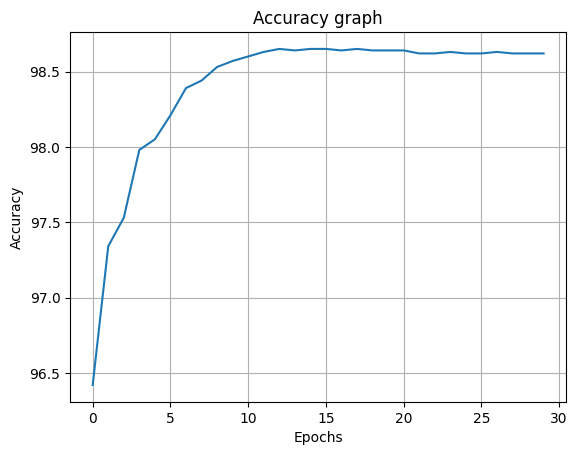

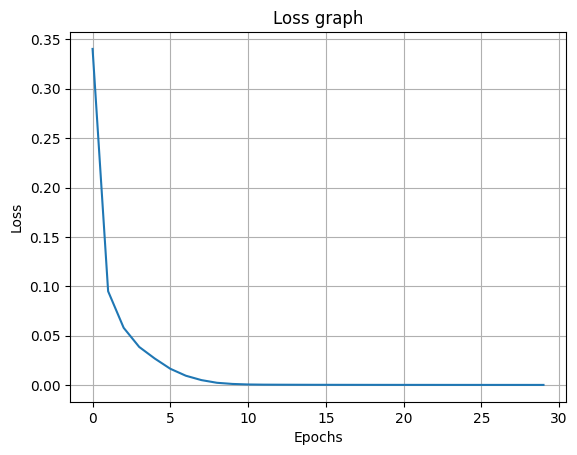

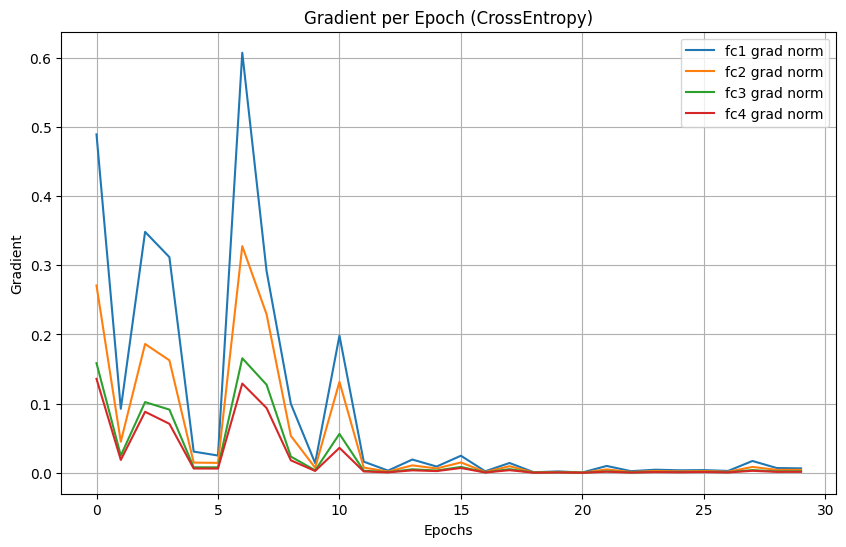

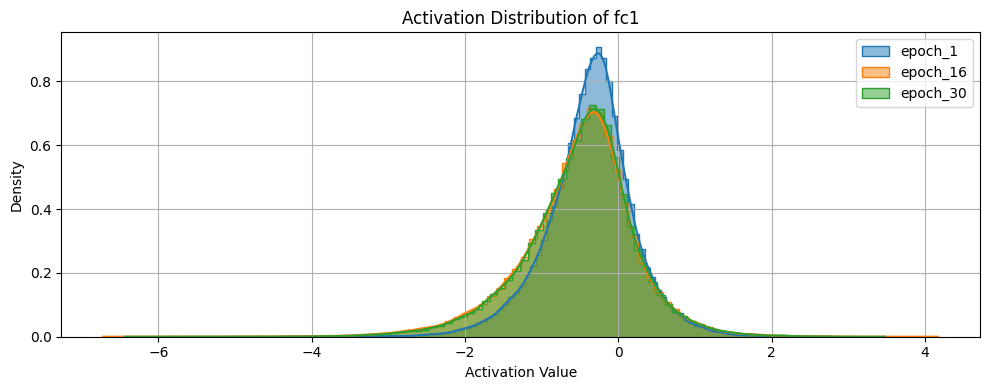

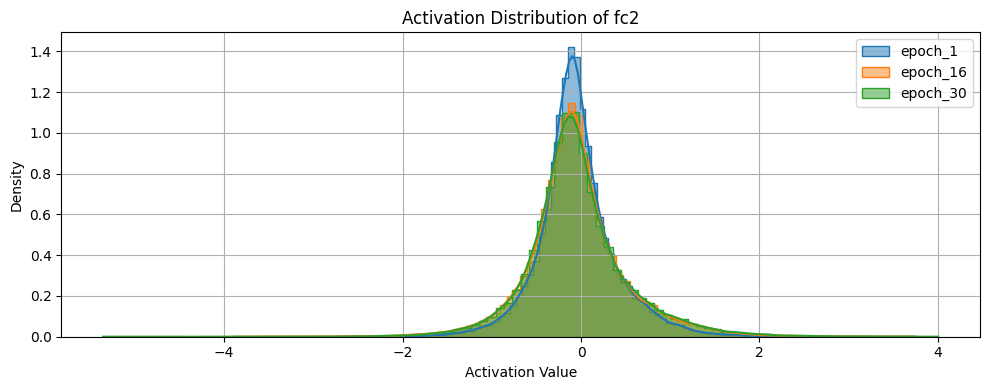

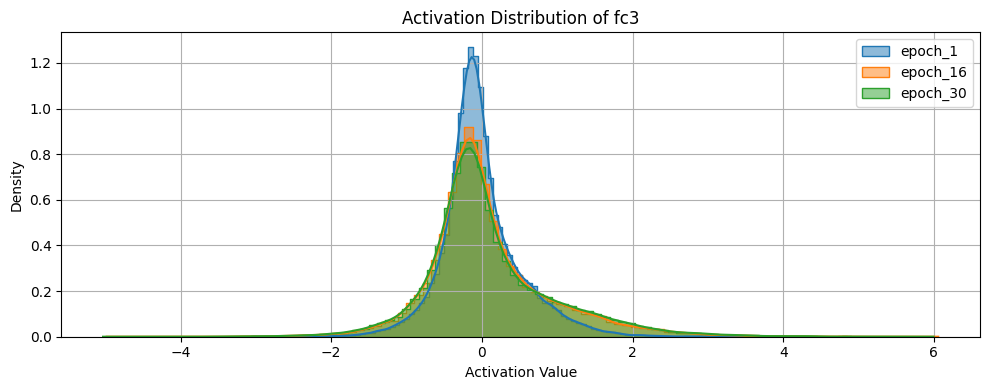

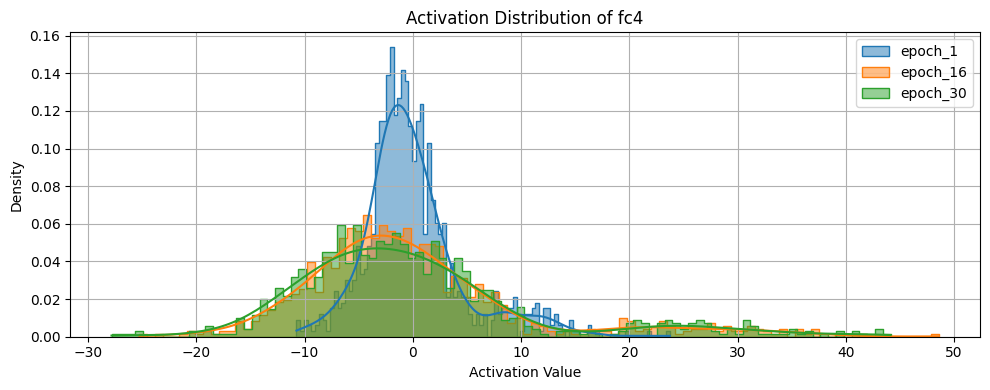

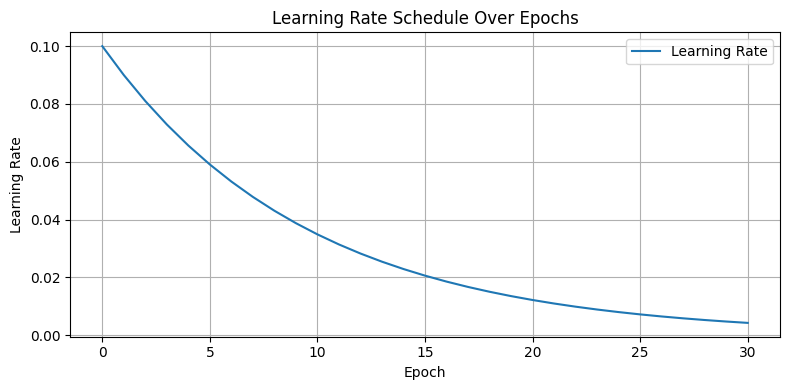

In [82]:
# 실험 C-2-1 결과 시각화 (정확도, 손실)
# 학습 및 검증 데이터셋에서의 정확도와 손실 값이 Epoch마다 어떻게 변화하는지 시각화하여 보여줌
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(accuracy_history)
plt.title('Accuracy graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

plt.plot(loss_history)
plt.title('Loss graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(gradients['fc1'], label='fc1 grad norm')
plt.plot(gradients['fc2'], label='fc2 grad norm')
plt.plot(gradients['fc3'], label='fc3 grad norm')
plt.plot(gradients['fc4'], label='fc4 grad norm')
plt.title("Gradient per Epoch (CrossEntropy)")
plt.xlabel("Epochs")
plt.ylabel("Gradient")
plt.legend()
plt.grid()
plt.show()

def plot_activation_distributions(snapshot_dict, layers=['fc1', 'fc2', 'fc3', 'fc4']):
    for layer in layers:
        plt.figure(figsize=(10, 4))
        for epoch_label, layer_acts in snapshot_dict.items():
            sns.histplot(layer_acts[layer], bins=100, kde=True, stat='density', label=epoch_label, element="step")
        plt.title(f'Activation Distribution of {layer}')
        plt.xlabel('Activation Value')
        plt.ylabel('Density')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

plot_activation_distributions(activation_snapshot)

plt.figure(figsize=(8, 4))
plt.plot(lr_history, label="Learning Rate")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Learning Rate Schedule Over Epochs")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## 실험 C-2-2. 학습률: 0.01, 스케줄러 O

In [83]:
learning_rate = 0.01  # 학습률

In [84]:
# 실험 C-2-2 MLP 모델 정의
class C22(nn.Module):
    def __init__(self, input_size, hidden1, hidden2, hidden3, num_classes):
        super(C22, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1)
        self.leakyRelu1 = nn.LeakyReLU()
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.leakyRelu2 = nn.LeakyReLU()
        self.fc3 = nn.Linear(hidden2, hidden3)
        self.leakyRelu3 = nn.LeakyReLU()
        self.fc4 = nn.Linear(hidden3, num_classes)

        self.act1 = None
        self.act2 = None

    def forward(self, x):
        x = self.fc1(x)
        x = self.leakyRelu1(x)
        self.act1 = x.detach()
        x = self.fc2(x)
        x = self.leakyRelu2(x)
        self.act2 = x.detach()
        x = self.fc3(x)
        x = self.leakyRelu3(x)
        x = self.fc4(x)
        return x

# 모델 및 최적화 알고리즘 설정
# 모델을 GPU로 이동(.to(device))시켜 빠르게 학습할 수 있도록 함.
modelC_22 = C22(input_size, hidden_size1, hidden_size2, hidden_size3, num_classes).to(device)

# 손실함수 및 옵티마이저 설정
loss_function = nn.CrossEntropyLoss()  # 내부적으로 log(softmax()) 계산을 포함하고 있음.
optimizer = optim.SGD(modelC_22.parameters(), lr=learning_rate, momentum=0.9)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

In [85]:
# 시각화를 위해 필요한 accuracy, loss, gradient, activation 값들을 저장하기 위한 변수 정의
accuracy_history = []
loss_history = []
gradients = {
    'fc1': [],
    'fc2': [],
    'fc3': [],
    'fc4': []
}

activation_history = {}
activation_snapshot = {}
lr_history = []

# hook 함수 정의
def get_activation(name):
    def hook(model, input, output):
        activation_history[name] = output.detach().cpu().view(-1).numpy()
    return hook

# hook 등록
modelC_22.fc1.register_forward_hook(get_activation('fc1'))
modelC_22.fc2.register_forward_hook(get_activation('fc2'))
modelC_22.fc3.register_forward_hook(get_activation('fc3'))
modelC_22.fc4.register_forward_hook(get_activation('fc4'))

In [86]:
# 모델 학습
lr_history.append(optimizer.param_groups[0]['lr'])

for epoch in range(num_epochs):
    modelC_22.train()
    total_loss = 0
    for images, labels in train_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # 순전파
        outputs = modelC_22(images)
        loss = loss_function(outputs, labels)

        # 역전파 및 최적화 : 역전파(backpropagation)를 통해 모델의 가중치를 업데이트
        optimizer.zero_grad()  # 이전 기울기 초기화
        loss.backward()        # 역전파를 통한 기울기 계산
        optimizer.step()       # 가중치 업데이트

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader) # 평균 손실을 계산하여 학습 상황을 확인함.

    # Epoch마다 각 Layer별 Gradient 추적
    with torch.no_grad():
        gradients['fc1'].append(modelC_22.fc1.weight.grad.norm().item())
        gradients['fc2'].append(modelC_22.fc2.weight.grad.norm().item())
        gradients['fc3'].append(modelC_22.fc3.weight.grad.norm().item())
        gradients['fc4'].append(modelC_22.fc4.weight.grad.norm().item())

    # 학습이 완료된 모델의 성능(정확도)을 평가
    # 검증 데이터셋에서 평가 : 매 epoch이 끝난 후 테스트 데이터를 통해 정확도를 측정
    modelC_22.eval()
    correct = 0 # correct: 정확히 맞춘 데이터 개수
    total = 0 # total: 전체 데이터 개수

    if epoch in [0, num_epochs // 2, num_epochs - 1]:
        epoch_label = f"epoch_{epoch+1}"
        activation_snapshot[epoch_label] = activation_history.copy()

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.reshape(-1, 28*28).to(device) # MNIST 데이터의 이미지 크기(28×28)를 1차원 형태로 펼쳐 모델 입력 형태에 맞춤.
            labels = labels.to(device)
            outputs = modelC_22(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total

    accuracy_history.append(accuracy)
    loss_history.append(avg_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Validation Accuracy: {accuracy:.2f}%')
    scheduler.step()
    lr_history.append(scheduler.get_last_lr()[0])  # ExponentialLR은 리스트로 반환하므로 [0]으로 접근

# 최종 평가 : 최종 epoch이 끝난 후의 테스트 데이터 정확도를 출력함.
print(f'최종 테스트 정확률: {accuracy:.2f}%')

Epoch [1/30], Loss: 0.8681, Validation Accuracy: 91.53%
Epoch [2/30], Loss: 0.2397, Validation Accuracy: 94.49%
Epoch [3/30], Loss: 0.1646, Validation Accuracy: 95.65%
Epoch [4/30], Loss: 0.1251, Validation Accuracy: 96.31%
Epoch [5/30], Loss: 0.1010, Validation Accuracy: 96.92%
Epoch [6/30], Loss: 0.0828, Validation Accuracy: 96.90%
Epoch [7/30], Loss: 0.0713, Validation Accuracy: 97.35%
Epoch [8/30], Loss: 0.0615, Validation Accuracy: 97.56%
Epoch [9/30], Loss: 0.0539, Validation Accuracy: 97.74%
Epoch [10/30], Loss: 0.0480, Validation Accuracy: 97.70%
Epoch [11/30], Loss: 0.0429, Validation Accuracy: 97.72%
Epoch [12/30], Loss: 0.0381, Validation Accuracy: 97.88%
Epoch [13/30], Loss: 0.0347, Validation Accuracy: 97.85%
Epoch [14/30], Loss: 0.0319, Validation Accuracy: 97.89%
Epoch [15/30], Loss: 0.0296, Validation Accuracy: 97.86%
Epoch [16/30], Loss: 0.0275, Validation Accuracy: 97.98%
Epoch [17/30], Loss: 0.0258, Validation Accuracy: 97.98%
Epoch [18/30], Loss: 0.0242, Validation 

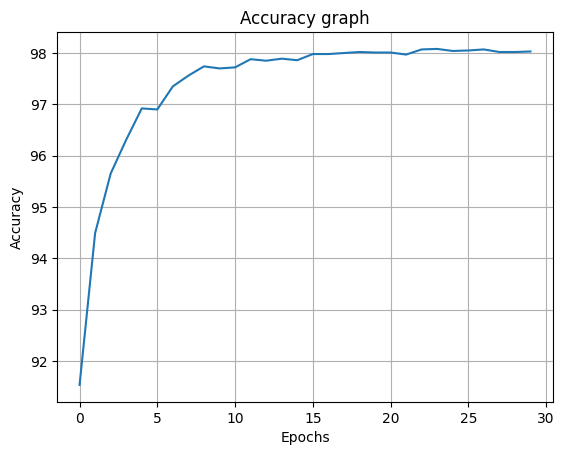

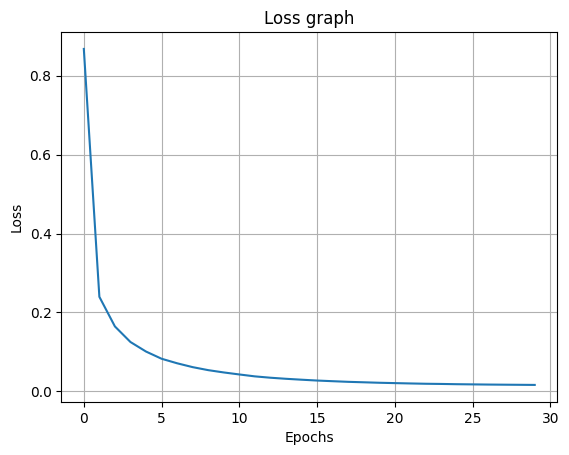

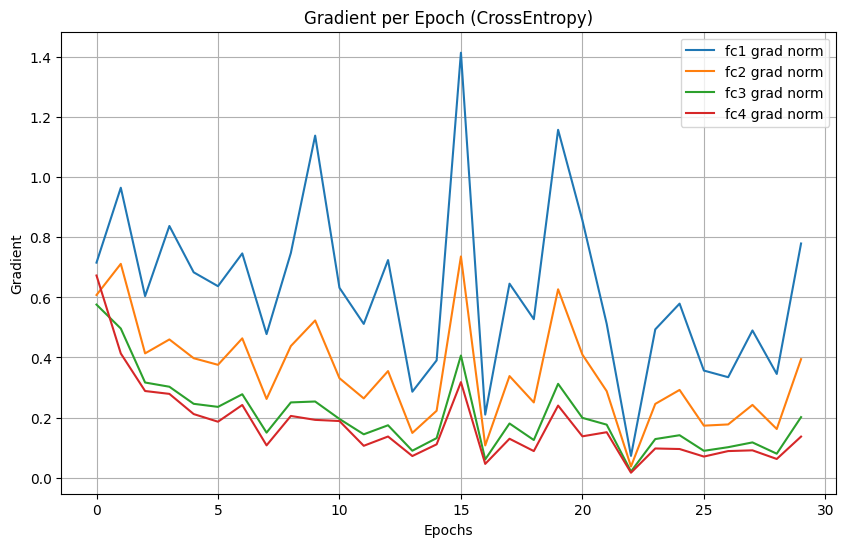

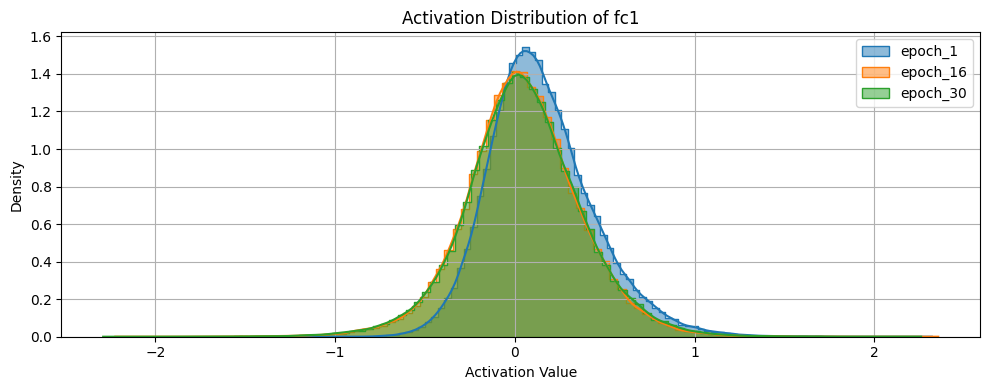

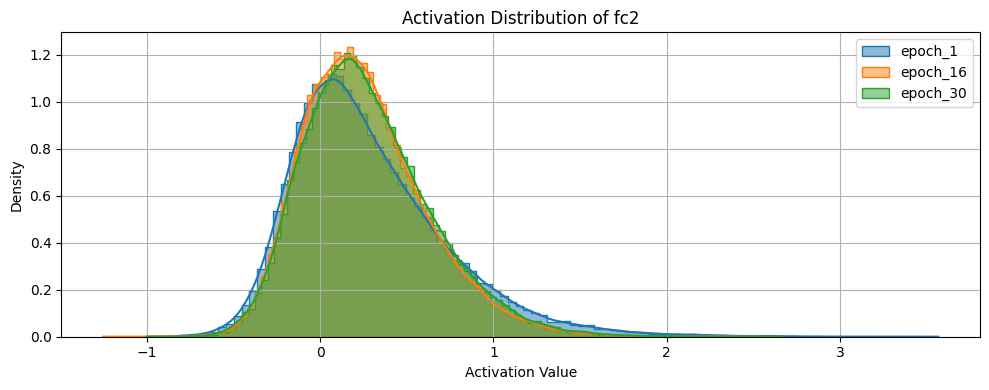

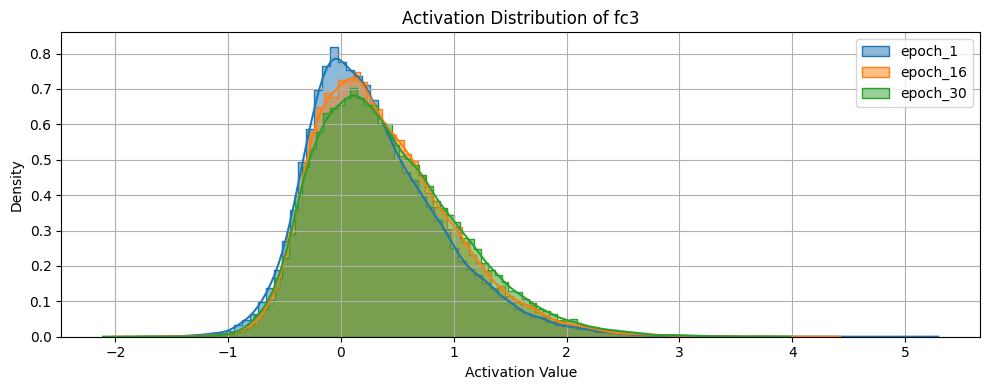

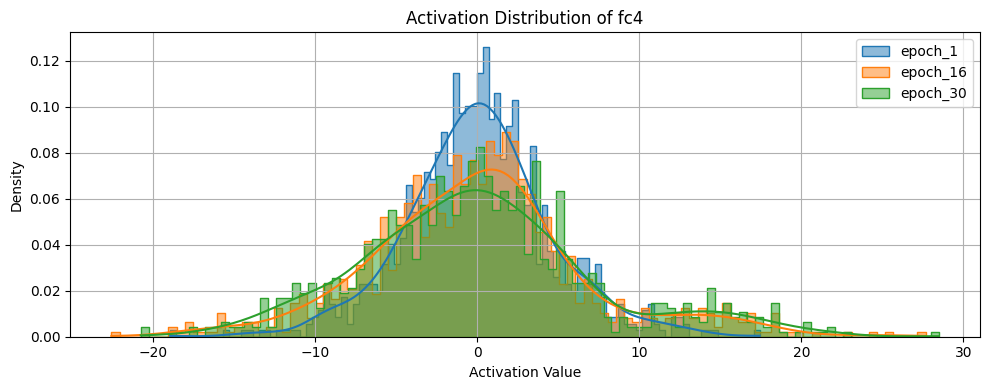

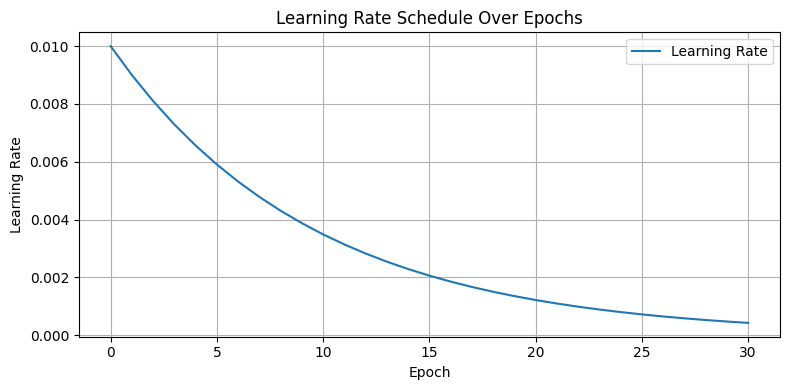

In [87]:
# 실험 C-2-2 결과 시각화 (정확도, 손실)
# 학습 및 검증 데이터셋에서의 정확도와 손실 값이 Epoch마다 어떻게 변화하는지 시각화하여 보여줌
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(accuracy_history)
plt.title('Accuracy graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

plt.plot(loss_history)
plt.title('Loss graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(gradients['fc1'], label='fc1 grad norm')
plt.plot(gradients['fc2'], label='fc2 grad norm')
plt.plot(gradients['fc3'], label='fc3 grad norm')
plt.plot(gradients['fc4'], label='fc4 grad norm')
plt.title("Gradient per Epoch (CrossEntropy)")
plt.xlabel("Epochs")
plt.ylabel("Gradient")
plt.legend()
plt.grid()
plt.show()

def plot_activation_distributions(snapshot_dict, layers=['fc1', 'fc2', 'fc3', 'fc4']):
    for layer in layers:
        plt.figure(figsize=(10, 4))
        for epoch_label, layer_acts in snapshot_dict.items():
            sns.histplot(layer_acts[layer], bins=100, kde=True, stat='density', label=epoch_label, element="step")
        plt.title(f'Activation Distribution of {layer}')
        plt.xlabel('Activation Value')
        plt.ylabel('Density')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

plot_activation_distributions(activation_snapshot)

plt.figure(figsize=(8, 4))
plt.plot(lr_history, label="Learning Rate")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Learning Rate Schedule Over Epochs")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## 실험 C-2-3. 학습률: 0.001, 스케줄러 O

In [88]:
learning_rate = 0.001  # 학습률

In [89]:
# 실험 C-2-3 MLP 모델 정의
class C23(nn.Module):
    def __init__(self, input_size, hidden1, hidden2, hidden3, num_classes):
        super(C23, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1)
        self.leakyRelu1 = nn.LeakyReLU()
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.leakyRelu2 = nn.LeakyReLU()
        self.fc3 = nn.Linear(hidden2, hidden3)
        self.leakyRelu3 = nn.LeakyReLU()
        self.fc4 = nn.Linear(hidden3, num_classes)

        self.act1 = None
        self.act2 = None

    def forward(self, x):
        x = self.fc1(x)
        x = self.leakyRelu1(x)
        self.act1 = x.detach()
        x = self.fc2(x)
        x = self.leakyRelu2(x)
        self.act2 = x.detach()
        x = self.fc3(x)
        x = self.leakyRelu3(x)
        x = self.fc4(x)
        return x

# 모델 및 최적화 알고리즘 설정
# 모델을 GPU로 이동(.to(device))시켜 빠르게 학습할 수 있도록 함.
modelC_23 = C23(input_size, hidden_size1, hidden_size2, hidden_size3, num_classes).to(device)

# 손실함수 및 옵티마이저 설정
loss_function = nn.CrossEntropyLoss()  # 내부적으로 log(softmax()) 계산을 포함하고 있음.
optimizer = optim.SGD(modelC_23.parameters(), lr=learning_rate, momentum=0.9)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

In [90]:
# 시각화를 위해 필요한 accuracy, loss, gradient, activation 값들을 저장하기 위한 변수 정의
accuracy_history = []
loss_history = []
gradients = {
    'fc1': [],
    'fc2': [],
    'fc3': [],
    'fc4': []
}

activation_history = {}
activation_snapshot = {}
lr_history = []

# hook 함수 정의
def get_activation(name):
    def hook(model, input, output):
        activation_history[name] = output.detach().cpu().view(-1).numpy()
    return hook

# hook 등록
modelC_23.fc1.register_forward_hook(get_activation('fc1'))
modelC_23.fc2.register_forward_hook(get_activation('fc2'))
modelC_23.fc3.register_forward_hook(get_activation('fc3'))
modelC_23.fc4.register_forward_hook(get_activation('fc4'))

In [91]:
# 모델 학습
lr_history.append(optimizer.param_groups[0]['lr'])

for epoch in range(num_epochs):
    modelC_23.train()
    total_loss = 0
    for images, labels in train_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # 순전파
        outputs = modelC_23(images)
        loss = loss_function(outputs, labels)

        # 역전파 및 최적화 : 역전파(backpropagation)를 통해 모델의 가중치를 업데이트
        optimizer.zero_grad()  # 이전 기울기 초기화
        loss.backward()        # 역전파를 통한 기울기 계산
        optimizer.step()       # 가중치 업데이트

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader) # 평균 손실을 계산하여 학습 상황을 확인함.

    # Epoch마다 각 Layer별 Gradient 추적
    with torch.no_grad():
        gradients['fc1'].append(modelC_23.fc1.weight.grad.norm().item())
        gradients['fc2'].append(modelC_23.fc2.weight.grad.norm().item())
        gradients['fc3'].append(modelC_23.fc3.weight.grad.norm().item())
        gradients['fc4'].append(modelC_23.fc4.weight.grad.norm().item())

    # 학습이 완료된 모델의 성능(정확도)을 평가
    # 검증 데이터셋에서 평가 : 매 epoch이 끝난 후 테스트 데이터를 통해 정확도를 측정
    modelC_23.eval()
    correct = 0 # correct: 정확히 맞춘 데이터 개수
    total = 0 # total: 전체 데이터 개수

    if epoch in [0, num_epochs // 2, num_epochs - 1]:
        epoch_label = f"epoch_{epoch+1}"
        activation_snapshot[epoch_label] = activation_history.copy()

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.reshape(-1, 28*28).to(device) # MNIST 데이터의 이미지 크기(28×28)를 1차원 형태로 펼쳐 모델 입력 형태에 맞춤.
            labels = labels.to(device)
            outputs = modelC_23(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total

    accuracy_history.append(accuracy)
    loss_history.append(avg_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Validation Accuracy: {accuracy:.2f}%')
    scheduler.step()
    lr_history.append(scheduler.get_last_lr()[0])  # ExponentialLR은 리스트로 반환하므로 [0]으로 접근

# 최종 평가 : 최종 epoch이 끝난 후의 테스트 데이터 정확도를 출력함.
print(f'최종 테스트 정확률: {accuracy:.2f}%')

Epoch [1/30], Loss: 2.2693, Validation Accuracy: 54.51%
Epoch [2/30], Loss: 1.9468, Validation Accuracy: 68.51%
Epoch [3/30], Loss: 0.9648, Validation Accuracy: 81.29%
Epoch [4/30], Loss: 0.6039, Validation Accuracy: 85.72%
Epoch [5/30], Loss: 0.4853, Validation Accuracy: 87.72%
Epoch [6/30], Loss: 0.4278, Validation Accuracy: 88.50%
Epoch [7/30], Loss: 0.3948, Validation Accuracy: 89.43%
Epoch [8/30], Loss: 0.3728, Validation Accuracy: 89.78%
Epoch [9/30], Loss: 0.3567, Validation Accuracy: 90.19%
Epoch [10/30], Loss: 0.3448, Validation Accuracy: 90.34%
Epoch [11/30], Loss: 0.3350, Validation Accuracy: 90.52%
Epoch [12/30], Loss: 0.3271, Validation Accuracy: 90.94%
Epoch [13/30], Loss: 0.3202, Validation Accuracy: 90.94%
Epoch [14/30], Loss: 0.3146, Validation Accuracy: 91.17%
Epoch [15/30], Loss: 0.3097, Validation Accuracy: 91.37%
Epoch [16/30], Loss: 0.3056, Validation Accuracy: 91.43%
Epoch [17/30], Loss: 0.3019, Validation Accuracy: 91.44%
Epoch [18/30], Loss: 0.2986, Validation 

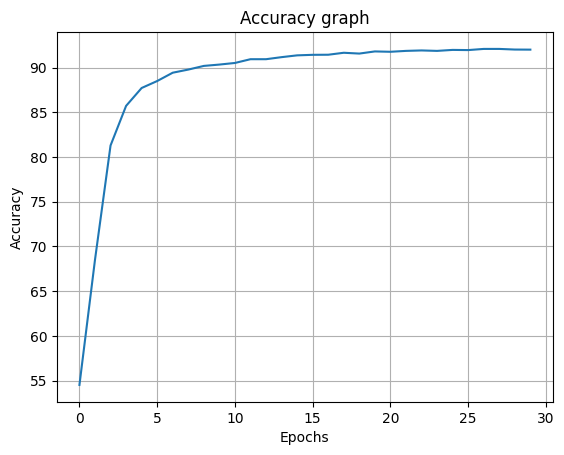

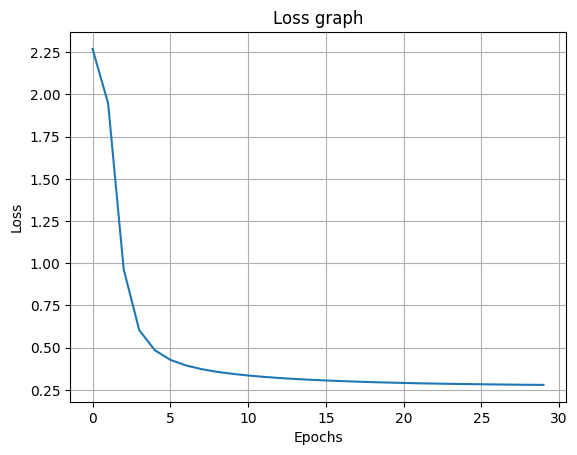

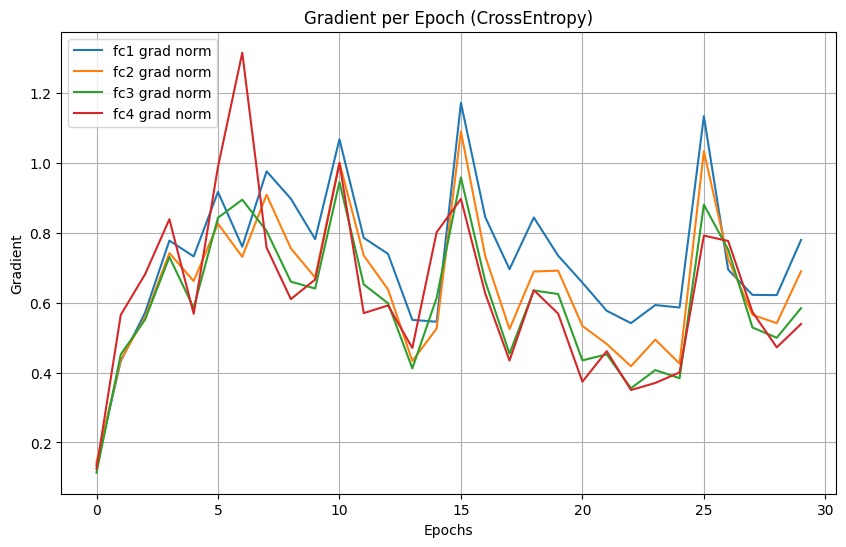

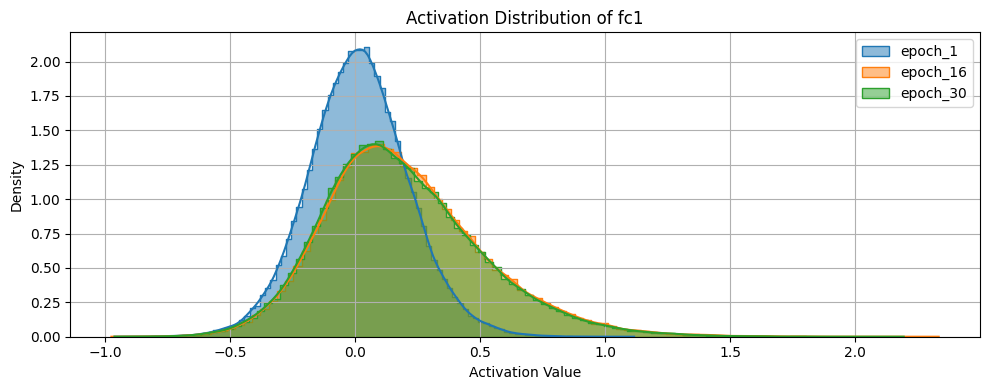

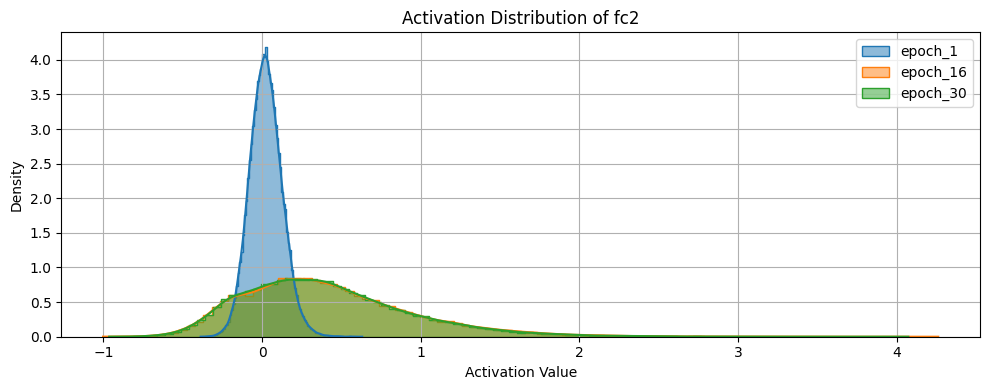

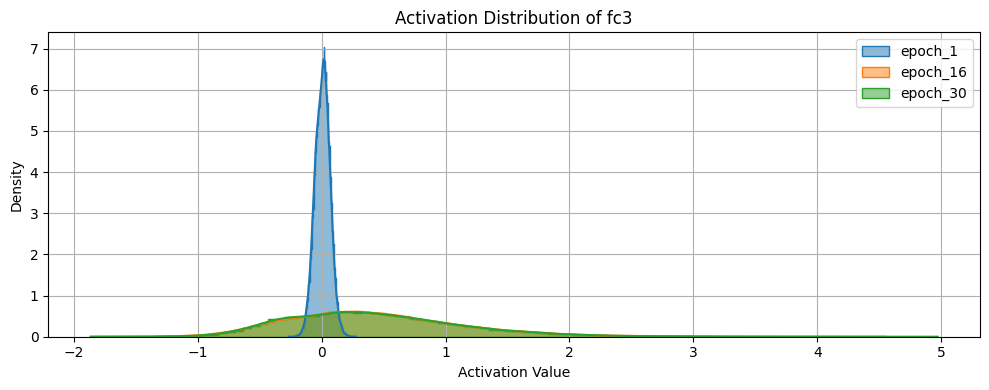

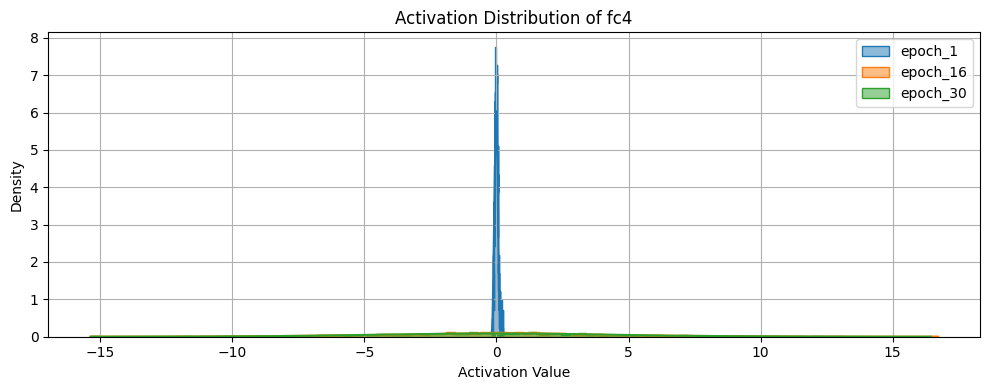

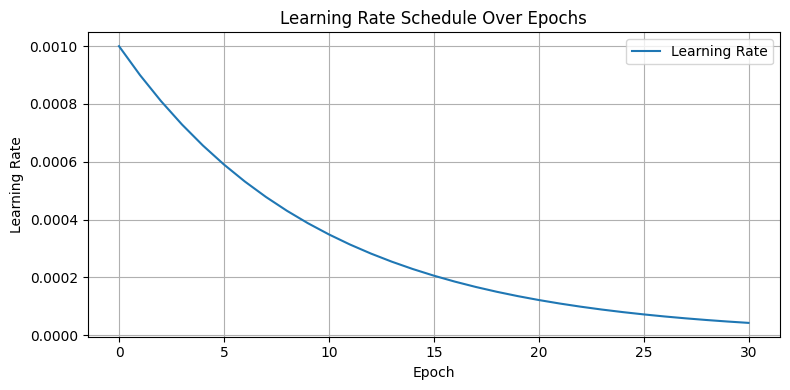

In [92]:
# 실험 C-2-3 결과 시각화 (정확도, 손실)
# 학습 및 검증 데이터셋에서의 정확도와 손실 값이 Epoch마다 어떻게 변화하는지 시각화하여 보여줌
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(accuracy_history)
plt.title('Accuracy graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

plt.plot(loss_history)
plt.title('Loss graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(gradients['fc1'], label='fc1 grad norm')
plt.plot(gradients['fc2'], label='fc2 grad norm')
plt.plot(gradients['fc3'], label='fc3 grad norm')
plt.plot(gradients['fc4'], label='fc4 grad norm')
plt.title("Gradient per Epoch (CrossEntropy)")
plt.xlabel("Epochs")
plt.ylabel("Gradient")
plt.legend()
plt.grid()
plt.show()

def plot_activation_distributions(snapshot_dict, layers=['fc1', 'fc2', 'fc3', 'fc4']):
    for layer in layers:
        plt.figure(figsize=(10, 4))
        for epoch_label, layer_acts in snapshot_dict.items():
            sns.histplot(layer_acts[layer], bins=100, kde=True, stat='density', label=epoch_label, element="step")
        plt.title(f'Activation Distribution of {layer}')
        plt.xlabel('Activation Value')
        plt.ylabel('Density')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

plot_activation_distributions(activation_snapshot)

plt.figure(figsize=(8, 4))
plt.plot(lr_history, label="Learning Rate")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Learning Rate Schedule Over Epochs")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 실험 C-3. 최적화 알고리즘: Adam

## 실험 C-3-1. 학습률: 0.1, 스케줄러 O

In [93]:
learning_rate = 0.1  # 학습률

In [94]:
# 실험 C-3-1 MLP 모델 정의
class C31(nn.Module):
    def __init__(self, input_size, hidden1, hidden2, hidden3, num_classes):
        super(C31, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1)
        self.leakyRelu1 = nn.LeakyReLU()
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.leakyRelu2 = nn.LeakyReLU()
        self.fc3 = nn.Linear(hidden2, hidden3)
        self.leakyRelu3 = nn.LeakyReLU()
        self.fc4 = nn.Linear(hidden3, num_classes)

        self.act1 = None
        self.act2 = None

    def forward(self, x):
        x = self.fc1(x)
        x = self.leakyRelu1(x)
        self.act1 = x.detach()
        x = self.fc2(x)
        x = self.leakyRelu2(x)
        self.act2 = x.detach()
        x = self.fc3(x)
        x = self.leakyRelu3(x)
        x = self.fc4(x)
        return x

# 모델 및 최적화 알고리즘 설정
# 모델을 GPU로 이동(.to(device))시켜 빠르게 학습할 수 있도록 함.
modelC_31 = C31(input_size, hidden_size1, hidden_size2, hidden_size3, num_classes).to(device)

# 손실함수 및 옵티마이저 설정
loss_function = nn.CrossEntropyLoss()  # 내부적으로 log(softmax()) 계산을 포함하고 있음.
optimizer = optim.Adam(modelC_31.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

In [95]:
# 시각화를 위해 필요한 accuracy, loss, gradient, activation 값들을 저장하기 위한 변수 정의
accuracy_history = []
loss_history = []
gradients = {
    'fc1': [],
    'fc2': [],
    'fc3': [],
    'fc4': []
}

activation_history = {}
activation_snapshot = {}
lr_history = []

# hook 함수 정의
def get_activation(name):
    def hook(model, input, output):
        activation_history[name] = output.detach().cpu().view(-1).numpy()
    return hook

# hook 등록
modelC_31.fc1.register_forward_hook(get_activation('fc1'))
modelC_31.fc2.register_forward_hook(get_activation('fc2'))
modelC_31.fc3.register_forward_hook(get_activation('fc3'))
modelC_31.fc4.register_forward_hook(get_activation('fc4'))

In [96]:
# 모델 학습
lr_history.append(optimizer.param_groups[0]['lr'])

for epoch in range(num_epochs):
    modelC_31.train()
    total_loss = 0
    for images, labels in train_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # 순전파
        outputs = modelC_31(images)
        loss = loss_function(outputs, labels)

        # 역전파 및 최적화 : 역전파(backpropagation)를 통해 모델의 가중치를 업데이트
        optimizer.zero_grad()  # 이전 기울기 초기화
        loss.backward()        # 역전파를 통한 기울기 계산
        optimizer.step()       # 가중치 업데이트

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader) # 평균 손실을 계산하여 학습 상황을 확인함.

    # Epoch마다 각 Layer별 Gradient 추적
    with torch.no_grad():
        gradients['fc1'].append(modelC_31.fc1.weight.grad.norm().item())
        gradients['fc2'].append(modelC_31.fc2.weight.grad.norm().item())
        gradients['fc3'].append(modelC_31.fc3.weight.grad.norm().item())
        gradients['fc4'].append(modelC_31.fc4.weight.grad.norm().item())

    # 학습이 완료된 모델의 성능(정확도)을 평가
    # 검증 데이터셋에서 평가 : 매 epoch이 끝난 후 테스트 데이터를 통해 정확도를 측정
    modelC_31.eval()
    correct = 0 # correct: 정확히 맞춘 데이터 개수
    total = 0 # total: 전체 데이터 개수

    if epoch in [0, num_epochs // 2, num_epochs - 1]:
        epoch_label = f"epoch_{epoch+1}"
        activation_snapshot[epoch_label] = activation_history.copy()

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.reshape(-1, 28*28).to(device) # MNIST 데이터의 이미지 크기(28×28)를 1차원 형태로 펼쳐 모델 입력 형태에 맞춤.
            labels = labels.to(device)
            outputs = modelC_31(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total

    accuracy_history.append(accuracy)
    loss_history.append(avg_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Validation Accuracy: {accuracy:.2f}%')
    scheduler.step()
    lr_history.append(scheduler.get_last_lr()[0])  # ExponentialLR은 리스트로 반환하므로 [0]으로 접근

# 최종 평가 : 최종 epoch이 끝난 후의 테스트 데이터 정확도를 출력함.
print(f'최종 테스트 정확률: {accuracy:.2f}%')

Epoch [1/30], Loss: 693.5455, Validation Accuracy: 83.19%
Epoch [2/30], Loss: 8.5414, Validation Accuracy: 78.61%
Epoch [3/30], Loss: 5.1767, Validation Accuracy: 88.47%
Epoch [4/30], Loss: 4.9105, Validation Accuracy: 91.14%
Epoch [5/30], Loss: 4.5749, Validation Accuracy: 91.65%
Epoch [6/30], Loss: 3.5701, Validation Accuracy: 89.61%
Epoch [7/30], Loss: 897.3472, Validation Accuracy: 80.34%
Epoch [8/30], Loss: 55.8352, Validation Accuracy: 90.99%
Epoch [9/30], Loss: 17.7445, Validation Accuracy: 92.07%
Epoch [10/30], Loss: 14.7575, Validation Accuracy: 92.36%
Epoch [11/30], Loss: 9.4709, Validation Accuracy: 91.92%
Epoch [12/30], Loss: 8.1094, Validation Accuracy: 92.89%
Epoch [13/30], Loss: 7.5670, Validation Accuracy: 92.34%
Epoch [14/30], Loss: 8.0107, Validation Accuracy: 95.03%
Epoch [15/30], Loss: 5.7578, Validation Accuracy: 90.59%
Epoch [16/30], Loss: 4.7888, Validation Accuracy: 94.86%
Epoch [17/30], Loss: 3.7354, Validation Accuracy: 93.56%
Epoch [18/30], Loss: 4.1401, Vali

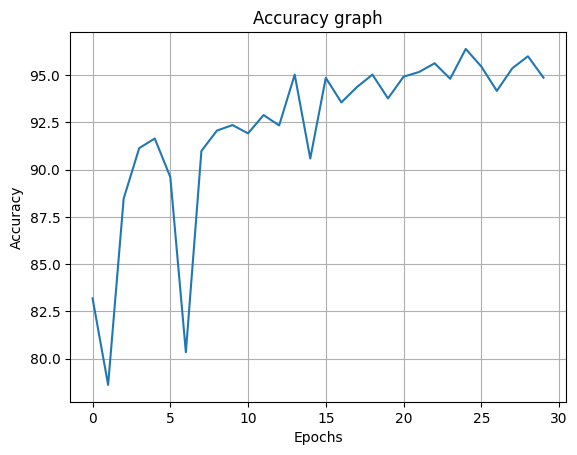

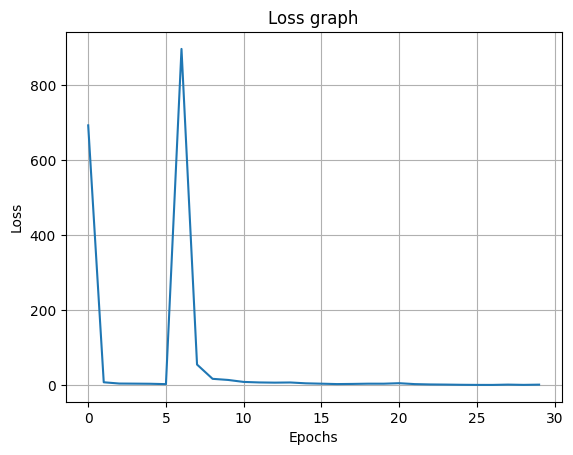

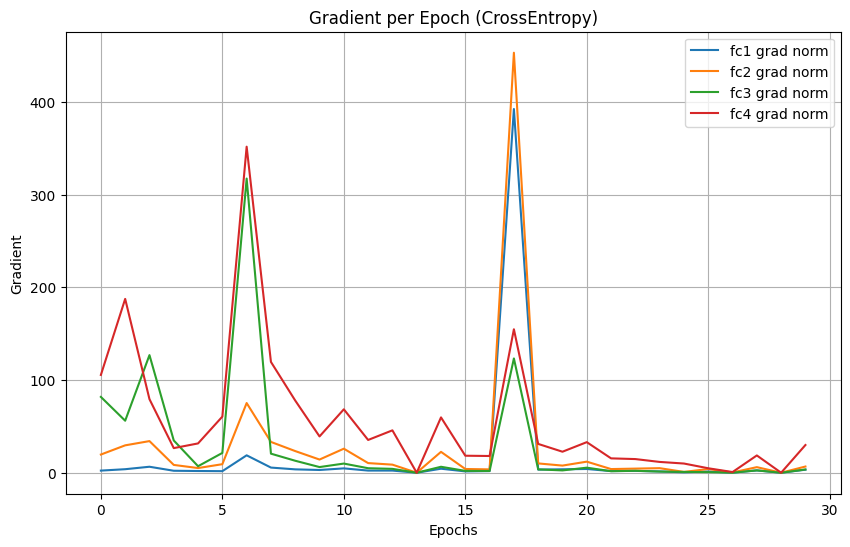

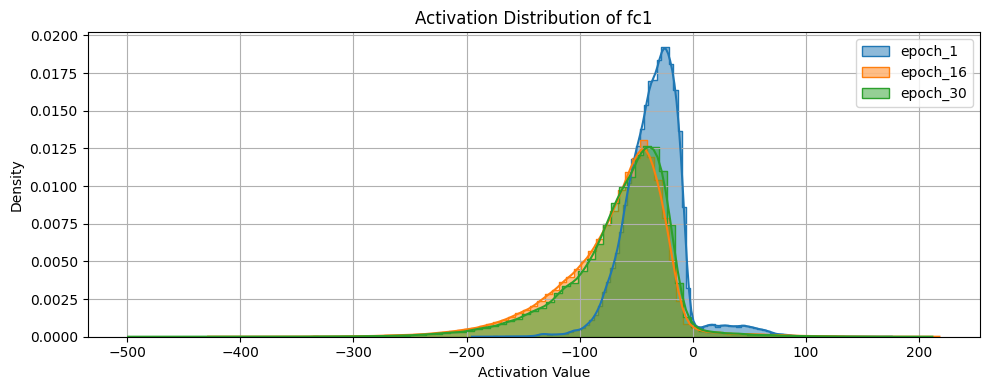

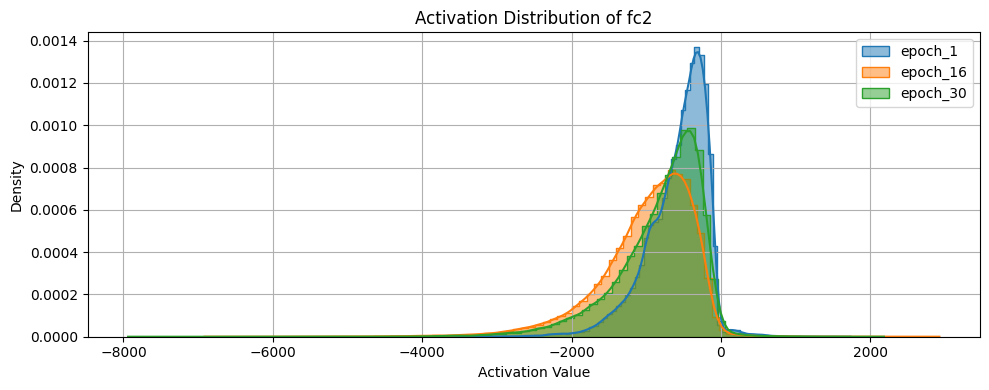

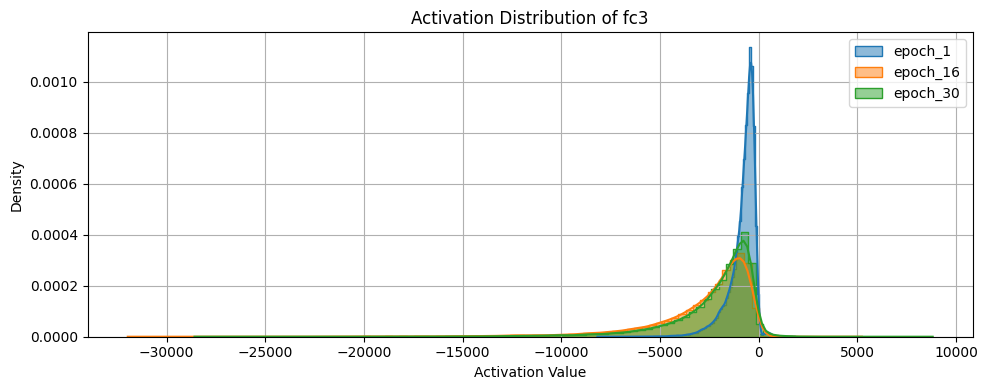

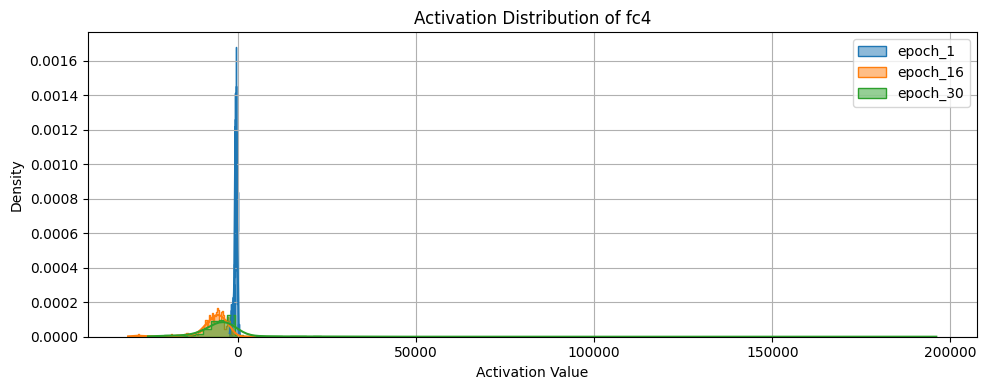

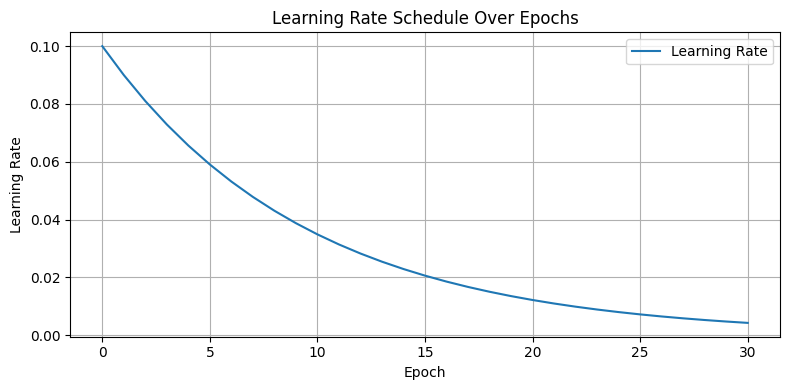

In [97]:
# 실험 C-3-1 결과 시각화 (정확도, 손실)
# 학습 및 검증 데이터셋에서의 정확도와 손실 값이 Epoch마다 어떻게 변화하는지 시각화하여 보여줌
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(accuracy_history)
plt.title('Accuracy graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

plt.plot(loss_history)
plt.title('Loss graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(gradients['fc1'], label='fc1 grad norm')
plt.plot(gradients['fc2'], label='fc2 grad norm')
plt.plot(gradients['fc3'], label='fc3 grad norm')
plt.plot(gradients['fc4'], label='fc4 grad norm')
plt.title("Gradient per Epoch (CrossEntropy)")
plt.xlabel("Epochs")
plt.ylabel("Gradient")
plt.legend()
plt.grid()
plt.show()

def plot_activation_distributions(snapshot_dict, layers=['fc1', 'fc2', 'fc3', 'fc4']):
    for layer in layers:
        plt.figure(figsize=(10, 4))
        for epoch_label, layer_acts in snapshot_dict.items():
            sns.histplot(layer_acts[layer], bins=100, kde=True, stat='density', label=epoch_label, element="step")
        plt.title(f'Activation Distribution of {layer}')
        plt.xlabel('Activation Value')
        plt.ylabel('Density')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

plot_activation_distributions(activation_snapshot)

plt.figure(figsize=(8, 4))
plt.plot(lr_history, label="Learning Rate")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Learning Rate Schedule Over Epochs")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## 실험 C-3-2. 학습률: 0.01, 스케줄러 O

In [98]:
learning_rate = 0.01  # 학습률

In [99]:
# 실험 C-3-2 MLP 모델 정의
class C32(nn.Module):
    def __init__(self, input_size, hidden1, hidden2, hidden3, num_classes):
        super(C32, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1)
        self.leakyRelu1 = nn.LeakyReLU()
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.leakyRelu2 = nn.LeakyReLU()
        self.fc3 = nn.Linear(hidden2, hidden3)
        self.leakyRelu3 = nn.LeakyReLU()
        self.fc4 = nn.Linear(hidden3, num_classes)

        self.act1 = None
        self.act2 = None

    def forward(self, x):
        x = self.fc1(x)
        x = self.leakyRelu1(x)
        self.act1 = x.detach()
        x = self.fc2(x)
        x = self.leakyRelu2(x)
        self.act2 = x.detach()
        x = self.fc3(x)
        x = self.leakyRelu3(x)
        x = self.fc4(x)
        return x

# 모델 및 최적화 알고리즘 설정
# 모델을 GPU로 이동(.to(device))시켜 빠르게 학습할 수 있도록 함.
modelC_32 = C32(input_size, hidden_size1, hidden_size2, hidden_size3, num_classes).to(device)

# 손실함수 및 옵티마이저 설정
loss_function = nn.CrossEntropyLoss()  # 내부적으로 log(softmax()) 계산을 포함하고 있음.
optimizer = optim.Adam(modelC_32.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

In [100]:
# 시각화를 위해 필요한 accuracy, loss, gradient, activation 값들을 저장하기 위한 변수 정의
accuracy_history = []
loss_history = []
gradients = {
    'fc1': [],
    'fc2': [],
    'fc3': [],
    'fc4': []
}

activation_history = {}
activation_snapshot = {}
lr_history = []

# hook 함수 정의
def get_activation(name):
    def hook(model, input, output):
        activation_history[name] = output.detach().cpu().view(-1).numpy()
    return hook

# hook 등록
modelC_32.fc1.register_forward_hook(get_activation('fc1'))
modelC_32.fc2.register_forward_hook(get_activation('fc2'))
modelC_32.fc3.register_forward_hook(get_activation('fc3'))
modelC_32.fc4.register_forward_hook(get_activation('fc4'))

In [101]:
# 모델 학습
lr_history.append(optimizer.param_groups[0]['lr'])

for epoch in range(num_epochs):
    modelC_32.train()
    total_loss = 0
    for images, labels in train_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # 순전파
        outputs = modelC_32(images)
        loss = loss_function(outputs, labels)

        # 역전파 및 최적화 : 역전파(backpropagation)를 통해 모델의 가중치를 업데이트
        optimizer.zero_grad()  # 이전 기울기 초기화
        loss.backward()        # 역전파를 통한 기울기 계산
        optimizer.step()       # 가중치 업데이트

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader) # 평균 손실을 계산하여 학습 상황을 확인함.

    # Epoch마다 각 Layer별 Gradient 추적
    with torch.no_grad():
        gradients['fc1'].append(modelC_32.fc1.weight.grad.norm().item())
        gradients['fc2'].append(modelC_32.fc2.weight.grad.norm().item())
        gradients['fc3'].append(modelC_32.fc3.weight.grad.norm().item())
        gradients['fc4'].append(modelC_32.fc4.weight.grad.norm().item())

    # 학습이 완료된 모델의 성능(정확도)을 평가
    # 검증 데이터셋에서 평가 : 매 epoch이 끝난 후 테스트 데이터를 통해 정확도를 측정
    modelC_32.eval()
    correct = 0 # correct: 정확히 맞춘 데이터 개수
    total = 0 # total: 전체 데이터 개수

    if epoch in [0, num_epochs // 2, num_epochs - 1]:
        epoch_label = f"epoch_{epoch+1}"
        activation_snapshot[epoch_label] = activation_history.copy()

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.reshape(-1, 28*28).to(device) # MNIST 데이터의 이미지 크기(28×28)를 1차원 형태로 펼쳐 모델 입력 형태에 맞춤.
            labels = labels.to(device)
            outputs = modelC_32(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total

    accuracy_history.append(accuracy)
    loss_history.append(avg_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Validation Accuracy: {accuracy:.2f}%')
    scheduler.step()
    lr_history.append(scheduler.get_last_lr()[0])  # ExponentialLR은 리스트로 반환하므로 [0]으로 접근

# 최종 평가 : 최종 epoch이 끝난 후의 테스트 데이터 정확도를 출력함.
print(f'최종 테스트 정확률: {accuracy:.2f}%')

Epoch [1/30], Loss: 0.3065, Validation Accuracy: 95.49%
Epoch [2/30], Loss: 0.1526, Validation Accuracy: 96.06%
Epoch [3/30], Loss: 0.1248, Validation Accuracy: 96.71%
Epoch [4/30], Loss: 0.1121, Validation Accuracy: 96.98%
Epoch [5/30], Loss: 0.0735, Validation Accuracy: 97.68%
Epoch [6/30], Loss: 0.0539, Validation Accuracy: 97.40%
Epoch [7/30], Loss: 0.0475, Validation Accuracy: 96.92%
Epoch [8/30], Loss: 0.0522, Validation Accuracy: 97.60%
Epoch [9/30], Loss: 0.0327, Validation Accuracy: 97.78%
Epoch [10/30], Loss: 0.0253, Validation Accuracy: 97.43%
Epoch [11/30], Loss: 0.0365, Validation Accuracy: 97.61%
Epoch [12/30], Loss: 0.0203, Validation Accuracy: 98.00%
Epoch [13/30], Loss: 0.0153, Validation Accuracy: 98.02%
Epoch [14/30], Loss: 0.0100, Validation Accuracy: 97.99%
Epoch [15/30], Loss: 0.0099, Validation Accuracy: 98.14%
Epoch [16/30], Loss: 0.0091, Validation Accuracy: 98.17%
Epoch [17/30], Loss: 0.0049, Validation Accuracy: 98.21%
Epoch [18/30], Loss: 0.0735, Validation 

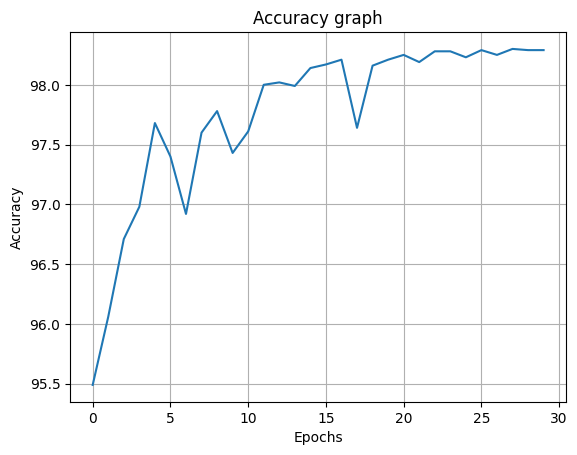

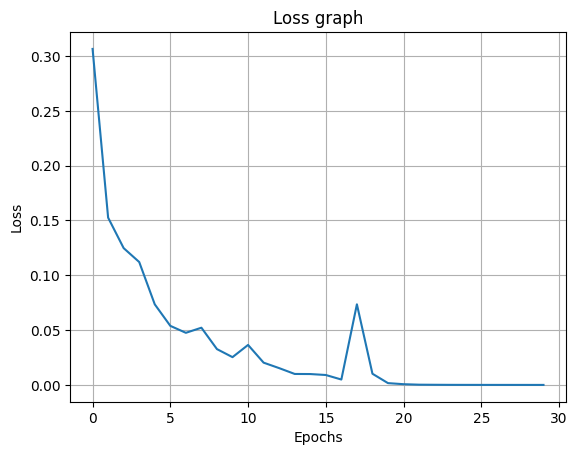

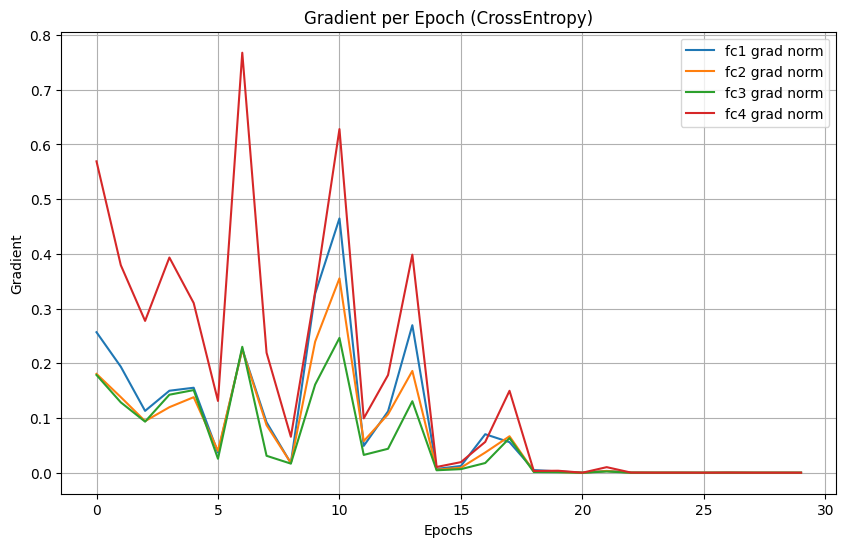

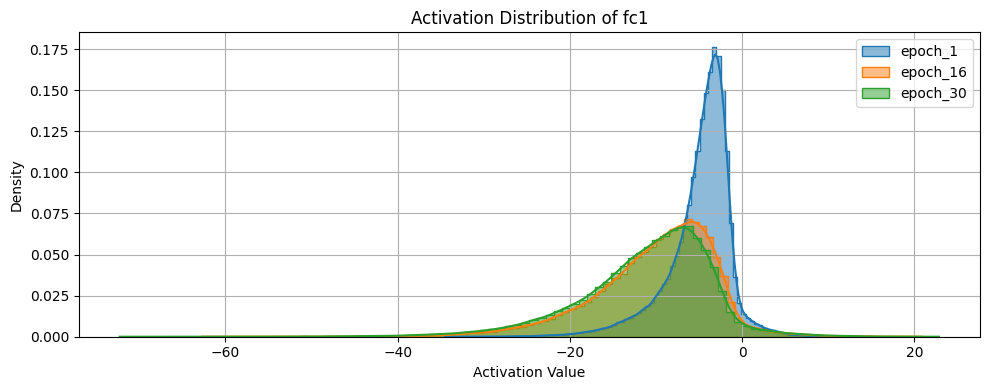

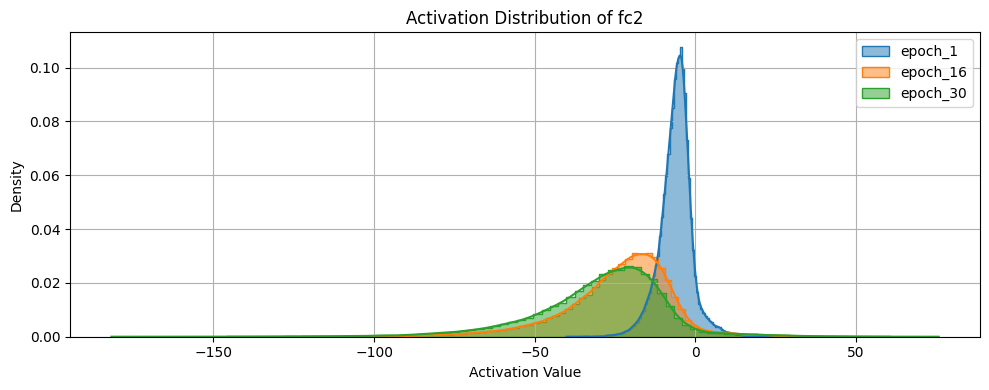

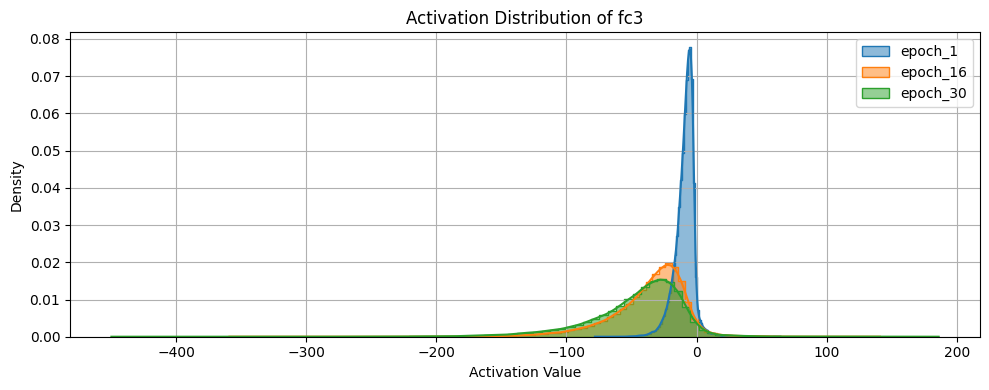

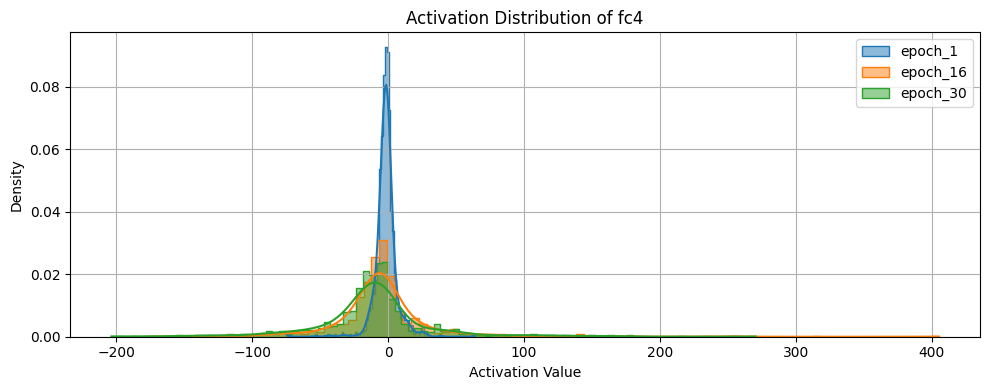

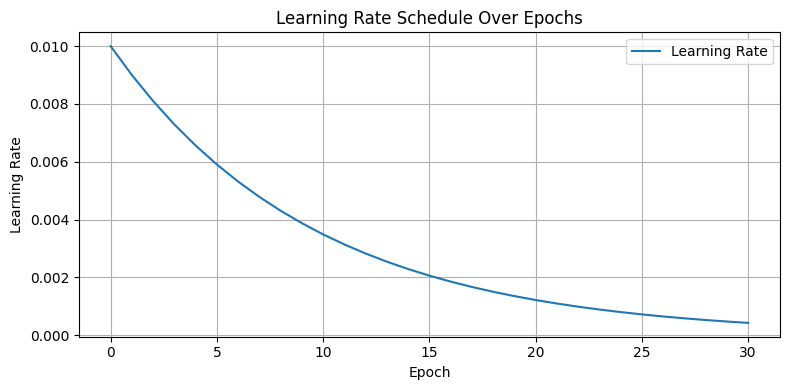

In [102]:
# 실험 C-3-2 결과 시각화 (정확도, 손실)
# 학습 및 검증 데이터셋에서의 정확도와 손실 값이 Epoch마다 어떻게 변화하는지 시각화하여 보여줌
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(accuracy_history)
plt.title('Accuracy graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

plt.plot(loss_history)
plt.title('Loss graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(gradients['fc1'], label='fc1 grad norm')
plt.plot(gradients['fc2'], label='fc2 grad norm')
plt.plot(gradients['fc3'], label='fc3 grad norm')
plt.plot(gradients['fc4'], label='fc4 grad norm')
plt.title("Gradient per Epoch (CrossEntropy)")
plt.xlabel("Epochs")
plt.ylabel("Gradient")
plt.legend()
plt.grid()
plt.show()

def plot_activation_distributions(snapshot_dict, layers=['fc1', 'fc2', 'fc3', 'fc4']):
    for layer in layers:
        plt.figure(figsize=(10, 4))
        for epoch_label, layer_acts in snapshot_dict.items():
            sns.histplot(layer_acts[layer], bins=100, kde=True, stat='density', label=epoch_label, element="step")
        plt.title(f'Activation Distribution of {layer}')
        plt.xlabel('Activation Value')
        plt.ylabel('Density')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

plot_activation_distributions(activation_snapshot)

plt.figure(figsize=(8, 4))
plt.plot(lr_history, label="Learning Rate")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Learning Rate Schedule Over Epochs")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## 실험 C-3-3. 학습률: 0.001, 스케줄러 O

In [103]:
learning_rate = 0.001  # 학습률

In [104]:
# 실험 C-3-3 MLP 모델 정의
class C33(nn.Module):
    def __init__(self, input_size, hidden1, hidden2, hidden3, num_classes):
        super(C33, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1)
        self.leakyRelu1 = nn.LeakyReLU()
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.leakyRelu2 = nn.LeakyReLU()
        self.fc3 = nn.Linear(hidden2, hidden3)
        self.leakyRelu3 = nn.LeakyReLU()
        self.fc4 = nn.Linear(hidden3, num_classes)

        self.act1 = None
        self.act2 = None

    def forward(self, x):
        x = self.fc1(x)
        x = self.leakyRelu1(x)
        self.act1 = x.detach()
        x = self.fc2(x)
        x = self.leakyRelu2(x)
        self.act2 = x.detach()
        x = self.fc3(x)
        x = self.leakyRelu3(x)
        x = self.fc4(x)
        return x

# 모델 및 최적화 알고리즘 설정
# 모델을 GPU로 이동(.to(device))시켜 빠르게 학습할 수 있도록 함.
modelC_33 = C33(input_size, hidden_size1, hidden_size2, hidden_size3, num_classes).to(device)

# 손실함수 및 옵티마이저 설정
loss_function = nn.CrossEntropyLoss()  # 내부적으로 log(softmax()) 계산을 포함하고 있음.
optimizer = optim.Adam(modelC_33.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

In [105]:
# 시각화를 위해 필요한 accuracy, loss, gradient, activation 값들을 저장하기 위한 변수 정의
accuracy_history = []
loss_history = []
gradients = {
    'fc1': [],
    'fc2': [],
    'fc3': [],
    'fc4': []
}

activation_history = {}
activation_snapshot = {}
lr_history = []

# hook 함수 정의
def get_activation(name):
    def hook(model, input, output):
        activation_history[name] = output.detach().cpu().view(-1).numpy()
    return hook

# hook 등록
modelC_33.fc1.register_forward_hook(get_activation('fc1'))
modelC_33.fc2.register_forward_hook(get_activation('fc2'))
modelC_33.fc3.register_forward_hook(get_activation('fc3'))
modelC_33.fc4.register_forward_hook(get_activation('fc4'))

In [106]:
# 모델 학습
lr_history.append(optimizer.param_groups[0]['lr'])

for epoch in range(num_epochs):
    modelC_33.train()
    total_loss = 0
    for images, labels in train_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # 순전파
        outputs = modelC_33(images)
        loss = loss_function(outputs, labels)

        # 역전파 및 최적화 : 역전파(backpropagation)를 통해 모델의 가중치를 업데이트
        optimizer.zero_grad()  # 이전 기울기 초기화
        loss.backward()        # 역전파를 통한 기울기 계산
        optimizer.step()       # 가중치 업데이트

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader) # 평균 손실을 계산하여 학습 상황을 확인함.

    # Epoch마다 각 Layer별 Gradient 추적
    with torch.no_grad():
        gradients['fc1'].append(modelC_33.fc1.weight.grad.norm().item())
        gradients['fc2'].append(modelC_33.fc2.weight.grad.norm().item())
        gradients['fc3'].append(modelC_33.fc3.weight.grad.norm().item())
        gradients['fc4'].append(modelC_33.fc4.weight.grad.norm().item())

    # 학습이 완료된 모델의 성능(정확도)을 평가
    # 검증 데이터셋에서 평가 : 매 epoch이 끝난 후 테스트 데이터를 통해 정확도를 측정
    modelC_33.eval()
    correct = 0 # correct: 정확히 맞춘 데이터 개수
    total = 0 # total: 전체 데이터 개수

    if epoch in [0, num_epochs // 2, num_epochs - 1]:
        epoch_label = f"epoch_{epoch+1}"
        activation_snapshot[epoch_label] = activation_history.copy()

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.reshape(-1, 28*28).to(device) # MNIST 데이터의 이미지 크기(28×28)를 1차원 형태로 펼쳐 모델 입력 형태에 맞춤.
            labels = labels.to(device)
            outputs = modelC_33(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total

    accuracy_history.append(accuracy)
    loss_history.append(avg_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Validation Accuracy: {accuracy:.2f}%')
    scheduler.step()
    lr_history.append(scheduler.get_last_lr()[0])  # ExponentialLR은 리스트로 반환하므로 [0]으로 접근

# 최종 평가 : 최종 epoch이 끝난 후의 테스트 데이터 정확도를 출력함.
print(f'최종 테스트 정확률: {accuracy:.2f}%')

Epoch [1/30], Loss: 0.2446, Validation Accuracy: 96.14%
Epoch [2/30], Loss: 0.0844, Validation Accuracy: 97.68%
Epoch [3/30], Loss: 0.0527, Validation Accuracy: 97.75%
Epoch [4/30], Loss: 0.0342, Validation Accuracy: 97.79%
Epoch [5/30], Loss: 0.0258, Validation Accuracy: 98.23%
Epoch [6/30], Loss: 0.0185, Validation Accuracy: 97.89%
Epoch [7/30], Loss: 0.0107, Validation Accuracy: 98.16%
Epoch [8/30], Loss: 0.0073, Validation Accuracy: 98.11%
Epoch [9/30], Loss: 0.0094, Validation Accuracy: 98.26%
Epoch [10/30], Loss: 0.0040, Validation Accuracy: 98.34%
Epoch [11/30], Loss: 0.0026, Validation Accuracy: 98.41%
Epoch [12/30], Loss: 0.0014, Validation Accuracy: 97.94%
Epoch [13/30], Loss: 0.0009, Validation Accuracy: 98.55%
Epoch [14/30], Loss: 0.0002, Validation Accuracy: 98.56%
Epoch [15/30], Loss: 0.0001, Validation Accuracy: 98.60%
Epoch [16/30], Loss: 0.0000, Validation Accuracy: 98.58%
Epoch [17/30], Loss: 0.0000, Validation Accuracy: 98.57%
Epoch [18/30], Loss: 0.0000, Validation 

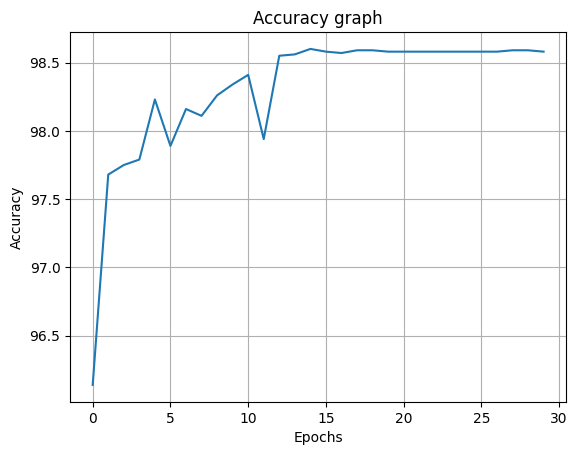

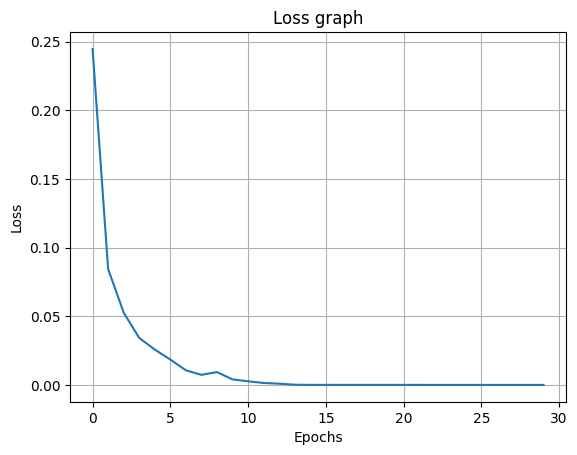

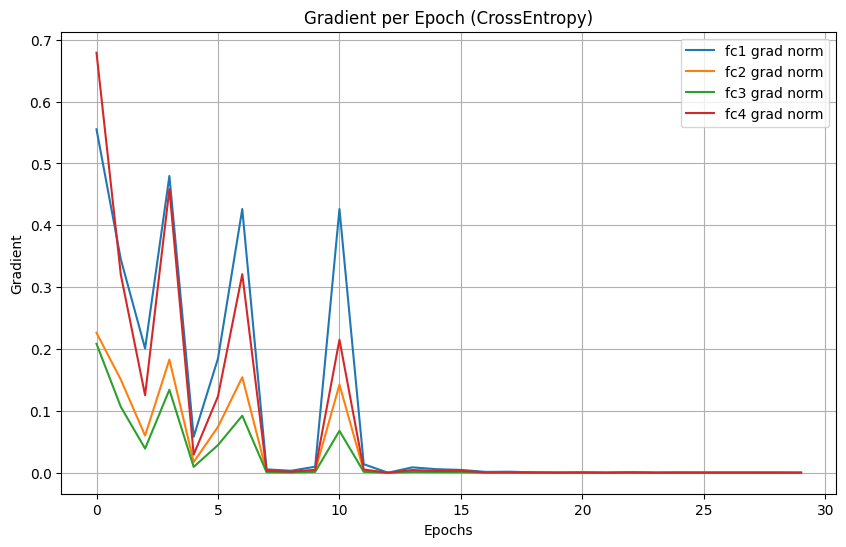

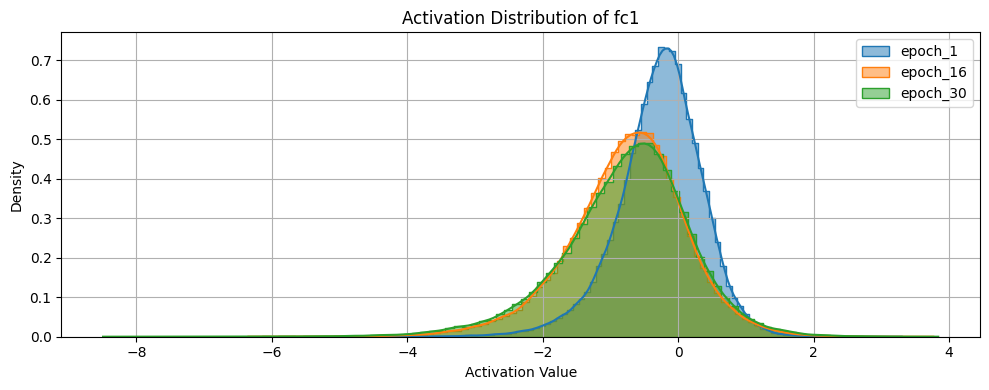

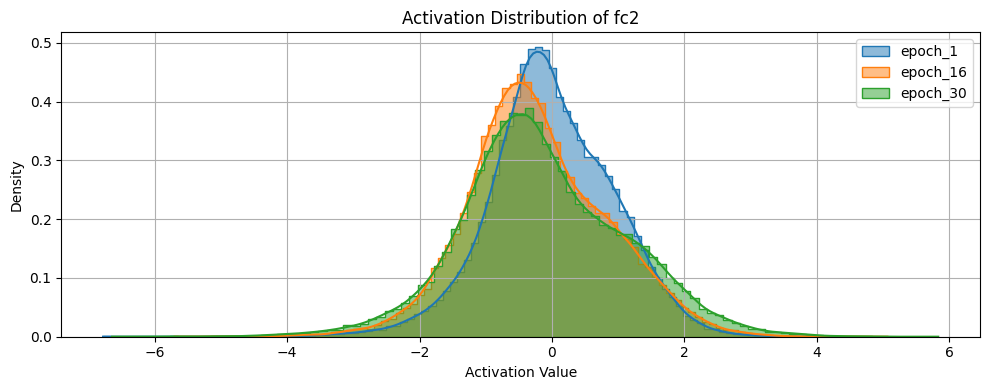

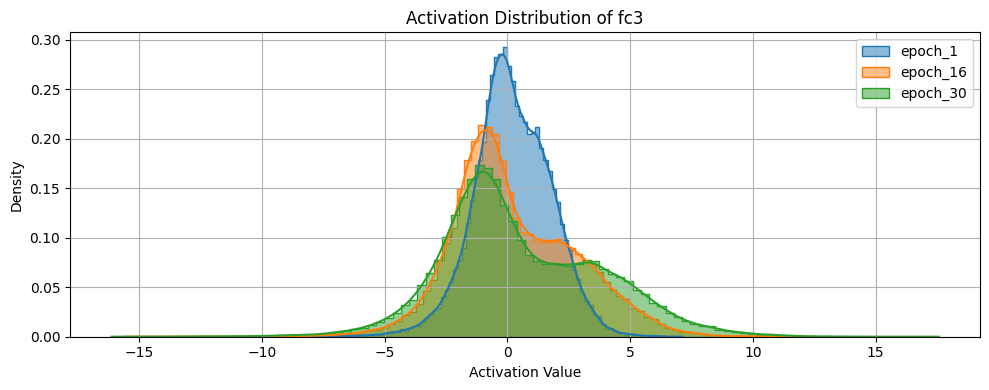

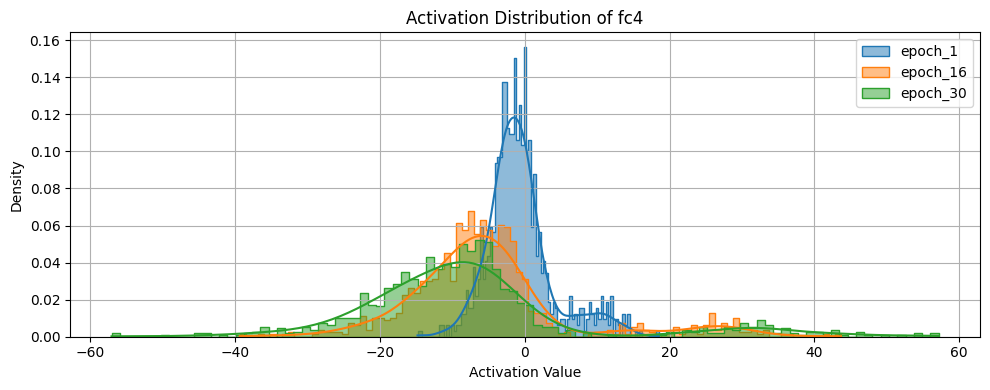

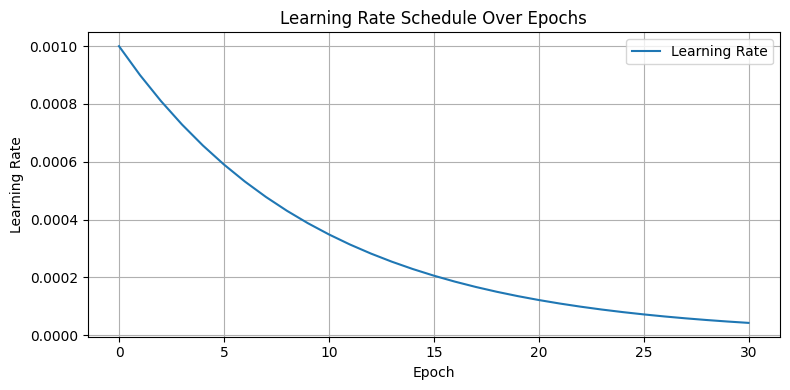

In [107]:
# 실험 C-3-3 결과 시각화 (정확도, 손실)
# 학습 및 검증 데이터셋에서의 정확도와 손실 값이 Epoch마다 어떻게 변화하는지 시각화하여 보여줌
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(accuracy_history)
plt.title('Accuracy graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

plt.plot(loss_history)
plt.title('Loss graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(gradients['fc1'], label='fc1 grad norm')
plt.plot(gradients['fc2'], label='fc2 grad norm')
plt.plot(gradients['fc3'], label='fc3 grad norm')
plt.plot(gradients['fc4'], label='fc4 grad norm')
plt.title("Gradient per Epoch (CrossEntropy)")
plt.xlabel("Epochs")
plt.ylabel("Gradient")
plt.legend()
plt.grid()
plt.show()

def plot_activation_distributions(snapshot_dict, layers=['fc1', 'fc2', 'fc3', 'fc4']):
    for layer in layers:
        plt.figure(figsize=(10, 4))
        for epoch_label, layer_acts in snapshot_dict.items():
            sns.histplot(layer_acts[layer], bins=100, kde=True, stat='density', label=epoch_label, element="step")
        plt.title(f'Activation Distribution of {layer}')
        plt.xlabel('Activation Value')
        plt.ylabel('Density')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

plot_activation_distributions(activation_snapshot)

plt.figure(figsize=(8, 4))
plt.plot(lr_history, label="Learning Rate")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Learning Rate Schedule Over Epochs")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()